<a href="https://colab.research.google.com/github/greinaldi/repositorio/blob/main/coffee_shop_sales_estatistica_analiseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Coffee Shop Sales Analysis
### Análise exploratória e estatística

Trabalho da disciplina de Estatística Aplicada, FATEC Franca

https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis

Sobre o Conjunto de Dados: Este conjunto de dados contém os dados de vendas de uma cafeteria. Ele inclui o ID da transação de cada cliente e a descrição de seu pedido. Não contém valor nulo.

Nome do arquivo Original: Project.csv(18.4 MB)

Sumário:
0. Importação das bibliotecas e leitura do arquivo
1. Pré-processamento

  1.1. Visualização dos tipos de dados, tamanhos e memória utilizada

  1.2. Dados ausentes

  1.3. Valores únicos

  1.4. Conversão da coluna 'transaction_date' para datetime

  1.5. Transformação do atributo 'Size' em numérico para regressão

  1.6. Variáveis para filtros e agrupamentos

  1.7. Agrupamentos diários para realizar as regressões lineares e  as probabilidades

  1.8. Funções estatísticas

  1.9. Dados estatísticos das variáveis de agrupamento
  
2. Estatísticas
  
  2.1. Tabelas e gráficos de frequência

  2.2. Indicadores: média, moda, mediana, quartis, desvio padrão, coeficiente de variância, coeficiente de assimetria, coeficiente de curtose e teste de Shapiro-Wilk.

3. Correlações e regressões lineares simples e múltiplas: faturamento e quantidade

  3.1. Rede

  3.2. Loja Astoria

  3.3. Loja Lower Manhattan

  3.4. Loja Hell's Kitchen

  3.5. Categorias da rede

4. Análise probabilística preliminar do faturamento: distribuição normal e uniforme*

  4.1. Funções para cálculo das distribuições normal e uniforme

  4.2. Rede

  4.3. Loja 'Astoria'

  4.4. Loja Lower Manhattan

  4.5. Loja "Hell's Kitchen"

  4.6. Categorias

5. Relatório geral - Análise exploratória dos dados (perguntas de negócios)

* Análises realizadas para estudos, independentemente dos resultados do teste de normalidade



##0. Importação das bibliotecas e leitura do arquivo

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import statsmodels.api as sm
import plotly.express as px

import math
import scipy

import scipy.stats
from scipy.stats import chisquare, kstest, normaltest, norm
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Leitura Colab Google
dataset = pd.read_csv('/content/drive/MyDrive/Estatistica_Aplicada_Projeto_Coffee/Project.csv')

##1. Pré-processamento

### 1.1. Visualização dos tipos de dados, tamanhos e memória utilizada

In [ ]:
# Dataset - primeiras linhas
dataset.head(10)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5
5,116739,03-06-2023,12:44:17,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5
6,116853,03-06-2023,13:58:14,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,13,6,5
7,117389,03-06-2023,18:57:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,18,6,5
8,118056,04-06-2023,14:31:43,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Sunday,14,6,6
9,118281,04-06-2023,16:30:33,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Sunday,16,6,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [ ]:
# Tamanhos iniciais:
print(f'Linhas: {dataset.shape[0]}; Colunas: {dataset.shape[1]}; Elementos: {dataset.size}')

Linhas: 149116; Colunas: 18; Elementos: 2684088


In [ ]:
# Nomes das colunas
dataset.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

###1.2. Dados ausentes

In [ ]:
# Análise de dados ausentes
ausentesQtde = dataset.isnull().sum().sort_values(ascending=False)
ausentesPorc = ((dataset.isnull().sum() / dataset.shape[0]) * 100).sort_values(ascending=False)
ausentes = pd.DataFrame({
    'Quantidade': ausentesQtde,
    'Porcentagem': ausentesPorc
})
print(f'Valores ausentes: \n{ausentes}')

Valores ausentes: 
                  Quantidade  Porcentagem
transaction_id             0          0.0
transaction_date           0          0.0
transaction_time           0          0.0
store_id                   0          0.0
store_location             0          0.0
product_id                 0          0.0
transaction_qty            0          0.0
unit_price                 0          0.0
Total_Bill                 0          0.0
product_category           0          0.0
product_type               0          0.0
product_detail             0          0.0
Size                       0          0.0
Month Name                 0          0.0
Day Name                   0          0.0
Hour                       0          0.0
Month                      0          0.0
Day of Week                0          0.0


### 1.3. Valores únicos

In [ ]:
#Quantidade de valores únicos por coluna
print(dataset.nunique())

transaction_id      149116
transaction_date       181
transaction_time     25762
store_id                 3
store_location           3
product_id              80
transaction_qty          6
unit_price              41
Total_Bill              75
product_category         9
product_type            29
product_detail          45
Size                     4
Month Name               6
Day Name                 7
Hour                    15
Month                    6
Day of Week              7
dtype: int64


In [ ]:
listaColunasEscolhidas = ['store_id', 'store_location', 'transaction_qty', 'product_category', 'product_type', 'product_detail','Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week']

In [ ]:
# Visualização dos nomes ou números dos valores únicos por coluna, exceto as colunas transaction_id, transaction_date, product_id, unit_price, Total_Bill.
for i in dataset.columns:
  if i in listaColunasEscolhidas:
    print(i, dataset[i].unique(), "\n")

store_id [3 5 8] 

store_location ['Astoria' 'Lower Manhattan' "Hell's Kitchen"] 

transaction_qty [1 2 3 4 8 6] 

product_category ['Tea' 'Coffee' 'Bakery' 'Drinking Chocolate' 'Flavours' 'Loose Tea'
 'Packaged Chocolate' 'Branded' 'Coffee beans'] 

product_type ['Brewed herbal tea' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed Chai tea' 'Drip coffee' 'Organic brewed coffee'
 'Barista Espresso' 'Gourmet brewed coffee' 'Scone' 'Pastry'
 'Premium brewed coffee' 'Hot chocolate' 'Biscotti' 'Sugar free syrup'
 'Regular syrup' 'Herbal tea' 'Black tea' 'Chai tea' 'Green tea'
 'Drinking Chocolate' 'Organic Chocolate' 'Clothing' 'Housewares'
 'Espresso Beans' 'Green beans' 'Organic Beans' 'Premium Beans'
 'Gourmet Beans' 'House blend Beans'] 

product_detail ['Peppermint' 'Lemon Grass' 'Earl Grey' 'English Breakfast'
 'Serenity Green Tea' 'Traditional Blend Chai' 'Our Old Time Diner Blend'
 'Brazilian' 'Espresso shot' 'Ouro Brasileiro shot'
 'Columbian Medium Roast' 'Ethiopia' 'Oatmeal Scone'

In [ ]:
dataset.loc[dataset['Size'] == 'Not Defined']

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
10994,206,01-01-2023,12:53:59,8,Hell's Kitchen,37,1,3.0,3.0,Coffee,Barista Espresso,Espresso shot,Not Defined,January,Sunday,12,1,6
10995,440,01-01-2023,17:28:42,5,Lower Manhattan,37,1,3.0,3.0,Coffee,Barista Espresso,Espresso shot,Not Defined,January,Sunday,17,1,6
10996,542,01-01-2023,19:39:32,3,Astoria,37,1,3.0,3.0,Coffee,Barista Espresso,Espresso shot,Not Defined,January,Sunday,19,1,6
10997,701,02-01-2023,11:56:58,8,Hell's Kitchen,37,1,3.0,3.0,Coffee,Barista Espresso,Espresso shot,Not Defined,January,Monday,11,1,0
10998,823,02-01-2023,14:07:17,3,Astoria,37,1,3.0,3.0,Coffee,Barista Espresso,Espresso shot,Not Defined,January,Monday,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149110,123523,09-06-2023,09:04:04,5,Lower Manhattan,82,6,12.0,72.0,Branded,Housewares,I Need My Bean! Diner mug,Not Defined,June,Friday,9,6,4
149112,133523,17-06-2023,09:55:47,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,9,6,5
149113,133674,17-06-2023,10:41:11,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,10,6,5
149114,133744,17-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,11,6,5


In [ ]:
dataset.loc[dataset['product_detail'] == 'Civet Cat']

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
68870,5212,10-01-2023,09:20:43,5,Lower Manhattan,8,1,45.0,45.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Tuesday,9,1,1
68871,5904,11-01-2023,11:24:31,8,Hell's Kitchen,8,1,45.0,45.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Wednesday,11,1,2
68872,5969,11-01-2023,13:53:09,5,Lower Manhattan,8,1,45.0,45.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Wednesday,13,1,2
68873,7646,14-01-2023,10:57:38,8,Hell's Kitchen,8,1,45.0,45.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Saturday,10,1,5
68874,8473,15-01-2023,18:18:51,3,Astoria,8,1,45.0,45.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Sunday,18,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149104,98529,17-05-2023,11:18:31,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,May,Wednesday,11,5,2
149112,133523,17-06-2023,09:55:47,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,9,6,5
149113,133674,17-06-2023,10:41:11,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,10,6,5
149114,133744,17-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,11,6,5


In [ ]:
dataset.loc[(dataset['product_detail'] == 'Civet Cat') & (dataset['Size'] != 'Not Defined')]

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week


### 1.4. Conversão da coluna 'transaction_date' para datetime

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [ ]:
# Conversão da coluna 'transaction_date' para datetime
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'], format='%d-%m-%Y')

In [ ]:
dataset['Day Month'] = dataset['transaction_date'].dt.day

### 1.5. Transformação do atributo 'Size' em numérico para regressão

In [ ]:
dataset['Size'].unique()

array(['Large', 'Regular', 'Not Defined', 'Small'], dtype=object)

In [ ]:
dataset['Size_2'] = dataset['Size'].copy()
dataset['Size_num'] = dataset['Size_2'].replace({'Large':3, 'Regular': 2, 'Small': 1, 'Not Defined': 0})

/tmp/ipython-input-377-1377238898.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Size_num'] = dataset['Size_2'].replace({'Large':3, 'Regular': 2, 'Small': 1, 'Not Defined': 0})


### 1.6. Variáveis para filtros e agrupamentos

#### 1.6.1. Variáveis dos resultados totais da rede Shop Sales


In [ ]:
# Variáveis quantitativas do dataset - representa os valores por transações realizadas (cada compra)
variaveis_numericas = dataset[['transaction_qty', 'unit_price', 'Total_Bill']]

In [ ]:
# Soma dos valores das variáveis quantitativas - representa os resultados totais
resultados_totais_transaction_qty = dataset['transaction_qty'].sum()
resultados_totais_unit_price = dataset['unit_price'].sum()
resultados_totais_total_bill = dataset['Total_Bill'].sum()

In [ ]:
resultados_totais_transaction_qty

np.int64(214470)

#### 1.6.2. Variáveis dos resultados totais das lojas


In [ ]:
# Soma dos valores totais das variáveis quantitativas agrupadas por lojas - representa os resultados totais das lojas
resultados_totais_lojas = dataset.groupby('store_location')[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
# Acessando o resultado por loja
resultados_totais_astoria = resultados_totais_lojas.loc[('Astoria')]
resultados_totais_lower = resultados_totais_lojas.loc[('Lower Manhattan')]
resultados_totais_hell = resultados_totais_lojas.loc[("Hell's Kitchen")]

#Criação de Series por variável quantitativa
resultados_totais_lojas_transaction_qty = pd.Series(resultados_totais_lojas['transaction_qty'])
resultados_totais_lojas_unit_price =  pd.Series(resultados_totais_lojas['unit_price'])
resultados_totais_lojas_total_bill =  pd.Series(resultados_totais_lojas['Total_Bill'])

#### 1.6.3. Variáveis dos resultados totais por categoria

In [ ]:
# Soma dos valores totais das variáveis quantitativas agrupadas por categorias - representa os resultados totais das categorias da rede
resultados_totais_categoria = dataset.groupby('product_category')[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
#Criação de Series por variável quantitativa
resultados_totais_categoria_transaction_qty = pd.Series(resultados_totais_categoria['transaction_qty'])
resultados_totais_categoria_unit_price = pd.Series(resultados_totais_categoria['unit_price'])
resultados_totais_categoria_total_bill = pd.Series(resultados_totais_categoria['Total_Bill'])

#### 1.6.4. Variáveis dos resultados totais por loja e categoria

In [ ]:
resultados_totais_lojas_e_categorias = dataset.groupby(['store_location','product_category'])[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
dataset['store_location'].unique()

array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)

In [ ]:
astoria_categorias_total_bill = resultados_totais_lojas_e_categorias.loc[('Astoria')]['Total_Bill']
lower_categorias_total_bill = resultados_totais_lojas_e_categorias.loc[('Lower Manhattan')]['Total_Bill']
hell_categorias_total_bill = resultados_totais_lojas_e_categorias.loc[("Hell's Kitchen")]['Total_Bill']

astoria_categorias_transaction_qty = resultados_totais_lojas_e_categorias.loc[('Astoria')]['transaction_qty']
lower_categorias_transaction_qty = resultados_totais_lojas_e_categorias.loc[('Lower Manhattan')]['transaction_qty']
hell_categorias_transaction_qty = resultados_totais_lojas_e_categorias.loc[("Hell's Kitchen")]['transaction_qty']

astoria_categorias_unit_price = resultados_totais_lojas_e_categorias.loc[('Astoria')]['unit_price']
lower_categorias_unit_price = resultados_totais_lojas_e_categorias.loc[('Lower Manhattan')]['unit_price']
hell_categorias_unit_price = resultados_totais_lojas_e_categorias.loc[("Hell's Kitchen")]['unit_price']

#### 1.6.5. Variáveis dos resultados mensais da rede Shop Sales

In [ ]:
meses_indice = ['January', 'February', 'March', 'April', 'May', 'June']

In [ ]:
# Soma dos valores das variáveis quantitativas agrupadas por meses - representa os resultados totais por meses
resultados_meses = dataset.groupby(['Month Name'])[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
# Criação de Series por variável quantitativa e meses
resultados_meses_transaction_qty = resultados_meses.loc[(meses_indice), :]['transaction_qty']
resultados_meses_unit_price = resultados_meses.loc[(meses_indice), :]['unit_price']
resultados_meses_total_bill = resultados_meses.loc[(meses_indice), :]['Total_Bill']

#### 1.6.6. Variáveis dos resultados mensais das lojas

In [ ]:
# Soma das variáveis quantitativas por loja e mês
resultados_meses_lojas = dataset.groupby(['store_location', 'Month Name'])[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
# Lojas e variável transaction_qty por meses
astoria_meses_transaction_qty = resultados_meses_lojas.loc[('Astoria', meses_indice), :]['transaction_qty']
lower_meses_transaction_qty = resultados_meses_lojas.loc[('Lower Manhattan', meses_indice), :]['transaction_qty']
hell_meses_transaction_qty = resultados_meses_lojas.loc[("Hell's Kitchen", meses_indice), :]['transaction_qty']

# Lojas e variável unit_price por meses
astoria_meses_unit_price = resultados_meses_lojas.loc[('Astoria', meses_indice), :]['unit_price']
lower_meses_unit_price = resultados_meses_lojas.loc[('Lower Manhattan', meses_indice), :]['unit_price']
hell_meses_unit_price = resultados_meses_lojas.loc[("Hell's Kitchen", meses_indice), :]['unit_price']

# Lojas e variável Total_Bill por meses
astoria_meses_total_bill = resultados_meses_lojas.loc[('Astoria', meses_indice), :]['Total_Bill']
lower_meses_total_bill = resultados_meses_lojas.loc[('Lower Manhattan', meses_indice), :]['Total_Bill']
hell_meses_total_bill = resultados_meses_lojas.loc[("Hell's Kitchen", meses_indice), :]['Total_Bill']

####1.6.7. Variáveis dos resultados mensais por categoria

In [ ]:
# Usando groupby para somar as variáveis quantitativas por categoria e mês:
resultados_meses_categorias = dataset.groupby(['product_category', 'Month Name'])[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
tea_meses_total_bill = resultados_meses_categorias.loc[('Tea', meses_indice), :]['Total_Bill']
tea_meses_transaction_qty = resultados_meses_categorias.loc[('Tea', meses_indice), :]['transaction_qty']
tea_meses_unit_price = resultados_meses_categorias.loc[('Tea', meses_indice), :]['unit_price']

coffee_meses_total_bill = resultados_meses_categorias.loc[('Coffee', meses_indice), :]['Total_Bill']
coffee_meses_transaction_qty = resultados_meses_categorias.loc[('Coffee', meses_indice), :]['transaction_qty']
coffee_meses_unit_price = resultados_meses_categorias.loc[('Coffee', meses_indice), :]['unit_price']

bakery_meses_total_bill = resultados_meses_categorias.loc[('Bakery', meses_indice), :]['Total_Bill']
bakery_meses_transaction_qty = resultados_meses_categorias.loc[('Bakery', meses_indice), :]['transaction_qty']
bakery_meses_unit_price = resultados_meses_categorias.loc[('Bakery', meses_indice), :]['unit_price']

drinking_chocolate_meses_total_bill = resultados_meses_categorias.loc[('Drinking Chocolate', meses_indice), :]['Total_Bill']
drinking_chocolate_meses_transaction_qty = resultados_meses_categorias.loc[('Drinking Chocolate', meses_indice), :]['transaction_qty']
drinking_chocolate_meses_unit_price = resultados_meses_categorias.loc[('Drinking Chocolate', meses_indice), :]['unit_price']

flavours_meses_total_bill = resultados_meses_categorias.loc[('Flavours', meses_indice), :]['Total_Bill']
flavours_meses_transaction_qty = resultados_meses_categorias.loc[('Flavours', meses_indice), :]['transaction_qty']
flavours_meses_unit_price = resultados_meses_categorias.loc[('Flavours', meses_indice), :]['unit_price']

loose_meses_total_bill = resultados_meses_categorias.loc[('Loose Tea', meses_indice), :]['Total_Bill']
loose_meses_transaction_qty = resultados_meses_categorias.loc[('Loose Tea', meses_indice), :]['transaction_qty']
loose_meses_unit_price = resultados_meses_categorias.loc[('Loose Tea', meses_indice), :]['unit_price']

packaged_chocolate_meses_total_bill = resultados_meses_categorias.loc[('Packaged Chocolate', meses_indice), :]['Total_Bill']
packaged_chocolate_meses_transaction_qty = resultados_meses_categorias.loc[('Packaged Chocolate', meses_indice), :]['transaction_qty']
packaged_chocolate_meses_unit_price = resultados_meses_categorias.loc[('Packaged Chocolate', meses_indice), :]['unit_price']

branded_meses_total_bill = resultados_meses_categorias.loc[('Branded', meses_indice), :]['Total_Bill']
branded_meses_transaction_qty = resultados_meses_categorias.loc[('Branded', meses_indice), :]['transaction_qty']
branded_meses_unit_price = resultados_meses_categorias.loc[('Branded', meses_indice), :]['unit_price']

coffee_beans_meses_total_bill = resultados_meses_categorias.loc[('Coffee beans', meses_indice), :]['Total_Bill']
coffee_beans_meses_transaction_qty = resultados_meses_categorias.loc[('Coffee beans', meses_indice), :]['transaction_qty']
coffee_beans_meses_unit_price = resultados_meses_categorias.loc[('Coffee beans', meses_indice), :]['unit_price']

####1.6.8. Variáveis dos resultados mensais por loja e categoria

In [ ]:
resultados_meses_categorias_lojas = dataset.groupby(['store_location','product_category', 'Month Name'])[['transaction_qty', 'unit_price', 'Total_Bill']].sum()

In [ ]:
# Loja Astoria
astoria_tea_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Tea', meses_indice), :]['Total_Bill']
astoria_tea_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Tea', meses_indice), :]['transaction_qty']
astoria_tea_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Tea', meses_indice), :]['unit_price']

astoria_coffee_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Coffee', meses_indice), :]['Total_Bill']
astoria_coffee_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Coffee', meses_indice), :]['transaction_qty']
astoria_coffee_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Coffee', meses_indice), :]['unit_price']

astoria_bakery_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Bakery', meses_indice), :]['Total_Bill']
astoria_bakery_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Bakery', meses_indice), :]['transaction_qty']
astoria_bakery_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Bakery', meses_indice), :]['unit_price']

astoria_drinking_chocolate_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Drinking Chocolate', meses_indice), :]['Total_Bill']
astoria_drinking_chocolate_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Drinking Chocolate', meses_indice), :]['transaction_qty']
astoria_drinking_chocolate_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Drinking Chocolate', meses_indice), :]['unit_price']

astoria_flavours_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Flavours', meses_indice), :]['Total_Bill']
astoria_flavours_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Flavours', meses_indice), :]['transaction_qty']
astoria_flavours_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Flavours', meses_indice), :]['unit_price']

astoria_loose_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Loose Tea', meses_indice), :]['Total_Bill']
astoria_loose_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Loose Tea', meses_indice), :]['transaction_qty']
astoria_loose_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Loose Tea', meses_indice), :]['unit_price']

astoria_packaged_chocolate_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Packaged Chocolate', meses_indice), :]['Total_Bill']
astoria_packaged_chocolate_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Packaged Chocolate', meses_indice), :]['transaction_qty']
astoria_packaged_chocolate_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Packaged Chocolate', meses_indice), :]['unit_price']

astoria_branded_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Branded', meses_indice), :]['Total_Bill']
astoria_branded_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Branded', meses_indice), :]['transaction_qty']
astoria_branded_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Branded', meses_indice), :]['unit_price']

astoria_coffee_beans_meses_total_bill = resultados_meses_categorias_lojas.loc[('Astoria','Coffee beans', meses_indice), :]['Total_Bill']
astoria_coffee_beans_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Astoria','Coffee beans', meses_indice), :]['transaction_qty']
astoria_coffee_beans_meses_unit_price = resultados_meses_categorias_lojas.loc[('Astoria','Coffee beans', meses_indice), :]['unit_price']

In [ ]:
# Loja Lower Manhattan
lower_tea_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Tea', meses_indice), :]['Total_Bill']
lower_tea_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Tea', meses_indice), :]['transaction_qty']
lower_tea_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Tea', meses_indice), :]['unit_price']

lower_coffee_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Coffee', meses_indice), :]['Total_Bill']
lower_coffee_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Coffee', meses_indice), :]['transaction_qty']
lower_coffee_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Coffee', meses_indice), :]['unit_price']

lower_bakery_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Bakery', meses_indice), :]['Total_Bill']
lower_bakery_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Bakery', meses_indice), :]['transaction_qty']
lower_bakery_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Bakery', meses_indice), :]['unit_price']

lower_drinking_chocolate_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Drinking Chocolate', meses_indice), :]['Total_Bill']
lower_drinking_chocolate_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Drinking Chocolate', meses_indice), :]['transaction_qty']
lower_drinking_chocolate_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Drinking Chocolate', meses_indice), :]['unit_price']

lower_flavours_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Flavours', meses_indice), :]['Total_Bill']
lower_flavours_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Flavours', meses_indice), :]['transaction_qty']
lower_flavours_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Flavours', meses_indice), :]['unit_price']

lower_loose_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Loose Tea', meses_indice), :]['Total_Bill']
lower_loose_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Loose Tea', meses_indice), :]['transaction_qty']
lower_loose_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Loose Tea', meses_indice), :]['unit_price']

lower_packaged_chocolate_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Packaged Chocolate', meses_indice), :]['Total_Bill']
lower_packaged_chocolate_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Packaged Chocolate', meses_indice), :]['transaction_qty']
lower_packaged_chocolate_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Packaged Chocolate', meses_indice), :]['unit_price']

lower_branded_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Branded', meses_indice), :]['Total_Bill']
lower_branded_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Branded', meses_indice), :]['transaction_qty']
lower_branded_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Branded', meses_indice), :]['unit_price']

lower_coffee_beans_meses_total_bill = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Coffee beans', meses_indice), :]['Total_Bill']
lower_coffee_beans_meses_transaction_qty = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Coffee beans', meses_indice), :]['transaction_qty']
lower_coffee_beans_meses_unit_price = resultados_meses_categorias_lojas.loc[('Lower Manhattan','Coffee beans', meses_indice), :]['unit_price']

In [ ]:
# Loja "Hell's Kitchen"
hell_tea_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Tea', meses_indice), :]['Total_Bill']
hell_tea_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Tea', meses_indice), :]['transaction_qty']
hell_tea_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Tea', meses_indice), :]['unit_price']

hell_coffee_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Coffee', meses_indice), :]['Total_Bill']
hell_coffee_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Coffee', meses_indice), :]['transaction_qty']
hell_coffee_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Coffee', meses_indice), :]['unit_price']

hell_bakery_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Bakery', meses_indice), :]['Total_Bill']
hell_bakery_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Bakery', meses_indice), :]['transaction_qty']
hell_bakery_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Bakery', meses_indice), :]['unit_price']

hell_drinking_chocolate_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Drinking Chocolate', meses_indice), :]['Total_Bill']
hell_drinking_chocolate_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Drinking Chocolate', meses_indice), :]['transaction_qty']
hell_drinking_chocolate_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Drinking Chocolate', meses_indice), :]['unit_price']

hell_flavours_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Flavours', meses_indice), :]['Total_Bill']
hell_flavours_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Flavours', meses_indice), :]['transaction_qty']
hell_flavours_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Flavours', meses_indice), :]['unit_price']

hell_loose_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Loose Tea', meses_indice), :]['Total_Bill']
hell_loose_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Loose Tea', meses_indice), :]['transaction_qty']
hell_loose_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Loose Tea', meses_indice), :]['unit_price']

hell_packaged_chocolate_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Packaged Chocolate', meses_indice), :]['Total_Bill']
hell_packaged_chocolate_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Packaged Chocolate', meses_indice), :]['transaction_qty']
hell_packaged_chocolate_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Packaged Chocolate', meses_indice), :]['unit_price']

hell_branded_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Branded', meses_indice), :]['Total_Bill']
hell_branded_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Branded', meses_indice), :]['transaction_qty']
hell_branded_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Branded', meses_indice), :]['unit_price']

hell_coffee_beans_meses_total_bill = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Coffee beans', meses_indice), :]['Total_Bill']
hell_coffee_beans_meses_transaction_qty = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Coffee beans', meses_indice), :]['transaction_qty']
hell_coffee_beans_meses_unit_price = resultados_meses_categorias_lojas.loc[("Hell's Kitchen",'Coffee beans', meses_indice), :]['unit_price']

### 1.7. Agrupamentos diários para realizar as regressões lineares e  as probabilidades

#### 1.7.1. Agrupamento rede

In [ ]:
# Definir 'transaction_date' como índice
agrupados_dia_geral = dataset.set_index('transaction_date')

# Realizar o agrupamento por dia e somar os valores
agrupados_dia_geral = agrupados_dia_geral.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_geral.shape[0]}; Colunas: {agrupados_dia_geral.shape[1]}; Elementos: {agrupados_dia_geral.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
agrupados_dia_geral.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2023-01-01 to 2023-06-30
Freq: D
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    181 non-null    int64  
 1   transaction_time  181 non-null    object 
 2   store_id          181 non-null    int64  
 3   store_location    181 non-null    object 
 4   product_id        181 non-null    int64  
 5   transaction_qty   181 non-null    int64  
 6   unit_price        181 non-null    float64
 7   Total_Bill        181 non-null    float64
 8   product_category  181 non-null    object 
 9   product_type      181 non-null    object 
 10  product_detail    181 non-null    object 
 11  Size              181 non-null    object 
 12  Month Name        181 non-null    object 
 13  Day Name          181 non-null    object 
 14  Hour              181 non-null    int64  
 15  Month             181 non-null    int64  
 16  Day of Week      

In [ ]:
ausentesQtde = agrupados_dia_geral.isnull().sum().sort_values(ascending=False)
ausentesPorc = ((agrupados_dia_geral.isnull().sum() / agrupados_dia_geral.shape[0]) * 100).sort_values(ascending=False)
ausentes = pd.DataFrame({
    'Quantidade': ausentesQtde,
    'Porcentagem': ausentesPorc
})
print(f'Valores ausentes: \n{ausentes}')

Valores ausentes: 
                  Quantidade  Porcentagem
transaction_id             0          0.0
transaction_time           0          0.0
store_id                   0          0.0
store_location             0          0.0
product_id                 0          0.0
transaction_qty            0          0.0
unit_price                 0          0.0
Total_Bill                 0          0.0
product_category           0          0.0
product_type               0          0.0
product_detail             0          0.0
Size                       0          0.0
Month Name                 0          0.0
Day Name                   0          0.0
Hour                       0          0.0
Month                      0          0.0
Day of Week                0          0.0
Day Month                  0          0.0
Size_2                     0          0.0
Size_num                   0          0.0


#### 1.7.2. Agrupamento Loja Astoria

In [ ]:
filtro_astoria = dataset['store_location'] == 'Astoria'
dataset_astoria = dataset[filtro_astoria].copy()
agrupados_dia_astoria = dataset_astoria.set_index('transaction_date')
agrupados_dia_astoria = agrupados_dia_astoria.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_astoria.shape[0]}; Colunas: {agrupados_dia_astoria.shape[1]}; Elementos: {agrupados_dia_astoria.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
ausentesQtde = agrupados_dia_astoria.isnull().sum().sort_values(ascending=False)
ausentesPorc = ((agrupados_dia_astoria.isnull().sum() / agrupados_dia_astoria.shape[0]) * 100).sort_values(ascending=False)
ausentes = pd.DataFrame({
    'Quantidade': ausentesQtde,
    'Porcentagem': ausentesPorc
})
print(f'Valores ausentes: \n{ausentes}')

Valores ausentes: 
                  Quantidade  Porcentagem
transaction_id             0          0.0
transaction_time           0          0.0
store_id                   0          0.0
store_location             0          0.0
product_id                 0          0.0
transaction_qty            0          0.0
unit_price                 0          0.0
Total_Bill                 0          0.0
product_category           0          0.0
product_type               0          0.0
product_detail             0          0.0
Size                       0          0.0
Month Name                 0          0.0
Day Name                   0          0.0
Hour                       0          0.0
Month                      0          0.0
Day of Week                0          0.0
Day Month                  0          0.0
Size_2                     0          0.0
Size_num                   0          0.0


#### 1.7.3. Agrupamento Loja Hell's Kitchen

In [ ]:
filtro_hell = dataset['store_location'] == "Hell's Kitchen"
dataset_hell = dataset[filtro_hell].copy()
agrupados_dia_hell = dataset_hell.set_index('transaction_date')
agrupados_dia_hell = agrupados_dia_hell.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_hell.shape[0]}; Colunas: {agrupados_dia_hell.shape[1]}; Elementos: {agrupados_dia_hell.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
ausentesQtde = agrupados_dia_hell.isnull().sum().sort_values(ascending=False)
ausentesPorc = ((agrupados_dia_hell.isnull().sum() / agrupados_dia_hell.shape[0]) * 100).sort_values(ascending=False)
ausentes = pd.DataFrame({
    'Quantidade': ausentesQtde,
    'Porcentagem': ausentesPorc
})
print(f'Valores ausentes: \n{ausentes}')

Valores ausentes: 
                  Quantidade  Porcentagem
transaction_id             0          0.0
transaction_time           0          0.0
store_id                   0          0.0
store_location             0          0.0
product_id                 0          0.0
transaction_qty            0          0.0
unit_price                 0          0.0
Total_Bill                 0          0.0
product_category           0          0.0
product_type               0          0.0
product_detail             0          0.0
Size                       0          0.0
Month Name                 0          0.0
Day Name                   0          0.0
Hour                       0          0.0
Month                      0          0.0
Day of Week                0          0.0
Day Month                  0          0.0
Size_2                     0          0.0
Size_num                   0          0.0


#### 1.7.4. Agrupamento Loja Lower Manhattan

In [ ]:
filtro_lower = dataset['store_location'] == 'Lower Manhattan'
dataset_lower  = dataset[filtro_lower].copy()
agrupados_dia_lower = dataset_lower.set_index('transaction_date')
agrupados_dia_lower = agrupados_dia_lower.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_lower.shape[0]}; Colunas: {agrupados_dia_lower.shape[1]}; Elementos: {agrupados_dia_lower.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
ausentesQtde = agrupados_dia_lower.isnull().sum().sort_values(ascending=False)
ausentesPorc = ((agrupados_dia_lower.isnull().sum() / agrupados_dia_lower.shape[0]) * 100).sort_values(ascending=False)
ausentes = pd.DataFrame({
    'Quantidade': ausentesQtde,
    'Porcentagem': ausentesPorc
})
print(f'Valores ausentes: \n{ausentes}')

Valores ausentes: 
                  Quantidade  Porcentagem
transaction_id             0          0.0
transaction_time           0          0.0
store_id                   0          0.0
store_location             0          0.0
product_id                 0          0.0
transaction_qty            0          0.0
unit_price                 0          0.0
Total_Bill                 0          0.0
product_category           0          0.0
product_type               0          0.0
product_detail             0          0.0
Size                       0          0.0
Month Name                 0          0.0
Day Name                   0          0.0
Hour                       0          0.0
Month                      0          0.0
Day of Week                0          0.0
Day Month                  0          0.0
Size_2                     0          0.0
Size_num                   0          0.0


#### 1.7.5. Agrupamento Categorias

In [ ]:
dataset['product_category'].unique()

array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours',
       'Loose Tea', 'Packaged Chocolate', 'Branded', 'Coffee beans'],
      dtype=object)

##### 1.7.5.1. Agrupamento Tea

In [ ]:
filtro_tea = dataset['product_category'] == 'Tea'
dataset_tea  = dataset[filtro_tea].copy()
agrupados_dia_tea = dataset_tea.set_index('transaction_date')
agrupados_dia_tea = agrupados_dia_tea.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_tea.shape[0]}; Colunas: {agrupados_dia_tea.shape[1]}; Elementos: {agrupados_dia_tea.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
agrupados_dia_tea['product_category'] = 'Tea'

##### 1.7.5.2. Agrupamento Coffee

In [ ]:
filtro_coffee = dataset['product_category'] == 'Coffee'
dataset_coffee  = dataset[filtro_coffee].copy()
agrupados_dia_coffee = dataset_coffee.set_index('transaction_date')
agrupados_dia_coffee = agrupados_dia_coffee.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_coffee.shape[0]}; Colunas: {agrupados_dia_coffee.shape[1]}; Elementos: {agrupados_dia_coffee.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
agrupados_dia_coffee['product_category'] = 'Coffee'

##### 1.7.5.3. Agrupamento Bakery

In [ ]:
filtro_bakery = dataset['product_category'] == 'Bakery'
dataset_bakery  = dataset[filtro_bakery].copy()
agrupados_dia_bakery = dataset_bakery.set_index('transaction_date')
agrupados_dia_bakery = agrupados_dia_bakery.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_bakery.shape[0]}; Colunas: {agrupados_dia_bakery.shape[1]}; Elementos: {agrupados_dia_bakery.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
agrupados_dia_bakery['product_category'] = 'Bakery'

##### 1.7.5.4. Agrupamento Drinking Chocolate

In [ ]:
filtro_drinkingChocolate = dataset['product_category'] == 'Drinking Chocolate'
dataset_drinkingChocolate  = dataset[filtro_drinkingChocolate].copy()
agrupados_dia_drinkingChocolate = dataset_drinkingChocolate.set_index('transaction_date')
agrupados_dia_drinkingChocolate = agrupados_dia_drinkingChocolate.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_drinkingChocolate.shape[0]}; Colunas: {agrupados_dia_drinkingChocolate.shape[1]}; Elementos: {agrupados_dia_drinkingChocolate.size}')

Linhas: 181; Colunas: 20; Elementos: 3620


In [ ]:
agrupados_dia_drinkingChocolate['product_category'] = 'Drinking Chocolate'

##### 1.7.5.5. Agrupamento Flavours

In [ ]:
filtro_flavours = dataset['product_category'] == 'Flavours'
dataset_flavours  = dataset[filtro_flavours].copy()
agrupados_dia_flavours = dataset_flavours.set_index('transaction_date')
agrupados_dia_flavours = agrupados_dia_flavours.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_flavours.shape[0]}; Colunas: {agrupados_dia_flavours.shape[1]}; Elementos: {agrupados_dia_flavours.size}')

Linhas: 175; Colunas: 20; Elementos: 3500


In [ ]:
agrupados_dia_flavours['product_category'] = 'Flavours'

##### 1.7.5.6. Agrupamento Loose Tea

In [ ]:
filtro_looseTea = dataset['product_category'] == 'Loose Tea'
dataset_looseTea  = dataset[filtro_looseTea].copy()
agrupados_dia_looseTea = dataset_looseTea.set_index('transaction_date')
agrupados_dia_looseTea = agrupados_dia_looseTea.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_looseTea.shape[0]}; Colunas: {agrupados_dia_looseTea.shape[1]}; Elementos: {agrupados_dia_looseTea.size}')

Linhas: 175; Colunas: 20; Elementos: 3500


In [ ]:
agrupados_dia_looseTea['product_category'] = 'Loose Tea'

##### 1.7.5.7. Agrupamento Packaged Chocolate

In [ ]:
filtro_packagedChocolate = dataset['product_category'] == 'Packaged Chocolate'
dataset_packagedChocolate  = dataset[filtro_packagedChocolate].copy()
agrupados_dia_packagedChocolate = dataset_packagedChocolate.set_index('transaction_date')
agrupados_dia_packagedChocolate = agrupados_dia_packagedChocolate.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_packagedChocolate.shape[0]}; Colunas: {agrupados_dia_packagedChocolate.shape[1]}; Elementos: {agrupados_dia_packagedChocolate.size}')

Linhas: 175; Colunas: 20; Elementos: 3500


In [ ]:
agrupados_dia_packagedChocolate['product_category'] = 'Packaged Chocolate'

##### 1.7.5.8. Agrupamento Branded

In [ ]:
filtro_branded = dataset['product_category'] == 'Branded'
dataset_branded  = dataset[filtro_branded].copy()
agrupados_dia_branded = dataset_branded.set_index('transaction_date')
agrupados_dia_branded = agrupados_dia_branded.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_branded.shape[0]}; Colunas: {agrupados_dia_branded.shape[1]}; Elementos: {agrupados_dia_branded.size}')

Linhas: 174; Colunas: 20; Elementos: 3480


In [ ]:
agrupados_dia_branded['product_category'] = 'Branded'

##### 1.7.5.9. Agrupamento Coffee beans

In [ ]:
filtro_coffeeBeans = dataset['product_category'] == 'Coffee beans'
dataset_coffeeBeans  = dataset[filtro_coffeeBeans].copy()
agrupados_dia_coffeeBeans = dataset_coffeeBeans.set_index('transaction_date')
agrupados_dia_coffeeBeans = agrupados_dia_coffeeBeans.groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
# Tamanhos:
print(f'Linhas: {agrupados_dia_coffeeBeans.shape[0]}; Colunas: {agrupados_dia_coffeeBeans.shape[1]}; Elementos: {agrupados_dia_coffeeBeans.size}')

Linhas: 175; Colunas: 20; Elementos: 3500


In [ ]:
agrupados_dia_coffeeBeans['product_category'] = 'Coffee beans'

#### 1.7.6. Concatenação das categorias em um DataFrame

In [ ]:
dados_agrupados_categorias = pd.concat([
    agrupados_dia_tea,
    agrupados_dia_coffee,
    agrupados_dia_bakery,
    agrupados_dia_drinkingChocolate,
    agrupados_dia_flavours,
    agrupados_dia_looseTea,
    agrupados_dia_packagedChocolate,
    agrupados_dia_branded,
    agrupados_dia_coffeeBeans
])

In [ ]:
print(f'Linhas: {dados_agrupados_categorias.shape[0]}; Colunas: {dados_agrupados_categorias.shape[1]}; Elementos: {dados_agrupados_categorias.size}')

Linhas: 1598; Colunas: 20; Elementos: 31960


In [ ]:
dados_agrupados_categorias.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1598 entries, 2023-01-01 to 2023-06-30
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    1598 non-null   int64  
 1   transaction_time  1598 non-null   object 
 2   store_id          1598 non-null   int64  
 3   store_location    1598 non-null   object 
 4   product_id        1598 non-null   int64  
 5   transaction_qty   1598 non-null   int64  
 6   unit_price        1598 non-null   float64
 7   Total_Bill        1598 non-null   float64
 8   product_category  1598 non-null   object 
 9   product_type      1598 non-null   object 
 10  product_detail    1598 non-null   object 
 11  Size              1598 non-null   object 
 12  Month Name        1598 non-null   object 
 13  Day Name          1598 non-null   object 
 14  Hour              1598 non-null   int64  
 15  Month             1598 non-null   int64  
 16  Day of Week       1598 n

### 1.8. Funções estatísticas

In [ ]:
# Definição da função com os métodos estatísticos
def estatisticaDescritiva(coluna):
    media = coluna.mean()
    moda = st.multimode(coluna)
    mediana = coluna.median()
    desvio = coluna.std()
    coeficient_Variacao = (desvio / media) * 100

    # Testes de normalidade
    TSW = scipy.stats.shapiro(coluna)
    ks_stat, p_valor_ks = kstest(coluna, 'norm', args=(coluna.mean(), coluna.std()))
    stat, p_valor_nm = normaltest(coluna)

    # Número de bins pela regra da raiz quadrada
    n = len(coluna)
    k = int(np.sqrt(n))

    # Teste de uniformidade
    freq_obs_uniforme, _ = np.histogram(coluna, bins=k)
    freq_exp_uniforme = [n / k] * k
    chi2_uniforme, p_uniforme = chisquare(freq_obs_uniforme, freq_exp_uniforme)

    # Medidas de forma
    CAF = abs(round(scipy.stats.skew(coluna), 0))  # Assimetria
    CCF = round(scipy.stats.kurtosis(coluna), 0)   # Curtose

    # Quartis
    quartis = st.quantiles(coluna, n=4)
    quartil1 = quartis[0]
    quartil2 = quartis[1]
    quartil3 = quartis[2]

    minimo = coluna.min()
    maximo = coluna.max()

    # Exibição dos resultados
    print(f"Media: {media}\nModa: {moda}\nMediana: {mediana}")
    print(f"Desvio Padrão: {desvio}\nCoeficiente de Variação: {coeficient_Variacao}%")
    print(f"Teste de Shapiro-Wilk: {TSW}")
    print(f"Teste Kolmogorov-Smirnov: p-valor: {p_valor_ks}")
    print(f"Teste D'Agostino e Pearson: p-valor: {p_valor_nm}")

    print(f"Teste Qui-quadrado Uniformidade (bins={k}): χ² = {chi2_uniforme} ; p-valor: {p_uniforme}")
    print(f"Coeficiente de Assimetria de Fisher: {CAF}")
    print(f"Coeficiente de Curtose de Fisher: {CCF}")
    print(f"Mínimo: {minimo} ; Máximo: {maximo}")
    print(f"Quartil 1: {quartil1} ; Quartil 2: {quartil2} ; Quartil 3: {quartil3}")

def coeficienteVariacao(coluna):
    media = coluna.mean()
    desvio = coluna.std()
    coeficient_Variacao = (desvio / media) * 100
    print(f"Coeficiente de Variação: {coeficient_Variacao}%")

def coeficienteVariacao_n(dados):
    return (np.std(dados) / np.mean(dados)) * 100

In [ ]:
def estatisticaDescritivaMulti(df):
    resultados = []

    for col_name in df.columns:
        coluna = df[col_name].dropna()

        media = coluna.mean()
        moda = st.multimode(coluna)
        mediana = coluna.median()
        desvio = coluna.std()
        coef_var = (desvio / media) * 100 if media != 0 else np.nan

        # Testes de normalidade
        TSW_stat, TSW_p = scipy.stats.shapiro(coluna)
        ks_stat, ks_p = kstest(coluna, 'norm', args=(media, desvio))
        dap_stat, dap_p = normaltest(coluna)

        # Uniformidade
        n = len(coluna)
        k = int(np.sqrt(n))
        freq_obs, _ = np.histogram(coluna, bins=k)
        freq_exp = [n / k] * k
        chi2_stat, chi2_p = chisquare(freq_obs, freq_exp)

        # Medidas de forma
        CAF = round(scipy.stats.skew(coluna), 0)
        CCF = round(scipy.stats.kurtosis(coluna), 0)

        # Quartis
        quartis = st.quantiles(coluna, n=4)
        Q1, Q2, Q3 = quartis[0], quartis[1], quartis[2]

        minimo = coluna.min()
        maximo = coluna.max()

        resultados.append({
            'VARIÁVEL': col_name,
            'MEDIA': media,
            'MEDIANA': mediana,
            'DP': desvio,
            'CV%': coef_var,
            'SHAPIRO_p': TSW_p,
            'Kolmogorov_p': ks_p,
            "D'Agostino-Pearson_p": dap_p,
            'QUI²_p': chi2_p,
            'CAF': CAF,
            'CCF': CCF,
            'Min': minimo,
            'Max': maximo,
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3
        })

    return pd.DataFrame(resultados)

### 1.9. Dados estatísticos das variáveis de agrupamento

In [ ]:
agrupados_dia_astoria.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week,Day Month,Size_num
count,1.810000e+02,181.000000,181.000000,181.00000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,2.097930e+07,838.657459,13077.132597,392.21547,946.256409,1283.115525,3506.502762,1115.701657,832.093923,4424.497238,476.994475
std,1.884217e+07,272.191178,4207.278366,130.02078,323.198999,426.444617,1216.086645,811.930497,635.794723,3045.195824,162.777575
min,6.447600e+04,417.000000,6739.000000,202.00000,443.500000,641.900000,1553.000000,144.000000,0.000000,188.000000,182.000000
25%,4.932096e+06,615.000000,9638.000000,292.00000,674.800000,928.800000,2580.000000,400.000000,324.000000,1791.000000,353.000000
50%,1.350200e+07,786.000000,12102.000000,362.00000,893.750000,1175.080000,3171.000000,852.000000,774.000000,3930.000000,436.000000
75%,3.478848e+07,1077.000000,16503.000000,490.00000,1206.360000,1631.930000,4395.000000,1870.000000,1224.000000,6510.000000,593.000000
max,6.709019e+07,1467.000000,22558.000000,688.00000,1969.030000,2546.430000,6581.000000,2934.000000,2622.000000,12120.000000,862.000000


In [ ]:
agrupados_dia_hell.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week,Day Month,Size_num
count,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,2.085790e+07,2242.430939,13482.099448,396.337017,951.412541,1306.691547,3277.502762,1117.640884,839.718232,4294.441989,444.049724
std,1.860310e+07,729.457951,4436.813759,129.535462,328.597670,441.737839,1057.768666,814.941830,653.140034,2657.936782,141.853965
min,5.153400e+04,1080.000000,6555.000000,195.000000,424.050000,612.150000,1382.000000,135.000000,0.000000,179.000000,192.000000
25%,5.384557e+06,1640.000000,9892.000000,290.000000,691.480000,928.450000,2447.000000,400.000000,340.000000,2172.000000,325.000000
50%,1.414451e+07,2056.000000,12407.000000,363.000000,875.400000,1184.080000,3028.000000,867.000000,780.000000,4160.000000,409.000000
75%,3.494902e+07,2744.000000,16551.000000,483.000000,1163.750000,1598.400000,4177.000000,1764.000000,1212.000000,5880.000000,557.000000
max,6.720236e+07,3984.000000,24196.000000,769.000000,1981.960000,2534.800000,5681.000000,2988.000000,2730.000000,11178.000000,753.000000


In [ ]:
agrupados_dia_lower.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week,Day Month,Size_num
count,1.810000e+02,181.000000,181.000000,181.000000,181.00000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1.973484e+07,1319.944751,12918.287293,396.364641,888.75663,1271.034530,2884.469613,1052.878453,785.171271,4151.646409,405.790055
std,1.748951e+07,408.306798,4041.839171,132.564490,285.05936,425.637615,903.415080,754.965648,597.871993,2712.577863,127.316404
min,3.551500e+04,690.000000,6414.000000,196.000000,426.85000,604.200000,1340.000000,138.000000,0.000000,176.000000,187.000000
25%,4.840270e+06,965.000000,9412.000000,285.000000,650.40000,936.900000,2096.000000,362.000000,322.000000,2022.000000,302.000000
50%,1.308671e+07,1225.000000,11692.000000,367.000000,835.40000,1150.050000,2680.000000,808.000000,720.000000,3840.000000,379.000000
75%,3.476734e+07,1715.000000,16243.000000,500.000000,1116.12000,1596.800000,3736.000000,1755.000000,1155.000000,5920.000000,531.000000
max,6.433175e+07,2235.000000,22257.000000,770.000000,1563.18000,2437.400000,4826.000000,2682.000000,2412.000000,11934.000000,658.000000


In [ ]:
agrupados_dia_astoria[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].sum()

,0
transaction_qty,70991.00
unit_price,171272.41
Total_Bill,232243.91
Size_num,86336.00


In [ ]:
agrupados_dia_lower[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].sum()

In [ ]:
agrupados_dia_hell[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].sum()

## 2. Estatísticas

### 2.1. Tabelas e gráficos de frequência

#### 2.1.1. Coluna 'transaction_date'  

In [ ]:
# Tabela de frequência
coluna_transaction_date = dataset['transaction_date'].dt.day.value_counts(sort=True).to_frame('Quantidade')
coluna_transaction_date['Frequência Relativa'] = dataset['transaction_date'].dt.day.value_counts(normalize=True) * 100
coluna_transaction_date.rename_axis('Day', inplace=True)
print(coluna_transaction_date)

In [ ]:
# Gráfico de frequência
plt.title('Gráfico: frequência relativa dos dias')
sns.barplot(data=coluna_transaction_date, x='Day', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,6,1))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.2. Coluna 'store_location'

In [ ]:
# Tabela de frequência
coluna_store_location = dataset['store_location'].value_counts(sort=True).to_frame('Quantidade')
coluna_store_location['Frequência Relativa'] = dataset['store_location'].value_counts(normalize=True) * 100
coluna_store_location.rename_axis('Loja', inplace=True)
print(coluna_store_location)

                 Quantidade  Frequência Relativa
Loja                                            
Hell's Kitchen        50735            34.023847
Astoria               50599            33.932643
Lower Manhattan       47782            32.043510


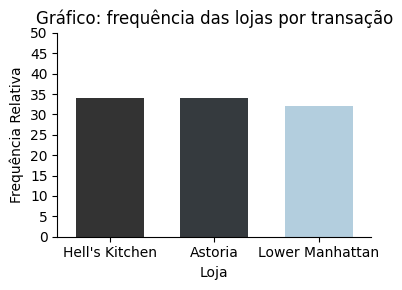

In [ ]:
# Gráfico de frequência
plt.figure(figsize=(4,3))
plt.title('Gráfico: frequência das lojas por transação')
sns.barplot(data=coluna_store_location, x='Loja', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.yticks(np.arange(0,55,5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

#### 2.1.3. Coluna 'product_id'

In [ ]:
# Tabela de frequência 10 principais códigos de produtos
coluna_product_id = dataset['product_id'].value_counts(sort=True).to_frame('Quantidade')
coluna_product_id['Frequência Relativa'] = dataset['product_id'].value_counts(normalize=True) * 100
coluna_product_id.rename_axis('Código dos produtos', inplace=True)
print(coluna_product_id.iloc[0:10])

                     Quantidade  Frequência Relativa
Código dos produtos                                 
71                         3076             2.062824
50                         3053             2.047399
59                         3029             2.031304
54                         3026             2.029293
29                         3013             2.020575
38                         2990             2.005150
61                         2961             1.985702
52                         2955             1.981679
57                         2951             1.978996
44                         2949             1.977655


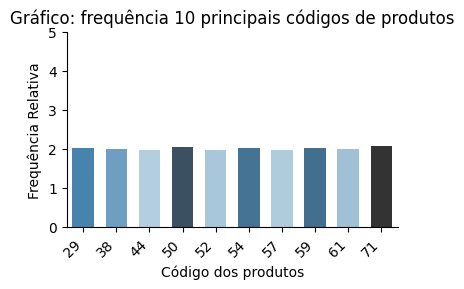

In [ ]:
# Gráfico de frequência 10 principais códigos de produtos
plt.figure(figsize=(4,3))
plt.title('Gráfico: frequência 10 principais códigos de produtos')
sns.barplot(data=coluna_product_id.iloc[0:10], x='Código dos produtos', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,6,1))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.4. Coluna 'transaction_qty'

In [ ]:
# Tabela de frequência
coluna_transaction_qty = dataset['transaction_qty'].value_counts(sort=True).to_frame('Frequência Acumulada')
coluna_transaction_qty['Frequência Relativa'] = dataset['transaction_qty'].value_counts(normalize=True) * 100
coluna_transaction_qty.rename_axis('Quantidade por transação', inplace=True)
print(coluna_transaction_qty)

In [ ]:
# Gráfico de frequência
plt.figure(figsize=(4,3))
plt.title('Gráfico: frequência da quantidade por transação')
sns.barplot(data=coluna_transaction_qty, x='Quantidade por transação', y='Frequência Relativa', hue='Frequência Acumulada', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,75,5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.5. Coluna 'unit_price'

In [ ]:
#definição dos intervalos:
max_precos_unit_price = dataset['unit_price'].max()
min_precos_unit_price = dataset['unit_price'].min()
amplitude_precos_unit_price = dataset['unit_price'].max() - dataset['unit_price'].min()
linhas = dataset.shape[0]
raiz_linhas = math.sqrt(dataset.shape[0])

print('Máximo:', max_precos_unit_price,'; Mínimo:', min_precos_unit_price, 'Amplitude: ', amplitude_precos_unit_price, '; Linhas: ', linhas, '; Raiz Quadrada Linhas: ', raiz_linhas)

Máximo: 45.0 ; Mínimo: 0.8 Amplitude:  44.2 ; Linhas:  149116 ; Raiz Quadrada Linhas:  386.15540912953685


In [ ]:
int_precos_unit_price = (44.2 + 1) / 386
print('Intervalo: ', int_precos_unit_price)

Intervalo:  0.11709844559585493


In [ ]:
# Tabela de frequência
coluna_unit_price = dataset['unit_price'].value_counts(sort=True, bins=list(np.arange(0,50,1))).to_frame('Quantidade')
coluna_unit_price['Frequência Relativa'] = dataset['unit_price'].value_counts(normalize=True, sort=True, bins=list(np.arange(0,50,1))) * 100
coluna_unit_price.rename_axis('Preços unitários Intervalo', inplace=True)
coluna_unit_price = coluna_unit_price.reset_index()
print(coluna_unit_price.iloc[0:10])

In [ ]:
# Histograma
plt.figure(figsize=(5,4))
plt.title('Histograma: preços unitários')
sns.histplot(data=dataset, x='unit_price', bins=55, hue='unit_price', kde=False, palette='Blues_r', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(0, 55, 5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

####2.1.6. Coluna 'Total_Bill'

In [ ]:
#definição dos intervalos:
max_precos_Total_Bill = dataset['Total_Bill'].max()
min_precos_Total_Bill = dataset['Total_Bill'].min()
amplitude_precos_Total_Bill = dataset['Total_Bill'].max() - dataset['Total_Bill'].min()
linhas = dataset.shape[0]
raiz_linhas = math.sqrt(dataset.shape[0])

print('Máximo:', max_precos_Total_Bill,'; Mínimo:', min_precos_Total_Bill, 'Amplitude: ', amplitude_precos_Total_Bill, '; Linhas: ', linhas, '; Raiz Quadrada Linhas: ', raiz_linhas)

In [ ]:
int_precos_Total_Bill = (360 + 2) / 386
print('Intervalo: ', int_precos_Total_Bill)

In [ ]:
# Tabela de frequência
coluna_unit_price = dataset['Total_Bill'].value_counts(sort=True, bins=list(np.arange(0,362,1))).to_frame('Quantidade')
coluna_unit_price['Frequência Relativa'] = dataset['Total_Bill'].value_counts(normalize=True, sort=True, bins=list(np.arange(0,50,1))) * 100
coluna_unit_price.rename_axis('Preços totais Intervalo', inplace=True)
coluna_unit_price = coluna_unit_price.reset_index()
print(coluna_unit_price.iloc[0:10])

In [ ]:
# Histograma
x_total_bill_hist = dataset.loc[dataset['Total_Bill'] < 10.0]

plt.figure(figsize=(5,4))
plt.title('Histograma: preços totais')
sns.histplot(data=x_total_bill_hist, x='Total_Bill', bins=10, hue='Total_Bill', kde=False, palette='Blues_r', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(0, 11, 1))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.7. Coluna 'product_category'

In [ ]:
# Tabela de frequência 10 principais categorias de produtos por transação
coluna_product_category = dataset['product_category'].value_counts(sort=True).to_frame('Quantidade')
coluna_product_category['Frequência Relativa'] = dataset['product_category'].value_counts(normalize=True) * 100
coluna_product_category.rename_axis('Categorias de produtos', inplace=True)
print(coluna_product_category.iloc[0:10])

In [ ]:
# Gráfico de frequência 10 principais categorias de produtos por transação
plt.figure(figsize=(5,4))
plt.title('Gráfico: frequência das 10 principais categorias de produtos por transação', fontsize=9)
sns.barplot(data=coluna_product_category.iloc[0:10], x='Categorias de produtos', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,50,5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.8. Coluna 'product_type'

In [ ]:
# Tabela de frequência 10 principais tipos de produtos por transação
coluna_product_type = dataset['product_type'].value_counts(sort=True).to_frame('Quantidade')
coluna_product_type['Frequência Relativa'] = dataset['product_type'].value_counts(normalize=True) * 100
coluna_product_type.rename_axis('Tipos de produtos', inplace=True)
print(coluna_product_type.iloc[0:10])

In [ ]:
# Gráfico de frequência 10 principais tipos de produtos por transação
plt.figure(figsize=(5,4))
plt.title('Gráfico: frequência dos 10 principais tipos de produtos por transação', fontsize=9)
sns.barplot(data=coluna_product_type.iloc[0:10], x='Tipos de produtos', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,20,5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.9. Coluna 'product_detail'

In [ ]:
# Tabela de frequência 10 principais descrições de produtos por transação
coluna_product_detail = dataset['product_detail'].value_counts(sort=True).to_frame('Quantidade')
coluna_product_detail['Frequência Relativa'] = dataset['product_detail'].value_counts(normalize=True) * 100
coluna_product_detail.rename_axis('Descrições de produtos', inplace=True)
print(coluna_product_detail.iloc[0:10])

In [ ]:
# Gráfico de frequência 10 principais descrições de produtos por transação
plt.figure(figsize=(5,4))
plt.title('Gráfico: frequência das 10 principais descrições de produtos por transação', fontsize=10)
sns.barplot(data=coluna_product_detail.iloc[0:10], x='Descrições de produtos', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,12,2))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.10. Coluna 'Size'

In [ ]:
# Tabela de frequência
coluna_Size = dataset['Size'].value_counts(sort=True).to_frame('Quantidade')
coluna_Size['Frequência Relativa'] = dataset['Size'].value_counts(normalize=True) * 100
coluna_Size.rename_axis('Tamanho', inplace=True)
print(coluna_Size)

In [ ]:
# Gráfico de frequência
plt.figure(figsize=(4,3))
plt.title('Gráfico: frequência dos tamanhos', fontsize=10)
sns.barplot(data=coluna_Size, x='Tamanho', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,55,10))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.11. Coluna 'Day Name'

In [ ]:
# Tabela de frequência - Dia da Semana
coluna_Day_Name = dataset['Day Name'].value_counts(sort=True).to_frame('Quantidade')
coluna_Day_Name['Frequência Relativa'] = dataset['Day Name'].value_counts(normalize=True) * 100
coluna_Day_Name.rename_axis('Dia da semana', inplace=True)
print(coluna_Day_Name)

In [ ]:
# Gráfico de frequência - Dia da Semana
plt.figure(figsize=(4,3))
plt.title('Gráfico: frequência dos dias da semana', fontsize=10)
sns.barplot(data=coluna_Day_Name, x='Dia da semana', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,25,5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

####2.1.12. Coluna 'Hour'

In [ ]:
# Tabela de frequência - Horas
coluna_Hour = dataset['Hour'].value_counts(sort=True).to_frame('Quantidade')
coluna_Hour['Frequência Relativa'] = dataset['Hour'].value_counts(normalize=True) * 100
coluna_Hour.rename_axis('Horas', inplace=True)
print(coluna_Hour)

In [ ]:
# Gráfico de frequência - Horas
plt.figure(figsize=(4,3))
plt.title('Gráfico: frequência das horas', fontsize=10)
sns.barplot(data=coluna_Hour, x='Horas', y='Frequência Relativa', hue='Quantidade', palette='Blues_d', legend=False, width=0.65)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,25,5))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

### 2.2. Indicadores: média, moda, mediana, quartis, desvio padrão, coeficiente de variância, coeficiente de assimetria, coeficiente de curtose e teste de Shapiro-Wilk.

#### 2.2.1. Resultados totais da Rede Shop Sales - análise por transação

In [ ]:
# Variável 'Total_Bill' - Valor total recebido por transação
estatisticaDescritiva(variaveis_numericas['Total_Bill'])

In [ ]:
# Variável 'unit_price' - Preço unitário por transação
estatisticaDescritiva(variaveis_numericas['unit_price'])

In [ ]:
# Variável 'transaction_qty' - Quantidade de produtos por transação
estatisticaDescritiva(variaveis_numericas['transaction_qty'])

Após a análise dos dataset, especialmente dos coeficientes de variação das transações realizadas na rede, foi possível afirmar que o faturamento, representado pela coluna 'Total_Bill', apresenta uma variação de 90,19% em relação à média. Esse elevado desvio se deve à presença de valores extremos na base de dataset. Observa-se que até 75% das transações possuem valores de até 6,00 dólares, enquanto o valor máximo registrado atinge 360 dólares. Essa discrepância evidencia a presença de outliers e uma ampla variação nos valores das vendas individuais, indicando diferenças significativas entre as transações. Em relação aos preços unitários, verificou-se um coeficiente de variação de 78%, o que demonstra um afastamento considerável da média, que foi de 3,38 dólares. Metade dos itens transacionados custava até 3 dólares, sugerindo a existência de produtos com preços mais elevados, porém com menor participação nas vendas. A quantidade de produtos por transação também apresentou uma variação relevante em relação à média. Vale destacar que até 50% dos pedidos envolveram apenas uma unidade, enquanto até 75% contaram com, no máximo, duas unidades; o maior volume registrado foi de 8 unidades em uma única transação. Trata-se de uma cafeteria que comercializa predominantemente cafés e chás, o que se reflete no volume considerável de transações com poucas unidades por pedido, indicando um padrão de consumo unitário e recorrente desses produtos.

#### 2.2.2. Resultados totais das lojas

In [ ]:
# Total_Bill
print(resultados_totais_lojas_total_bill)

In [ ]:
estatisticaDescritiva(resultados_totais_lojas_total_bill)

In [ ]:
# transaction_qty
print(resultados_totais_lojas_transaction_qty)

In [ ]:
estatisticaDescritiva(resultados_totais_lojas_transaction_qty)

In [ ]:
# unit_price
print(resultados_totais_lojas_unit_price)

In [ ]:
estatisticaDescritiva(resultados_totais_lojas_unit_price)

#### 2.2.3. Resultados totais por categoria

In [ ]:
#total_bill
print(resultados_totais_categoria_total_bill)

In [ ]:
estatisticaDescritiva(resultados_totais_categoria_total_bill)

In [ ]:
#transaction_qty
print(resultados_totais_categoria_transaction_qty)

In [ ]:
estatisticaDescritiva(resultados_totais_categoria_transaction_qty)

In [ ]:
#unit_price
print(resultados_totais_categoria_unit_price)

In [ ]:
estatisticaDescritiva(resultados_totais_categoria_unit_price)

#### 2.2.4. Resultados totais por loja e categoria

#####Astoria

In [ ]:
#astoria_categorias_total_bill
print(astoria_categorias_total_bill)

In [ ]:
estatisticaDescritiva(astoria_categorias_total_bill)

In [ ]:
#astoria_categorias_transaction_qty
print(astoria_categorias_transaction_qty)

In [ ]:
estatisticaDescritiva(astoria_categorias_transaction_qty)

In [ ]:
#astoria_categorias_unit_price
print(astoria_categorias_unit_price)

In [ ]:
estatisticaDescritiva(astoria_categorias_unit_price)

#####Lower Manhattan

In [ ]:
#lower_categorias_total_bill
print(lower_categorias_total_bill)

In [ ]:
estatisticaDescritiva(lower_categorias_total_bill)

In [ ]:
#lower_categorias_transaction_qty
print(lower_categorias_transaction_qty)

In [ ]:
estatisticaDescritiva(lower_categorias_transaction_qty)

In [ ]:
#lower_categorias_unit_price
print(lower_categorias_unit_price)

In [ ]:
estatisticaDescritiva(lower_categorias_unit_price)

#####"Hell's Kitchen"

In [ ]:
#hell_categorias_total_bill
print(hell_categorias_total_bill)

In [ ]:
estatisticaDescritiva(hell_categorias_total_bill)

In [ ]:
#hell_categorias_transaction_qty
print(hell_categorias_transaction_qty)

In [ ]:
estatisticaDescritiva(hell_categorias_transaction_qty)

In [ ]:
#hell_categorias_unit_price
print(hell_categorias_unit_price)

In [ ]:
estatisticaDescritiva(hell_categorias_unit_price)

#### 2.2.5. Resultados mensais da rede Shop Sales

In [ ]:
#total_bill
print(resultados_meses_total_bill)

In [ ]:
estatisticaDescritiva(resultados_meses_total_bill)

In [ ]:
#unit_price
print(resultados_meses_unit_price)

In [ ]:
estatisticaDescritiva(resultados_meses_unit_price)

In [ ]:
#transaction_qty
print(resultados_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(resultados_meses_transaction_qty)

#### 2.2.6. Resultados mensais das lojas

#####Astoria

In [ ]:
# astoria_meses_total_bill
print(astoria_meses_total_bill)

In [ ]:
estatisticaDescritiva(astoria_meses_total_bill)

In [ ]:
# astoria_meses_transaction_qty
print(astoria_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(astoria_meses_transaction_qty)

In [ ]:
# astoria_meses_unit_price
print(astoria_meses_unit_price)

In [ ]:
estatisticaDescritiva(astoria_meses_unit_price)

#####Lower Manhattan

In [ ]:
# lower_meses_total_bill
print(lower_meses_total_bill)

In [ ]:
estatisticaDescritiva(lower_meses_total_bill)

In [ ]:
# lower_meses_transaction_qty
print(lower_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(lower_meses_transaction_qty)

In [ ]:
# lower_meses_unit_price
print(lower_meses_unit_price)

In [ ]:
estatisticaDescritiva(lower_meses_unit_price)

#####"Hell's Kitchen"

In [ ]:
# hell_meses_total_bill
print(hell_meses_total_bill)

In [ ]:
estatisticaDescritiva(hell_meses_total_bill)

In [ ]:
# hell_meses_transaction_qty
print(hell_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(hell_meses_transaction_qty)

In [ ]:
# hell_meses_unit_price
print(hell_meses_unit_price)

In [ ]:
estatisticaDescritiva(hell_meses_unit_price)

#### 2.2.7. Resultados mensais por categoria - Rede Coffee Shop

#####Tea

In [ ]:
#tea_meses_total_bill
print(tea_meses_total_bill)

In [ ]:
estatisticaDescritiva(tea_meses_total_bill)

In [ ]:
#tea_meses_transaction_qty
print(tea_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(tea_meses_transaction_qty)

In [ ]:
#tea_meses_unit_price
print(tea_meses_unit_price)

In [ ]:
estatisticaDescritiva(tea_meses_unit_price)

#####Coffee

In [ ]:
#coffee_meses_total_bill
print(coffee_meses_total_bill)

In [ ]:
estatisticaDescritiva(coffee_meses_total_bill)

In [ ]:
#coffee_meses_transaction_qty
print(coffee_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(coffee_meses_transaction_qty)

In [ ]:
#coffee_meses_unit_price
print(coffee_meses_unit_price)

In [ ]:
estatisticaDescritiva(coffee_meses_unit_price)

#####Bakery

In [ ]:
#bakery_meses_total_bill
print(bakery_meses_total_bill)

In [ ]:
estatisticaDescritiva(bakery_meses_total_bill)

In [ ]:
#bakery_meses_transaction_qty
print(bakery_meses_transaction_qty)

In [ ]:
estatisticaDescritiva(bakery_meses_transaction_qty)

In [ ]:
#bakery_meses_unit_price
print(bakery_meses_unit_price)

In [ ]:
estatisticaDescritiva(bakery_meses_unit_price)

#####Drinking Chocolate

In [ ]:
#drinking_chocolate_meses_total_bill
print(drinking_chocolate_meses_total_bill)

In [ ]:
estatisticaDescritiva(drinking_chocolate_meses_total_bill)

In [ ]:
#drinking_chocolate_meses_transaction_qty
print(drinking_chocolate_meses_transaction_qty)

product_category    Month Name
Drinking Chocolate  January       2015
                    February      1964
                    March         2475
                    April         2952
                    May           3930
                    June          4121
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(drinking_chocolate_meses_transaction_qty)

Media: 2909.5
Moda: [2015, 1964, 2475, 2952, 3930, 4121]
Mediana: 2713.5
Desvio Padrão: 937.4272771794087
Coeficiente de Variação: 32.21953178138542%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8801662493381815), pvalue=np.float64(0.26982144716676193))
Teste Kolmogorov-Smirnov: p-valor: 0.9426520171532263
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 1964 ; Máximo: 4121
Quartil 1: 2002.25 ; Quartil 2: 2713.5 ; Quartil 3: 3977.75


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#drinking_chocolate_meses_unit_price
print(drinking_chocolate_meses_unit_price)

product_category    Month Name
Drinking Chocolate  January        5516.00
                    February       5365.75
                    March          6713.75
                    April          8071.75
                    May           10726.75
                    June          11184.75
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(drinking_chocolate_meses_unit_price)

Media: 7929.791666666667
Moda: [5516.0, 5365.75, 6713.75, 8071.75, 10726.75, 11184.75]
Mediana: 7392.75
Desvio Padrão: 2542.335109779328
Coeficiente de Variação: 32.06055362672615%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8770888743516188), pvalue=np.float64(0.25595327901810205))
Teste Kolmogorov-Smirnov: p-valor: 0.9373155436913814
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 5365.75 ; Máximo: 11184.75
Quartil 1: 5478.4375 ; Quartil 2: 7392.75 ; Quartil 3: 10841.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Flavours

In [ ]:
#flavours_meses_total_bill
print(flavours_meses_total_bill)

In [ ]:
estatisticaDescritiva(flavours_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 1401.466666666667
Moda: [974.4000000000001, 930.4000000000001, 1172.0, 1418.4, 1905.6000000000001, 2008.0]
Mediana: 1295.2
Desvio Padrão: 464.5997273639607
Coeficiente de Variação: 33.150965229090524%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8826351666228773), pvalue=np.float64(0.281378054514038))
Teste Kolmogorov-Smirnov: p-valor: 0.9442411635970382
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 930.4000000000001 ; Máximo: 2008.0
Quartil 1: 963.4000000000001 ; Quartil 2: 1295.2 ; Quartil 3: 1931.2


In [ ]:
#flavours_meses_transaction_qty
print(flavours_meses_transaction_qty)

product_category  Month Name
Flavours          January       1218
                  February      1163
                  March         1465
                  April         1773
                  May           2382
                  June          2510
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(flavours_meses_transaction_qty)

In [ ]:
#flavours_meses_unit_price
print(flavours_meses_unit_price)

product_category  Month Name
Flavours          January        620.8
                  February       597.6
                  March          756.8
                  April          916.0
                  May           1237.6
                  June          1303.2
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(flavours_meses_unit_price)

Media: 905.3333333333334
Moda: [620.8000000000001, 597.6, 756.8000000000001, 916.0, 1237.6000000000001, 1303.2]
Mediana: 836.4000000000001
Desvio Padrão: 305.46160915353454
Coeficiente de Variação: 33.74023665171589%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8803628278455968), pvalue=np.float64(0.2707274564480928))
Teste Kolmogorov-Smirnov: p-valor: 0.9430437844591825
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 597.6 ; Máximo: 1303.2
Quartil 1: 615.0 ; Quartil 2: 836.4000000000001 ; Quartil 3: 1254.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Loose Tea

In [ ]:
#loose_meses_total_bill
print(loose_meses_total_bill)

product_category  Month Name
Loose Tea         January       1293.85
                  February      1277.85
                  March         1646.95
                  April         1829.15
                  May           2395.15
                  June          2770.65
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(loose_meses_total_bill)

Media: 1868.9333333333332
Moda: [1293.85, 1277.85, 1646.9499999999998, 1829.1499999999999, 2395.15, 2770.6499999999996]
Mediana: 1738.0499999999997
Desvio Padrão: 603.4826573039747
Coeficiente de Variação: 32.29021851879725%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9068685070415777), pvalue=np.float64(0.416117333316881))
Teste Kolmogorov-Smirnov: p-valor: 0.9471204480577164
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1277.85 ; Máximo: 2770.6499999999996
Quartil 1: 1289.85 ; Quartil 2: 1738.0499999999997 ; Quartil 3: 2489.025


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#loose_meses_transaction_qty
print(loose_meses_transaction_qty)

product_category  Month Name
Loose Tea         January       141
                  February      137
                  March         178
                  April         197
                  May           259
                  June          298
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(loose_meses_transaction_qty)

Media: 201.66666666666666
Moda: [141, 137, 178, 197, 259, 298]
Mediana: 187.5
Desvio Padrão: 64.82489233825743
Coeficiente de Variação: 32.144574713185506%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9105662810581072), pvalue=np.float64(0.44013230069054404))
Teste Kolmogorov-Smirnov: p-valor: 0.9422623270270782
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 137 ; Máximo: 298
Quartil 1: 140.0 ; Quartil 2: 187.5 ; Quartil 3: 268.75


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#loose_meses_unit_price
print(loose_meses_unit_price)

product_category  Month Name
Loose Tea         January       1293.85
                  February      1277.85
                  March         1646.95
                  April         1829.15
                  May           2395.15
                  June          2770.65
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(loose_meses_unit_price)

Media: 1868.9333333333332
Moda: [1293.85, 1277.85, 1646.9499999999998, 1829.1499999999999, 2395.15, 2770.6499999999996]
Mediana: 1738.0499999999997
Desvio Padrão: 603.4826573039747
Coeficiente de Variação: 32.29021851879725%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9068685070415777), pvalue=np.float64(0.416117333316881))
Teste Kolmogorov-Smirnov: p-valor: 0.9471204480577164
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1277.85 ; Máximo: 2770.6499999999996
Quartil 1: 1289.85 ; Quartil 2: 1738.0499999999997 ; Quartil 3: 2489.025


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Packaged Chocolate

In [ ]:
#packaged_chocolate_meses_total_bill
print(packaged_chocolate_meses_total_bill)

product_category    Month Name
Packaged Chocolate  January       521.94
                    February      451.02
                    March         588.20
                    April         873.23
                    May           981.09
                    June          992.16
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(packaged_chocolate_meses_total_bill)

Media: 734.6066666666667
Moda: [521.9399999999999, 451.02, 588.2, 873.23, 981.09, 992.16]
Mediana: 730.715
Desvio Padrão: 242.23443286755636
Coeficiente de Variação: 32.974712027419166%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8588812636903677), pvalue=np.float64(0.18536092963750256))
Teste Kolmogorov-Smirnov: p-valor: 0.8549547003315757
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 451.02 ; Máximo: 992.16
Quartil 1: 504.2099999999999 ; Quartil 2: 730.715 ; Quartil 3: 983.8575


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#packaged_chocolate_meses_transaction_qty
print(packaged_chocolate_meses_transaction_qty)

product_category    Month Name
Packaged Chocolate  January        57
                    February       51
                    March          65
                    April          95
                    May           108
                    June          111
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(packaged_chocolate_meses_transaction_qty)

Media: 81.16666666666667
Moda: [57, 51, 65, 95, 108, 111]
Mediana: 80.0
Desvio Padrão: 26.671457902909367
Coeficiente de Variação: 32.8601124060485%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8673260664157639), pvalue=np.float64(0.21575296886193196))
Teste Kolmogorov-Smirnov: p-valor: 0.8529913905846385
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 51 ; Máximo: 111
Quartil 1: 55.5 ; Quartil 2: 80.0 ; Quartil 3: 108.75


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#packaged_chocolate_meses_unit_price
print(packaged_chocolate_meses_unit_price)

product_category    Month Name
Packaged Chocolate  January       521.94
                    February      451.02
                    March         588.20
                    April         873.23
                    May           981.09
                    June          992.16
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(packaged_chocolate_meses_unit_price)

Media: 734.6066666666667
Moda: [521.9399999999999, 451.02, 588.2, 873.23, 981.09, 992.16]
Mediana: 730.715
Desvio Padrão: 242.23443286755636
Coeficiente de Variação: 32.974712027419166%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8588812636903677), pvalue=np.float64(0.18536092963750256))
Teste Kolmogorov-Smirnov: p-valor: 0.8549547003315757
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 451.02 ; Máximo: 992.16
Quartil 1: 504.2099999999999 ; Quartil 2: 730.715 ; Quartil 3: 983.8575


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Branded

In [ ]:
#branded_meses_total_bill
print(branded_meses_total_bill)

product_category  Month Name
Branded           January       1890.0
                  February      1235.0
                  March         1801.0
                  April         2379.0
                  May           2889.0
                  June          3413.0
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(branded_meses_total_bill)

Media: 2267.8333333333335
Moda: [1890.0, 1235.0, 1801.0, 2379.0, 2889.0, 3413.0]
Mediana: 2134.5
Desvio Padrão: 792.0920190651252
Coeficiente de Variação: 34.927258869631444%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.975078223921455), pvalue=np.float64(0.9246422411705715))
Teste Kolmogorov-Smirnov: p-valor: 0.9640364504078888
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1235.0 ; Máximo: 3413.0
Quartil 1: 1659.5 ; Quartil 2: 2134.5 ; Quartil 3: 3020.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#branded_meses_transaction_qty
print(branded_meses_transaction_qty)

product_category  Month Name
Branded           January       100
                  February       74
                  March         104
                  April         142
                  May           161
                  June          195
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(branded_meses_transaction_qty)

Media: 129.33333333333334
Moda: [100, 74, 104, 142, 161, 195]
Mediana: 123.0
Desvio Padrão: 44.809225240642874
Coeficiente de Variação: 34.6463081757548%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.962044461358052), pvalue=np.float64(0.835350736321771))
Teste Kolmogorov-Smirnov: p-valor: 0.8960590581833362
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 74 ; Máximo: 195
Quartil 1: 93.5 ; Quartil 2: 123.0 ; Quartil 3: 169.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#branded_meses_unit_price
print(branded_meses_unit_price)

product_category  Month Name
Branded           January       1834.0
                  February      1221.0
                  March         1727.0
                  April         2307.0
                  May           2877.0
                  June          3271.0
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(branded_meses_unit_price)

Media: 2206.1666666666665
Moda: [1834.0, 1221.0, 1727.0, 2307.0, 2877.0, 3271.0]
Mediana: 2070.5
Desvio Padrão: 765.8611928193428
Coeficiente de Variação: 34.71456641924951%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9654269264645203), pvalue=np.float64(0.8604267924001485))
Teste Kolmogorov-Smirnov: p-valor: 0.9588838242765445
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1221.0 ; Máximo: 3271.0
Quartil 1: 1600.5 ; Quartil 2: 2070.5 ; Quartil 3: 2975.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Coffee beans

In [ ]:
#coffee_beans_meses_total_bill
print(coffee_beans_meses_total_bill)

product_category  Month Name
Coffee beans      January       5245.25
                  February      4077.50
                  March         5256.20
                  April         6824.70
                  May           8768.95
                  June          9912.65
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(coffee_beans_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 6680.875
Moda: [5245.25, 4077.5, 5256.2, 6824.7, 8768.95, 9912.65]
Mediana: 6040.45
Desvio Padrão: 2266.865319058457
Coeficiente de Variação: 33.930665055976306%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9266423440134806), pvalue=np.float64(0.5544331838895783))
Teste Kolmogorov-Smirnov: p-valor: 0.8269474729095151
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 4077.5 ; Máximo: 9912.65
Quartil 1: 4953.3125 ; Quartil 2: 6040.45 ; Quartil 3: 9054.875


In [ ]:
#coffee_beans_meses_transaction_qty
print(coffee_beans_meses_transaction_qty)

product_category  Month Name
Coffee beans      January       234
                  February      195
                  March         251
                  April         310
                  May           407
                  June          431
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(coffee_beans_meses_transaction_qty)

Media: 304.6666666666667
Moda: [234, 195, 251, 310, 407, 431]
Mediana: 280.5
Desvio Padrão: 96.29260961603785
Coeficiente de Variação: 31.60588937069076%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.910994538563061), pvalue=np.float64(0.44297154004247846))
Teste Kolmogorov-Smirnov: p-valor: 0.9037481112297283
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 195 ; Máximo: 431
Quartil 1: 224.25 ; Quartil 2: 280.5 ; Quartil 3: 413.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#coffee_beans_meses_unit_price
print(coffee_beans_meses_unit_price)

product_category  Month Name
Coffee beans      January       4597.25
                  February      4077.50
                  March         5256.20
                  April         6176.70
                  May           8120.95
                  June          8616.65
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(coffee_beans_meses_unit_price)

Media: 6140.875
Moda: [4597.25, 4077.5, 5256.2, 6176.7, 8120.95, 8616.65]
Mediana: 5716.45
Desvio Padrão: 1869.459102187047
Coeficiente de Variação: 30.442878289935017%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9105629655348894), pvalue=np.float64(0.44011036616368304))
Teste Kolmogorov-Smirnov: p-valor: 0.9552907281926571
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 4077.5 ; Máximo: 8616.65
Quartil 1: 4467.3125 ; Quartil 2: 5716.45 ; Quartil 3: 8244.875


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#### 2.2.8. Resultados mensais por categoria - loja Astoria

#####Tea

In [ ]:
#astoria_tea_meses_total_bill
print(astoria_tea_meses_total_bill)

store_location  product_category  Month Name
Astoria         Tea               January        7827.95
                                  February       7303.15
                                  March          9640.00
                                  April         11401.90
                                  May           15441.90
                                  June          16225.00
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_tea_meses_total_bill)

Media: 11306.65
Moda: [7827.95, 7303.15, 9640.0, 11401.9, 15441.9, 16225.0]
Mediana: 10520.95
Desvio Padrão: 3800.1742067963146
Coeficiente de Variação: 33.61008085327055%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8928531884091314), pvalue=np.float64(0.3334080770283805))
Teste Kolmogorov-Smirnov: p-valor: 0.942853214037949
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 7303.15 ; Máximo: 16225.0
Quartil 1: 7696.75 ; Quartil 2: 10520.95 ; Quartil 3: 15637.675


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_tea_meses_transaction_qty
print(astoria_tea_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Tea               January       2787
                                  February      2581
                                  March         3415
                                  April         4050
                                  May           5475
                                  June          5740
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_tea_meses_transaction_qty)

Media: 4008.0
Moda: [2787, 2581, 3415, 4050, 5475, 5740]
Mediana: 3732.5
Desvio Padrão: 1344.060712914413
Coeficiente de Variação: 33.5344489250103%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8940491399372957), pvalue=np.float64(0.3399495942414039))
Teste Kolmogorov-Smirnov: p-valor: 0.9413526568479027
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2581 ; Máximo: 5740
Quartil 1: 2735.5 ; Quartil 2: 3732.5 ; Quartil 3: 5541.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_tea_meses_unit_price
print(astoria_tea_meses_unit_price)

store_location  product_category  Month Name
Astoria         Tea               January        5327.90
                                  February       4931.20
                                  March          6549.60
                                  April          7707.15
                                  May           10409.85
                                  June          10967.00
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_tea_meses_unit_price)

Media: 7648.783333333333
Moda: [5327.9, 4931.2, 6549.6, 7707.15, 10409.85, 10967.0]
Mediana: 7128.375
Desvio Padrão: 2554.1112064016843
Coeficiente de Variação: 33.39238536501471%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8971720870140942), pvalue=np.float64(0.3574843760547707))
Teste Kolmogorov-Smirnov: p-valor: 0.9460475194165386
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 4931.2 ; Máximo: 10967.0
Quartil 1: 5228.724999999999 ; Quartil 2: 7128.375 ; Quartil 3: 10549.1375


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Coffee

In [ ]:
#astoria_coffee_meses_total_bill
print(astoria_coffee_meses_total_bill)

store_location  product_category  Month Name
Astoria         Coffee            January       10386.80
                                  February       9725.75
                                  March         12649.00
                                  April         15280.55
                                  May           20282.10
                                  June          21420.10
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_coffee_meses_total_bill)

Media: 14957.383333333331
Moda: [10386.8, 9725.75, 12649.0, 15280.55, 20282.1, 21420.1]
Mediana: 13964.775
Desvio Padrão: 4976.195413030588
Coeficiente de Variação: 33.269157459786896%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8954020998888638), pvalue=np.float64(0.3474656312796637))
Teste Kolmogorov-Smirnov: p-valor: 0.9507965588950936
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 9725.75 ; Máximo: 21420.1
Quartil 1: 10221.537499999999 ; Quartil 2: 13964.775 ; Quartil 3: 20566.6


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_coffee_meses_transaction_qty
print(astoria_coffee_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Coffee            January       3435
                                  February      3202
                                  March         4157
                                  April         5038
                                  May           6733
                                  June          7090
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_coffee_meses_transaction_qty)

Media: 4942.5
Moda: [3435, 3202, 4157, 5038, 6733, 7090]
Mediana: 4597.5
Desvio Padrão: 1658.0514768848402
Coeficiente de Variação: 33.54681794405342%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.892928094090494), pvalue=np.float64(0.3338149774747733))
Teste Kolmogorov-Smirnov: p-valor: 0.9465522305690341
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 3202 ; Máximo: 7090
Quartil 1: 3376.75 ; Quartil 2: 4597.5 ; Quartil 3: 6822.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_coffee_meses_unit_price
print(astoria_coffee_meses_unit_price)

store_location  product_category  Month Name
Astoria         Coffee            January        7010.90
                                  February       6524.25
                                  March          8654.65
                                  April         10254.90
                                  May           13697.85
                                  June          14417.75
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_coffee_meses_unit_price)

Media: 10093.383333333333
Moda: [7010.9, 6524.25, 8654.65, 10254.9, 13697.85, 14417.75]
Mediana: 9454.775
Desvio Padrão: 3347.5000973363194
Coeficiente de Variação: 33.16529241766952%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.89810235457624), pvalue=np.float64(0.36283470864310063))
Teste Kolmogorov-Smirnov: p-valor: 0.9479141906569792
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 6524.25 ; Máximo: 14417.75
Quartil 1: 6889.237499999999 ; Quartil 2: 9454.775 ; Quartil 3: 13877.825


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Bakery

In [ ]:
#astoria_bakery_meses_total_bill
print(astoria_bakery_meses_total_bill)

store_location  product_category  Month Name
Astoria         Bakery            January       3102.50
                                  February      2925.50
                                  March         3861.75
                                  April         4465.00
                                  May           6046.25
                                  June          6198.75
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_bakery_meses_total_bill)

Media: 4433.291666666667
Moda: [3102.5, 2925.5, 3861.75, 4465.0, 6046.25, 6198.75]
Mediana: 4163.375
Desvio Padrão: 1420.6044612828255
Coeficiente de Variação: 32.04401081851127%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8825451952882076), pvalue=np.float64(0.28095010516030033))
Teste Kolmogorov-Smirnov: p-valor: 0.9197887618840521
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2925.5 ; Máximo: 6198.75
Quartil 1: 3058.25 ; Quartil 2: 4163.375 ; Quartil 3: 6084.375


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_bakery_meses_transaction_qty
print(astoria_bakery_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Bakery            January        872
                                  February       829
                                  March         1090
                                  April         1256
                                  May           1700
                                  June          1749
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_bakery_meses_transaction_qty)

Media: 1249.3333333333333
Moda: [872, 829, 1090, 1256, 1700, 1749]
Mediana: 1173.0
Desvio Padrão: 399.31424550930643
Coeficiente de Variação: 31.962186140019195%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8821124696872995), pvalue=np.float64(0.27889906553980987))
Teste Kolmogorov-Smirnov: p-valor: 0.9233052629567154
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 829 ; Máximo: 1749
Quartil 1: 861.25 ; Quartil 2: 1173.0 ; Quartil 3: 1712.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_bakery_meses_unit_price
print(astoria_bakery_meses_unit_price)

store_location  product_category  Month Name
Astoria         Bakery            January       3021.75
                                  February      2862.50
                                  March         3730.25
                                  April         4322.75
                                  May           5880.75
                                  June          6026.75
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_bakery_meses_unit_price)

Media: 4307.458333333333
Moda: [3021.75, 2862.5, 3730.25, 4322.75, 5880.75, 6026.75]
Mediana: 4026.5
Desvio Padrão: 1378.8084930173104
Coeficiente de Variação: 32.00979292933328%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8782697050212586), pvalue=np.float64(0.2612049748946036))
Teste Kolmogorov-Smirnov: p-valor: 0.916822439686092
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2862.5 ; Máximo: 6026.75
Quartil 1: 2981.9375 ; Quartil 2: 4026.5 ; Quartil 3: 5917.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Drinking Chocolate

In [ ]:
#astoria_drinking_chocolate_meses_total_bill
print(astoria_drinking_chocolate_meses_total_bill)

store_location  product_category    Month Name
Astoria         Drinking Chocolate  January       3110.25
                                    February      2995.75
                                    March         3505.50
                                    April         4584.75
                                    May           5971.25
                                    June          6167.75
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_drinking_chocolate_meses_total_bill)

Media: 4389.208333333333
Moda: [3110.25, 2995.75, 3505.5, 4584.75, 5971.25, 6167.75]
Mediana: 4045.125
Desvio Padrão: 1418.6404619975658
Coeficiente de Variação: 32.32110107929636%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8577295101113818), pvalue=np.float64(0.18151168695319003))
Teste Kolmogorov-Smirnov: p-valor: 0.8335589244306326
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2995.75 ; Máximo: 6167.75
Quartil 1: 3081.625 ; Quartil 2: 4045.125 ; Quartil 3: 6020.375


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_drinking_chocolate_meses_transaction_qty
print(astoria_drinking_chocolate_meses_transaction_qty)

store_location  product_category    Month Name
Astoria         Drinking Chocolate  January        757
                                    February       724
                                    March          851
                                    April         1104
                                    May           1435
                                    June          1480
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_drinking_chocolate_meses_transaction_qty)

Media: 1058.5
Moda: [757, 724, 851, 1104, 1435, 1480]
Mediana: 977.5
Desvio Padrão: 336.8481853892047
Coeficiente de Variação: 31.823163475597987%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.860576114931687), pvalue=np.float64(0.19115136368141455))
Teste Kolmogorov-Smirnov: p-valor: 0.8416777752998527
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 724 ; Máximo: 1480
Quartil 1: 748.75 ; Quartil 2: 977.5 ; Quartil 3: 1446.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_drinking_chocolate_meses_unit_price
print(astoria_drinking_chocolate_meses_unit_price)

store_location  product_category    Month Name
Astoria         Drinking Chocolate  January       2087.75
                                    February      2026.00
                                    March         2357.25
                                    April         3126.00
                                    May           4060.25
                                    June          4165.50
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_drinking_chocolate_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 2970.4583333333335
Moda: [2087.75, 2026.0, 2357.25, 3126.0, 4060.25, 4165.5]
Mediana: 2741.625
Desvio Padrão: 968.2111006473054
Coeficiente de Variação: 32.59467031677958%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8509951479479823), pvalue=np.float64(0.160345726657028))
Teste Kolmogorov-Smirnov: p-valor: 0.8210873074491866
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2026.0 ; Máximo: 4165.5
Quartil 1: 2072.3125 ; Quartil 2: 2741.625 ; Quartil 3: 4086.5625


#####Flavours

In [ ]:
#astoria_flavours_meses_total_bill
print(astoria_flavours_meses_total_bill)

store_location  product_category  Month Name
Astoria         Flavours          January       216.8
                                  February      204.8
                                  March         242.4
                                  April         288.0
                                  May           404.0
                                  June          408.8
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_flavours_meses_total_bill)

Media: 294.1333333333333
Moda: [216.8, 204.8, 242.4, 288.0, 404.0, 408.8]
Mediana: 265.2
Desvio Padrão: 91.53575621945046
Coeficiente de Variação: 31.12049735475424%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.84132006258826), pvalue=np.float64(0.13368399122761676))
Teste Kolmogorov-Smirnov: p-valor: 0.8835670605313709
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 204.8 ; Máximo: 408.8
Quartil 1: 213.8 ; Quartil 2: 265.2 ; Quartil 3: 405.2


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_flavours_meses_transaction_qty
print(astoria_flavours_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Flavours          January       271
                                  February      256
                                  March         303
                                  April         360
                                  May           505
                                  June          511
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_flavours_meses_transaction_qty)

Media: 367.6666666666667
Moda: [271, 256, 303, 360, 505, 511]
Mediana: 331.5
Desvio Padrão: 114.41969527431309
Coeficiente de Variação: 31.12049735475424%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8413200625882595), pvalue=np.float64(0.13368399122761593))
Teste Kolmogorov-Smirnov: p-valor: 0.8835670605313709
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 256 ; Máximo: 511
Quartil 1: 267.25 ; Quartil 2: 331.5 ; Quartil 3: 506.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_flavours_meses_unit_price
print(astoria_flavours_meses_unit_price)

store_location  product_category  Month Name
Astoria         Flavours          January       144.0
                                  February      138.4
                                  March         163.2
                                  April         195.2
                                  May           272.8
                                  June          278.4
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_flavours_meses_unit_price)

Media: 198.6666666666667
Moda: [144.0, 138.4, 163.20000000000002, 195.20000000000002, 272.8, 278.40000000000003]
Mediana: 179.20000000000002
Desvio Padrão: 62.83879905493634
Coeficiente de Variação: 31.630267980672645%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8428019135636468), pvalue=np.float64(0.1374979164900768))
Teste Kolmogorov-Smirnov: p-valor: 0.8954972161999433
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 138.4 ; Máximo: 278.40000000000003
Quartil 1: 142.6 ; Quartil 2: 179.20000000000002 ; Quartil 3: 274.20000000000005


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Loose Tea

In [ ]:
#astoria_loose_meses_total_bill
print(astoria_loose_meses_total_bill)

store_location  product_category  Month Name
Astoria         Loose Tea         January       395.95
                                  February      342.80
                                  March         474.40
                                  April         559.20
                                  May           689.90
                                  June          731.75
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_loose_meses_total_bill)

Media: 532.3333333333334
Moda: [395.95, 342.79999999999995, 474.4, 559.1999999999999, 689.9, 731.75]
Mediana: 516.8
Desvio Padrão: 156.96856266993933
Coeficiente de Variação: 29.486893425786974%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9388024924236033), pvalue=np.float64(0.6495653305892712))
Teste Kolmogorov-Smirnov: p-valor: 0.9748698725269926
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 342.79999999999995 ; Máximo: 731.75
Quartil 1: 382.66249999999997 ; Quartil 2: 516.8 ; Quartil 3: 700.3625


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_loose_meses_transaction_qty
print(astoria_loose_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Loose Tea         January       43
                                  February      37
                                  March         51
                                  April         60
                                  May           74
                                  June          79
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_loose_meses_transaction_qty)

Media: 57.333333333333336
Moda: [43, 37, 51, 60, 74, 79]
Mediana: 55.5
Desvio Padrão: 16.812693617224657
Coeficiente de Variação: 29.324465611438356%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9426891634195185), pvalue=np.float64(0.6809334928339346))
Teste Kolmogorov-Smirnov: p-valor: 0.9784888158426771
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 37 ; Máximo: 79
Quartil 1: 41.5 ; Quartil 2: 55.5 ; Quartil 3: 75.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_loose_meses_unit_price
print(astoria_loose_meses_unit_price)

store_location  product_category  Month Name
Astoria         Loose Tea         January       395.95
                                  February      342.80
                                  March         474.40
                                  April         559.20
                                  May           689.90
                                  June          731.75
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_loose_meses_unit_price)

Media: 532.3333333333334
Moda: [395.95, 342.79999999999995, 474.4, 559.1999999999999, 689.9, 731.75]
Mediana: 516.8
Desvio Padrão: 156.96856266993933
Coeficiente de Variação: 29.486893425786974%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9388024924236033), pvalue=np.float64(0.6495653305892712))
Teste Kolmogorov-Smirnov: p-valor: 0.9748698725269926
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 342.79999999999995 ; Máximo: 731.75
Quartil 1: 382.66249999999997 ; Quartil 2: 516.8 ; Quartil 3: 700.3625


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Packaged Chocolate

In [ ]:
#astoria_packaged_chocolate_meses_total_bill
print(astoria_packaged_chocolate_meses_total_bill)

store_location  product_category    Month Name
Astoria         Packaged Chocolate  January       154.11
                                    February       98.39
                                    March         131.98
                                    April         247.56
                                    May           276.76
                                    June          180.91
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_packaged_chocolate_meses_total_bill)

Media: 181.61833333333334
Moda: [154.10999999999999, 98.39, 131.98, 247.56, 276.76, 180.91]
Mediana: 167.51
Desvio Padrão: 68.62706446196476
Coeficiente de Variação: 37.78641902632705%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9490789159002402), pvalue=np.float64(0.7328162545961945))
Teste Kolmogorov-Smirnov: p-valor: 0.9804578513477357
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 98.39 ; Máximo: 276.76
Quartil 1: 123.58249999999998 ; Quartil 2: 167.51 ; Quartil 3: 254.86


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_packaged_chocolate_meses_transaction_qty
print(astoria_packaged_chocolate_meses_transaction_qty)

store_location  product_category    Month Name
Astoria         Packaged Chocolate  January       15
                                    February      11
                                    March         13
                                    April         24
                                    May           28
                                    June          19
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_packaged_chocolate_meses_transaction_qty)

Media: 18.333333333333332
Moda: [15, 11, 13, 24, 28, 19]
Mediana: 17.0
Desvio Padrão: 6.623191577077222
Coeficiente de Variação: 36.1264995113303%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9416531949726197), pvalue=np.float64(0.6725463209253977))
Teste Kolmogorov-Smirnov: p-valor: 0.9477652406223724
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 11 ; Máximo: 28
Quartil 1: 12.5 ; Quartil 2: 17.0 ; Quartil 3: 25.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_packaged_chocolate_meses_unit_price
print(astoria_packaged_chocolate_meses_unit_price)

store_location  product_category    Month Name
Astoria         Packaged Chocolate  January       154.11
                                    February       98.39
                                    March         131.98
                                    April         247.56
                                    May           276.76
                                    June          180.91
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_packaged_chocolate_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 181.61833333333334
Moda: [154.10999999999999, 98.39, 131.98, 247.56, 276.76, 180.91]
Mediana: 167.51
Desvio Padrão: 68.62706446196476
Coeficiente de Variação: 37.78641902632705%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9490789159002402), pvalue=np.float64(0.7328162545961945))
Teste Kolmogorov-Smirnov: p-valor: 0.9804578513477357
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 98.39 ; Máximo: 276.76
Quartil 1: 123.58249999999998 ; Quartil 2: 167.51 ; Quartil 3: 254.86


#####Branded

In [ ]:
#astoria_branded_meses_total_bill
print(astoria_branded_meses_total_bill)

store_location  product_category  Month Name
Astoria         Branded           January        858.0
                                  February       475.0
                                  March          759.0
                                  April          957.0
                                  May           1037.0
                                  June          1371.0
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_branded_meses_total_bill)

Media: 909.5
Moda: [858.0, 475.0, 759.0, 957.0, 1037.0, 1371.0]
Mediana: 907.5
Desvio Padrão: 298.52554329571194
Coeficiente de Variação: 32.82303939480065%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9861279725669756), pvalue=np.float64(0.9776552512175499))
Teste Kolmogorov-Smirnov: p-valor: 0.9833152650793155
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 475.0 ; Máximo: 1371.0
Quartil 1: 688.0 ; Quartil 2: 907.5 ; Quartil 3: 1120.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_branded_meses_transaction_qty
print(astoria_branded_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Branded           January       42
                                  February      25
                                  March         41
                                  April         52
                                  May           50
                                  June          69
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_branded_meses_transaction_qty)

Media: 46.5
Moda: [42, 25, 41, 52, 50, 69]
Mediana: 46.0
Desvio Padrão: 14.570518178843194
Coeficiente de Variação: 31.33444769643698%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9697795496658759), pvalue=np.float64(0.8909502685995483))
Teste Kolmogorov-Smirnov: p-valor: 0.9593099746157807
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -0.0
Mínimo: 25 ; Máximo: 69
Quartil 1: 37.0 ; Quartil 2: 46.0 ; Quartil 3: 56.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_branded_meses_unit_price
print(astoria_branded_meses_unit_price)

store_location  product_category  Month Name
Astoria         Branded           January        858.0
                                  February       475.0
                                  March          759.0
                                  April          957.0
                                  May           1037.0
                                  June          1371.0
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_branded_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 909.5
Moda: [858.0, 475.0, 759.0, 957.0, 1037.0, 1371.0]
Mediana: 907.5
Desvio Padrão: 298.52554329571194
Coeficiente de Variação: 32.82303939480065%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9861279725669756), pvalue=np.float64(0.9776552512175499))
Teste Kolmogorov-Smirnov: p-valor: 0.9833152650793155
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 475.0 ; Máximo: 1371.0
Quartil 1: 688.0 ; Quartil 2: 907.5 ; Quartil 3: 1120.5


#####Coffee beans

In [ ]:
#astoria_coffee_beans_meses_total_bill
print(astoria_coffee_beans_meses_total_bill)

store_location  product_category  Month Name
Astoria         Coffee beans      January       1261.30
                                  February      1034.20
                                  March         1571.40
                                  April         1693.65
                                  May           2279.60
                                  June          2379.05
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_coffee_beans_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 1703.2
Moda: [1261.3, 1034.2, 1571.4, 1693.65, 2279.6, 2379.05]
Mediana: 1632.525
Desvio Padrão: 538.3881935926902
Coeficiente de Variação: 31.610391826719713%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9305857513552419), pvalue=np.float64(0.5846329192114369))
Teste Kolmogorov-Smirnov: p-valor: 0.9505572522092274
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1034.2 ; Máximo: 2379.05
Quartil 1: 1204.5249999999999 ; Quartil 2: 1632.525 ; Quartil 3: 2304.4624999999996


In [ ]:
#astoria_coffee_beans_meses_transaction_qty
print(astoria_coffee_beans_meses_transaction_qty)

store_location  product_category  Month Name
Astoria         Coffee beans      January        59
                                  February       53
                                  March          78
                                  April          82
                                  May           114
                                  June          116
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(astoria_coffee_beans_meses_transaction_qty)

Media: 83.66666666666667
Moda: [59, 53, 78, 82, 114, 116]
Mediana: 80.0
Desvio Padrão: 26.643323116057925
Coeficiente de Variação: 31.84460930206126%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8930185892068387), pvalue=np.float64(0.33430706326556836))
Teste Kolmogorov-Smirnov: p-valor: 0.9181691825984932
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 53 ; Máximo: 116
Quartil 1: 57.5 ; Quartil 2: 80.0 ; Quartil 3: 114.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#astoria_coffee_beans_meses_unit_price
print(astoria_coffee_beans_meses_unit_price)

store_location  product_category  Month Name
Astoria         Coffee beans      January       1261.30
                                  February      1034.20
                                  March         1571.40
                                  April         1693.65
                                  May           2279.60
                                  June          2379.05
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(astoria_coffee_beans_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 1703.2
Moda: [1261.3, 1034.2, 1571.4, 1693.65, 2279.6, 2379.05]
Mediana: 1632.525
Desvio Padrão: 538.3881935926902
Coeficiente de Variação: 31.610391826719713%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9305857513552419), pvalue=np.float64(0.5846329192114369))
Teste Kolmogorov-Smirnov: p-valor: 0.9505572522092274
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1034.2 ; Máximo: 2379.05
Quartil 1: 1204.5249999999999 ; Quartil 2: 1632.525 ; Quartil 3: 2304.4624999999996


#### 2.2.9. Resultados mensais por categoria - loja Lower Manhattan

#####Tea

In [ ]:
#lower_tea_meses_total_bill
print(lower_tea_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Tea               January        7145.40
                                   February       7216.85
                                   March          9137.10
                                   April         10994.00
                                   May           14571.00
                                   June          14800.40
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_tea_meses_total_bill)

Media: 10644.125
Moda: [7145.4, 7216.85, 9137.1, 10994.0, 14571.0, 14800.4]
Mediana: 10065.55
Desvio Padrão: 3437.318622378496
Coeficiente de Variação: 32.29310650127179%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8654251777610356), pvalue=np.float64(0.20857017853070586))
Teste Kolmogorov-Smirnov: p-valor: 0.9160957061749461
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 7145.4 ; Máximo: 14800.4
Quartil 1: 7198.987500000001 ; Quartil 2: 10065.55 ; Quartil 3: 14628.35


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_tea_meses_transaction_qty
print(lower_tea_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Tea               January       2540
                                   February      2562
                                   March         3251
                                   April         3908
                                   May           5178
                                   June          5270
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_tea_meses_transaction_qty)

Media: 3784.8333333333335
Moda: [2540, 2562, 3251, 3908, 5178, 5270]
Mediana: 3579.5
Desvio Padrão: 1224.0680400478834
Coeficiente de Variação: 32.34139874185257%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8663513135404698), pvalue=np.float64(0.2120443151790466))
Teste Kolmogorov-Smirnov: p-valor: 0.918353981394709
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2540 ; Máximo: 5270
Quartil 1: 2556.5 ; Quartil 2: 3579.5 ; Quartil 3: 5201.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_tea_meses_unit_price
print(lower_tea_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Tea               January       4422.20
                                   February      4366.20
                                   March         5590.85
                                   April         6760.20
                                   May           8893.85
                                   June          9109.20
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_tea_meses_unit_price)

Media: 6523.75
Moda: [4422.2, 4366.2, 5590.85, 6760.2, 8893.85, 9109.2]
Mediana: 6175.525
Desvio Padrão: 2111.855635691039
Coeficiente de Variação: 32.3718051073545%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8713572535568619), pvalue=np.float64(0.23166888992385576))
Teste Kolmogorov-Smirnov: p-valor: 0.9265163886496711
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 4366.2 ; Máximo: 9109.2
Quartil 1: 4408.2 ; Quartil 2: 6175.525 ; Quartil 3: 8947.6875


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Coffee

In [ ]:
#lower_coffee_meses_total_bill
print(lower_coffee_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Coffee            January       10355.65
                                   February       9598.85
                                   March         12539.45
                                   April         15179.05
                                   May           19957.45
                                   June          21355.05
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_coffee_meses_total_bill)

Media: 14830.916666666666
Moda: [10355.65, 9598.85, 12539.45, 15179.05, 19957.45, 21355.05]
Mediana: 13859.25
Desvio Padrão: 4931.940985318728
Coeficiente de Variação: 33.254458211632645%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9043008048407156), pvalue=np.float64(0.3999753233831227))
Teste Kolmogorov-Smirnov: p-valor: 0.9629117577233466
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 9598.85 ; Máximo: 21355.05
Quartil 1: 10166.449999999999 ; Quartil 2: 13859.25 ; Quartil 3: 20306.850000000002


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_coffee_meses_transaction_qty
print(lower_coffee_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Coffee            January       3414
                                   February      3174
                                   March         4117
                                   April         5022
                                   May           6574
                                   June          7074
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_coffee_meses_transaction_qty)

Media: 4895.833333333333
Moda: [3414, 3174, 4117, 5022, 6574, 7074]
Mediana: 4569.5
Desvio Padrão: 1633.6274259042873
Coeficiente de Variação: 33.367709124853526%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.904712371551961), pvalue=np.float64(0.402532980993741))
Teste Kolmogorov-Smirnov: p-valor: 0.964178220148066
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 3174 ; Máximo: 7074
Quartil 1: 3354.0 ; Quartil 2: 4569.5 ; Quartil 3: 6699.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_coffee_meses_unit_price
print(lower_coffee_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Coffee            January        6467.20
                                   February       5965.85
                                   March          7743.15
                                   April          9386.05
                                   May           12370.45
                                   June          13254.95
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_coffee_meses_unit_price)

Media: 9197.941666666666
Moda: [6467.2, 5965.85, 7743.15, 9386.05, 12370.45, 13254.95]
Mediana: 8564.599999999999
Desvio Padrão: 3052.18924289053
Coeficiente de Variação: 33.1833942147259%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9039287322096277), pvalue=np.float64(0.3976728808579397))
Teste Kolmogorov-Smirnov: p-valor: 0.9629246427046445
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 5965.85 ; Máximo: 13254.95
Quartil 1: 6341.862499999999 ; Quartil 2: 8564.599999999999 ; Quartil 3: 12591.575


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Bakery

In [ ]:
#lower_bakery_meses_total_bill
print(lower_bakery_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Bakery            January       3315.05
                                   February      3114.72
                                   March         4053.38
                                   April         4886.25
                                   May           6352.02
                                   June          6607.52
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_bakery_meses_total_bill)

Media: 4721.490000000001
Moda: [3315.05, 3114.72, 4053.38, 4886.25, 6352.02, 6607.52]
Mediana: 4469.8150000000005
Desvio Padrão: 1499.9358238271398
Coeficiente de Variação: 31.768272808523147%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8943200802660211), pvalue=np.float64(0.34144488800638817))
Teste Kolmogorov-Smirnov: p-valor: 0.9433536234965557
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 3114.72 ; Máximo: 6607.52
Quartil 1: 3264.9675 ; Quartil 2: 4469.8150000000005 ; Quartil 3: 6415.895


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_bakery_meses_transaction_qty
print(lower_bakery_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Bakery            January        942
                                   February       891
                                   March         1147
                                   April         1386
                                   May           1799
                                   June          1875
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_bakery_meses_transaction_qty)

Media: 1340.0
Moda: [942, 891, 1147, 1386, 1799, 1875]
Mediana: 1266.5
Desvio Padrão: 423.3854036218065
Coeficiente de Variação: 31.595925643418397%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8924214129752963), pvalue=np.float64(0.3310699159506547))
Teste Kolmogorov-Smirnov: p-valor: 0.944676212625146
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 891 ; Máximo: 1875
Quartil 1: 929.25 ; Quartil 2: 1266.5 ; Quartil 3: 1818.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_bakery_meses_unit_price
print(lower_bakery_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Bakery            January       3270.00
                                   February      3067.02
                                   March         4000.38
                                   April         4804.10
                                   May           6285.77
                                   June          6504.17
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_bakery_meses_unit_price)

Media: 4655.240000000001
Moda: [3270.0, 3067.02, 4000.38, 4804.1, 6285.77, 6504.17]
Mediana: 4402.24
Desvio Padrão: 1481.1822150566081
Coeficiente de Variação: 31.817526380092282%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8916675648569131), pvalue=np.float64(0.3270175149985223))
Teste Kolmogorov-Smirnov: p-valor: 0.9369960174304394
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 3067.02 ; Máximo: 6504.17
Quartil 1: 3219.255 ; Quartil 2: 4402.24 ; Quartil 3: 6340.370000000001


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Drinking Chocolate

In [ ]:
#lower_drinking_chocolate_meses_total_bill
print(lower_drinking_chocolate_meses_total_bill)

store_location   product_category    Month Name
Lower Manhattan  Drinking Chocolate  January       2513.75
                                     February      2443.75
                                     March         3505.00
                                     April         3625.75
                                     May           5155.00
                                     June          5251.25
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_drinking_chocolate_meses_total_bill)

Media: 3749.0833333333335
Moda: [2513.75, 2443.75, 3505.0, 3625.75, 5155.0, 5251.25]
Mediana: 3565.375
Desvio Padrão: 1227.83042056575
Coeficiente de Variação: 32.75015014067661%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8675466180478135), pvalue=np.float64(0.21659957277000846))
Teste Kolmogorov-Smirnov: p-valor: 0.9147030494121596
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 2443.75 ; Máximo: 5251.25
Quartil 1: 2496.25 ; Quartil 2: 3565.375 ; Quartil 3: 5179.0625


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_drinking_chocolate_meses_transaction_qty
print(lower_drinking_chocolate_meses_transaction_qty)

store_location   product_category    Month Name
Lower Manhattan  Drinking Chocolate  January        608
                                     February       592
                                     March          847
                                     April          873
                                     May           1247
                                     June          1267
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_drinking_chocolate_meses_transaction_qty)

Media: 905.6666666666666
Moda: [608, 592, 847, 873, 1247, 1267]
Mediana: 860.0
Desvio Padrão: 296.1659444748276
Coeficiente de Variação: 32.70142927583669%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8642977716152411), pvalue=np.float64(0.20440555944291694))
Teste Kolmogorov-Smirnov: p-valor: 0.9058500014731398
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 592 ; Máximo: 1267
Quartil 1: 604.0 ; Quartil 2: 860.0 ; Quartil 3: 1252.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_drinking_chocolate_meses_unit_price
print(lower_drinking_chocolate_meses_unit_price)

store_location   product_category    Month Name
Lower Manhattan  Drinking Chocolate  January       1608.50
                                     February      1568.50
                                     March         2181.50
                                     April         2270.50
                                     May           3197.75
                                     June          3276.25
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_drinking_chocolate_meses_unit_price)

Media: 2350.5
Moda: [1608.5, 1568.5, 2181.5, 2270.5, 3197.75, 3276.25]
Mediana: 2226.0
Desvio Padrão: 744.5662663591469
Coeficiente de Variação: 31.67693113631767%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8689860820867696), pvalue=np.float64(0.22219331219563654))
Teste Kolmogorov-Smirnov: p-valor: 0.9089001476914619
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1568.5 ; Máximo: 3276.25
Quartil 1: 1598.5 ; Quartil 2: 2226.0 ; Quartil 3: 3217.375


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Flavours

In [ ]:
#lower_flavours_meses_total_bill
print(lower_flavours_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Flavours          January       455.2
                                   February      405.6
                                   March         512.8
                                   April         646.4
                                   May           851.2
                                   June          896.0
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_flavours_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 627.8666666666667
Moda: [455.20000000000005, 405.6, 512.8000000000001, 646.4, 851.2, 896.0]
Mediana: 579.6
Desvio Padrão: 207.15855441344115
Coeficiente de Variação: 32.99403606075194%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.895157276734777), pvalue=np.float64(0.3460964570302241))
Teste Kolmogorov-Smirnov: p-valor: 0.9055044710080102
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 405.6 ; Máximo: 896.0
Quartil 1: 442.80000000000007 ; Quartil 2: 579.6 ; Quartil 3: 862.4000000000001


In [ ]:
#lower_flavours_meses_transaction_qty
print(lower_flavours_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Flavours          January        569
                                   February       507
                                   March          641
                                   April          808
                                   May           1064
                                   June          1120
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_flavours_meses_transaction_qty)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 784.8333333333334
Moda: [569, 507, 641, 808, 1064, 1120]
Mediana: 724.5
Desvio Padrão: 258.94819301680144
Coeficiente de Variação: 32.99403606075194%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.895157276734777), pvalue=np.float64(0.3460964570302241))
Teste Kolmogorov-Smirnov: p-valor: 0.9055044710080099
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 507 ; Máximo: 1120
Quartil 1: 553.5 ; Quartil 2: 724.5 ; Quartil 3: 1078.0


In [ ]:
#lower_flavours_meses_unit_price
print(lower_flavours_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Flavours          January       278.4
                                   February      254.4
                                   March         318.4
                                   April         400.0
                                   May           531.2
                                   June          561.6
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_flavours_meses_unit_price)

Media: 390.6666666666667
Moda: [278.40000000000003, 254.4, 318.40000000000003, 400.0, 531.2, 561.6]
Mediana: 359.20000000000005
Desvio Padrão: 130.7285839694849
Coeficiente de Variação: 33.462948115055866%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8894451808381224), pvalue=np.float64(0.3152909727132494))
Teste Kolmogorov-Smirnov: p-valor: 0.9079603313254583
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 254.4 ; Máximo: 561.6
Quartil 1: 272.40000000000003 ; Quartil 2: 359.20000000000005 ; Quartil 3: 538.8000000000001


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Loose Tea

In [ ]:
#lower_loose_meses_total_bill
print(lower_loose_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Loose Tea         January       377.00
                                   February      468.40
                                   March         542.85
                                   April         540.75
                                   May           717.15
                                   June          912.10
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_loose_meses_total_bill)

Media: 593.0416666666666
Moda: [377.0, 468.4, 542.85, 540.75, 717.15, 912.0999999999999]
Mediana: 541.8
Desvio Padrão: 192.17922212525124
Coeficiente de Variação: 32.40568629948732%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9284472904430713), pvalue=np.float64(0.568165554499392))
Teste Kolmogorov-Smirnov: p-valor: 0.6866648527201558
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 377.0 ; Máximo: 912.0999999999999
Quartil 1: 445.54999999999995 ; Quartil 2: 541.8 ; Quartil 3: 765.8874999999999


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_loose_meses_transaction_qty
print(lower_loose_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Loose Tea         January       41
                                   February      50
                                   March         58
                                   April         58
                                   May           77
                                   June          97
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_loose_meses_transaction_qty)

Media: 63.5
Moda: [58]
Mediana: 58.0
Desvio Padrão: 20.265734627691145
Coeficiente de Variação: 31.914542720773458%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9251067900502324), pvalue=np.float64(0.5428781456463481))
Teste Kolmogorov-Smirnov: p-valor: 0.6695920755858829
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 41 ; Máximo: 97
Quartil 1: 47.75 ; Quartil 2: 58.0 ; Quartil 3: 82.0


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_loose_meses_unit_price
print(lower_loose_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Loose Tea         January       377.00
                                   February      468.40
                                   March         542.85
                                   April         540.75
                                   May           717.15
                                   June          912.10
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_loose_meses_unit_price)

Media: 593.0416666666666
Moda: [377.0, 468.4, 542.85, 540.75, 717.15, 912.0999999999999]
Mediana: 541.8
Desvio Padrão: 192.17922212525124
Coeficiente de Variação: 32.40568629948732%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9284472904430713), pvalue=np.float64(0.568165554499392))
Teste Kolmogorov-Smirnov: p-valor: 0.6866648527201558
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 377.0 ; Máximo: 912.0999999999999
Quartil 1: 445.54999999999995 ; Quartil 2: 541.8 ; Quartil 3: 765.8874999999999


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Packaged Chocolate

In [ ]:
#lower_packaged_chocolate_meses_total_bill
print(lower_packaged_chocolate_meses_total_bill)

store_location   product_category    Month Name
Lower Manhattan  Packaged Chocolate  January       167.58
                                     February      209.58
                                     March         196.25
                                     April         311.83
                                     May           356.90
                                     June          377.02
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_packaged_chocolate_meses_total_bill)

Media: 269.85999999999996
Moda: [167.57999999999998, 209.57999999999998, 196.25, 311.83, 356.9, 377.02]
Mediana: 260.705
Desvio Padrão: 89.81538509631854
Coeficiente de Variação: 33.282214887837604%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8836080669141426), pvalue=np.float64(0.2860387826008449))
Teste Kolmogorov-Smirnov: p-valor: 0.7737699799687396
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 167.57999999999998 ; Máximo: 377.02
Quartil 1: 189.08249999999998 ; Quartil 2: 260.705 ; Quartil 3: 361.92999999999995


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_packaged_chocolate_meses_transaction_qty
print(lower_packaged_chocolate_meses_transaction_qty)

store_location   product_category    Month Name
Lower Manhattan  Packaged Chocolate  January       18
                                     February      24
                                     March         23
                                     April         34
                                     May           41
                                     June          40
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_packaged_chocolate_meses_transaction_qty)

Media: 30.0
Moda: [18, 24, 23, 34, 41, 40]
Mediana: 29.0
Desvio Padrão: 9.654014708917737
Coeficiente de Variação: 32.18004902972579%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8968138095029599), pvalue=np.float64(0.3554393553688937))
Teste Kolmogorov-Smirnov: p-valor: 0.8352396908871687
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 18 ; Máximo: 41
Quartil 1: 21.75 ; Quartil 2: 29.0 ; Quartil 3: 40.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_packaged_chocolate_meses_unit_price
print(lower_packaged_chocolate_meses_unit_price)

store_location   product_category    Month Name
Lower Manhattan  Packaged Chocolate  January       167.58
                                     February      209.58
                                     March         196.25
                                     April         311.83
                                     May           356.90
                                     June          377.02
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_packaged_chocolate_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 269.85999999999996
Moda: [167.57999999999998, 209.57999999999998, 196.25, 311.83, 356.9, 377.02]
Mediana: 260.705
Desvio Padrão: 89.81538509631854
Coeficiente de Variação: 33.282214887837604%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8836080669141426), pvalue=np.float64(0.2860387826008449))
Teste Kolmogorov-Smirnov: p-valor: 0.7737699799687396
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 167.57999999999998 ; Máximo: 377.02
Quartil 1: 189.08249999999998 ; Quartil 2: 260.705 ; Quartil 3: 361.92999999999995


#####Branded

In [ ]:
#lower_branded_meses_total_bill
print(lower_branded_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Branded           January        846.0
                                   February       528.0
                                   March          810.0
                                   April         1068.0
                                   May           1334.0
                                   June          1622.0
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_branded_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 1034.6666666666667
Moda: [846.0, 528.0, 810.0, 1068.0, 1334.0, 1622.0]
Mediana: 957.0
Desvio Padrão: 394.57656629184993
Coeficiente de Variação: 38.13562174212467%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9725270223298463), pvalue=np.float64(0.9089594603633008))
Teste Kolmogorov-Smirnov: p-valor: 0.9633995798498519
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 528.0 ; Máximo: 1622.0
Quartil 1: 739.5 ; Quartil 2: 957.0 ; Quartil 3: 1406.0


In [ ]:
#lower_branded_meses_transaction_qty
print(lower_branded_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Branded           January       47
                                   February      35
                                   March         50
                                   April         66
                                   May           81
                                   June          99
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_branded_meses_transaction_qty)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 63.0
Moda: [47, 35, 50, 66, 81, 99]
Mediana: 58.0
Desvio Padrão: 23.82435728409058
Coeficiente de Variação: 37.816440133477116%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9566875565054443), pvalue=np.float64(0.7938829566937065))
Teste Kolmogorov-Smirnov: p-valor: 0.9144119858627628
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 35 ; Máximo: 99
Quartil 1: 44.0 ; Quartil 2: 58.0 ; Quartil 3: 85.5


In [ ]:
#lower_branded_meses_unit_price
print(lower_branded_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Branded           January        790.0
                                   February       514.0
                                   March          736.0
                                   April          996.0
                                   May           1322.0
                                   June          1480.0
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_branded_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 973.0
Moda: [790.0, 514.0, 736.0, 996.0, 1322.0, 1480.0]
Mediana: 893.0
Desvio Padrão: 368.7053023757592
Coeficiente de Variação: 37.89365903142438%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9505040610110349), pvalue=np.float64(0.7443624966364161))
Teste Kolmogorov-Smirnov: p-valor: 0.9524013662682326
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 514.0 ; Máximo: 1480.0
Quartil 1: 680.5 ; Quartil 2: 893.0 ; Quartil 3: 1361.5


#####Coffee beans

In [ ]:
#lower_coffee_beans_meses_total_bill
print(lower_coffee_beans_meses_total_bill)

store_location   product_category  Month Name
Lower Manhattan  Coffee beans      January       1367.80
                                   February      1334.30
                                   March         1591.85
                                   April         1907.30
                                   May           2405.35
                                   June          2624.35
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(lower_coffee_beans_meses_total_bill)

Media: 1871.825
Moda: [1367.8, 1334.3, 1591.85, 1907.3, 2405.35, 2624.35]
Mediana: 1749.5749999999998
Desvio Padrão: 542.8741297483239
Coeficiente de Variação: 29.002397646592172%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8952353007500593), pvalue=np.float64(0.346532368788574))
Teste Kolmogorov-Smirnov: p-valor: 0.9388698000323056
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1334.3 ; Máximo: 2624.35
Quartil 1: 1359.425 ; Quartil 2: 1749.5749999999998 ; Quartil 3: 2460.1


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#lower_coffee_beans_meses_transaction_qty
print(lower_coffee_beans_meses_transaction_qty)

store_location   product_category  Month Name
Lower Manhattan  Coffee beans      January        70
                                   February       60
                                   March          75
                                   April          94
                                   May           114
                                   June          123
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(lower_coffee_beans_meses_transaction_qty)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 89.33333333333333
Moda: [70, 60, 75, 94, 114, 123]
Mediana: 84.5
Desvio Padrão: 25.311394008759507
Coeficiente de Variação: 28.33365000980542%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9284399447335863), pvalue=np.float64(0.5681093496376115))
Teste Kolmogorov-Smirnov: p-valor: 0.8951603448638149
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 60 ; Máximo: 123
Quartil 1: 67.5 ; Quartil 2: 84.5 ; Quartil 3: 116.25


In [ ]:
#lower_coffee_beans_meses_unit_price
print(lower_coffee_beans_meses_unit_price)

store_location   product_category  Month Name
Lower Manhattan  Coffee beans      January       1349.80
                                   February      1334.30
                                   March         1591.85
                                   April         1889.30
                                   May           2387.35
                                   June          2588.35
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(lower_coffee_beans_meses_unit_price)

Media: 1856.825
Moda: [1349.8, 1334.3, 1591.85, 1889.3, 2387.35, 2588.35]
Mediana: 1740.5749999999998
Desvio Padrão: 532.5333236051994
Coeficiente de Variação: 28.679779925690323%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8907000597491406), pvalue=np.float64(0.3218720848620015))
Teste Kolmogorov-Smirnov: p-valor: 0.951589712792325
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1334.3 ; Máximo: 2588.35
Quartil 1: 1345.925 ; Quartil 2: 1740.5749999999998 ; Quartil 3: 2437.6


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#### 2.2.10. Resultados mensais por categoria - loja Hell's Kitchen

#####Tea

In [ ]:
#hell_tea_meses_total_bill
print(hell_tea_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Tea               January        7648.60
                                  February       7213.40
                                  March          9133.55
                                  April         10961.05
                                  May           14526.95
                                  June          15217.75
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_tea_meses_total_bill)

Media: 10783.550000000001
Moda: [7648.6, 7213.4, 9133.55, 10961.05, 14526.95, 15217.75]
Mediana: 10047.3
Desvio Padrão: 3435.2019438455145
Coeficiente de Variação: 31.855946732249713%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8880655660004955), pvalue=np.float64(0.30817588854571665))
Teste Kolmogorov-Smirnov: p-valor: 0.9421522614914337
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 7213.4 ; Máximo: 15217.75
Quartil 1: 7539.800000000001 ; Quartil 2: 10047.3 ; Quartil 3: 14699.650000000001


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_tea_meses_transaction_qty
print(hell_tea_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Tea               January       2733
                                  February      2575
                                  March         3240
                                  April         3881
                                  May           5160
                                  June          5391
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_tea_meses_transaction_qty)

Media: 3830.0
Moda: [2733, 2575, 3240, 3881, 5160, 5391]
Mediana: 3560.5
Desvio Padrão: 1211.1776087758558
Coeficiente de Variação: 31.62343626046621%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8854662703944257), pvalue=np.float64(0.29511003781198397))
Teste Kolmogorov-Smirnov: p-valor: 0.9382783142550555
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2575 ; Máximo: 5391
Quartil 1: 2693.5 ; Quartil 2: 3560.5 ; Quartil 3: 5217.75


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_tea_meses_unit_price
print(hell_tea_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Tea               January        5016.30
                                  February       4768.85
                                  March          6180.65
                                  April          7290.95
                                  May            9634.90
                                  June          10108.50
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_tea_meses_unit_price)

Media: 7166.691666666667
Moda: [5016.3, 4768.85, 6180.65, 7290.95, 9634.9, 10108.5]
Mediana: 6735.799999999999
Desvio Padrão: 2285.0748752320274
Coeficiente de Variação: 31.884654475373143%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.892718393767166), pvalue=np.float64(0.3326767951491718))
Teste Kolmogorov-Smirnov: p-valor: 0.9464373862213578
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 4768.85 ; Máximo: 10108.5
Quartil 1: 4954.4375 ; Quartil 2: 6735.799999999999 ; Quartil 3: 9753.3


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Coffee

In [ ]:
#hell_coffee_meses_total_bill
print(hell_coffee_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Coffee            January       10514.40
                                  February       9944.35
                                  March         13115.15
                                  April         15511.60
                                  May           20123.30
                                  June          22013.85
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_coffee_meses_total_bill)

Media: 15203.775
Moda: [10514.4, 9944.35, 13115.15, 15511.6, 20123.3, 22013.85]
Mediana: 14313.375
Desvio Padrão: 4993.751046533056
Coeficiente de Variação: 32.845467961299455%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9129303817671951), pvalue=np.float64(0.45595370888658476))
Teste Kolmogorov-Smirnov: p-valor: 0.9801666494527277
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 9944.35 ; Máximo: 22013.85
Quartil 1: 10371.887499999999 ; Quartil 2: 14313.375 ; Quartil 3: 20595.9375


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_coffee_meses_transaction_qty
print(hell_coffee_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Coffee            January       3506
                                  February      3313
                                  March         4330
                                  April         5150
                                  May           6641
                                  June          7280
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_coffee_meses_transaction_qty)

Media: 5036.666666666667
Moda: [3506, 3313, 4330, 5150, 6641, 7280]
Mediana: 4740.0
Desvio Padrão: 1639.0618861613084
Coeficiente de Variação: 32.54259204820599%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9135583941486441), pvalue=np.float64(0.46021693988888257))
Teste Kolmogorov-Smirnov: p-valor: 0.9818075993775897
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 3313 ; Máximo: 7280
Quartil 1: 3457.75 ; Quartil 2: 4740.0 ; Quartil 3: 6800.75


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_coffee_meses_unit_price
print(hell_coffee_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Coffee            January        7006.00
                                  February       6678.65
                                  March          8746.20
                                  April         10371.95
                                  May           13443.20
                                  June          14635.35
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_coffee_meses_unit_price)

Media: 10146.891666666666
Moda: [7006.0, 6678.65, 8746.2, 10371.95, 13443.2, 14635.35]
Mediana: 9559.075
Desvio Padrão: 3314.163422557293
Coeficiente de Variação: 32.6618587389139%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9092421907943764), pvalue=np.float64(0.43142963797636635))
Teste Kolmogorov-Smirnov: p-valor: 0.9775629468437861
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 6678.65 ; Máximo: 14635.35
Quartil 1: 6924.1625 ; Quartil 2: 9559.075 ; Quartil 3: 13741.237500000001


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Bakery

In [ ]:
#hell_bakery_meses_total_bill
print(hell_bakery_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Bakery            January       3118.20
                                  February      2998.60
                                  March         3987.45
                                  April         4670.45
                                  May           6167.25
                                  June          6445.00
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_bakery_meses_total_bill)

Media: 4564.491666666667
Moda: [3118.2, 2998.6, 3987.45, 4670.45, 6167.25, 6445.0]
Mediana: 4328.95
Desvio Padrão: 1482.7762081368405
Coeficiente de Variação: 32.48502388481026%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.892391148916015), pvalue=np.float64(0.33090649669207645))
Teste Kolmogorov-Smirnov: p-valor: 0.9460965511301497
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2998.6 ; Máximo: 6445.0
Quartil 1: 3088.2999999999997 ; Quartil 2: 4328.95 ; Quartil 3: 6236.6875


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_bakery_meses_transaction_qty
print(hell_bakery_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Bakery            January        876
                                  February       839
                                  March         1121
                                  April         1309
                                  May           1726
                                  June          1807
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_bakery_meses_transaction_qty)

Media: 1279.6666666666667
Moda: [876, 839, 1121, 1309, 1726, 1807]
Mediana: 1215.0
Desvio Padrão: 414.8405316102402
Coeficiente de Variação: 32.417858682748644%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8950641384369318), pvalue=np.float64(0.3455766395612194))
Teste Kolmogorov-Smirnov: p-valor: 0.9482818950266949
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 839 ; Máximo: 1807
Quartil 1: 866.75 ; Quartil 2: 1215.0 ; Quartil 3: 1746.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_bakery_meses_unit_price
print(hell_bakery_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Bakery            January       3091.95
                                  February      2979.10
                                  March         3948.45
                                  April         4637.70
                                  May           6121.75
                                  June          6409.00
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_bakery_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 4531.325
Moda: [3091.95, 2979.1, 3948.45, 4637.7, 6121.75, 6409.0]
Mediana: 4293.075
Desvio Padrão: 1475.627109655417
Coeficiente de Variação: 32.56502479198506%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8921850974601307), pvalue=np.float64(0.3297954908531013))
Teste Kolmogorov-Smirnov: p-valor: 0.9474651138488142
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 2979.1 ; Máximo: 6409.0
Quartil 1: 3063.7374999999997 ; Quartil 2: 4293.075 ; Quartil 3: 6193.5625


#####Drinking Chocolate

In [ ]:
#hell_drinking_chocolate_meses_total_bill
print(hell_drinking_chocolate_meses_total_bill)

store_location  product_category    Month Name
Hell's Kitchen  Drinking Chocolate  January       2713.75
                                    February      2692.75
                                    March         3243.00
                                    April         4056.25
                                    May           5193.50
                                    June          5687.00
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_drinking_chocolate_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 3931.0416666666665
Moda: [2713.75, 2692.75, 3243.0, 4056.25, 5193.5, 5687.0]
Mediana: 3649.625
Desvio Padrão: 1279.1742982942812
Coeficiente de Variação: 32.54033934926361%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8864833321829104), pvalue=np.float64(0.30016990719519954))
Teste Kolmogorov-Smirnov: p-valor: 0.9211770416859868
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 2692.75 ; Máximo: 5687.0
Quartil 1: 2708.5 ; Quartil 2: 3649.625 ; Quartil 3: 5316.875


In [ ]:
#hell_drinking_chocolate_meses_transaction_qty
print(hell_drinking_chocolate_meses_transaction_qty)

store_location  product_category    Month Name
Hell's Kitchen  Drinking Chocolate  January        650
                                    February       648
                                    March          777
                                    April          975
                                    May           1248
                                    June          1374
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_drinking_chocolate_meses_transaction_qty)

Media: 945.3333333333334
Moda: [650, 648, 777, 975, 1248, 1374]
Mediana: 876.0
Desvio Padrão: 309.9055770176888
Coeficiente de Variação: 32.78267739961447%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8856234711454035), pvalue=np.float64(0.29588771018254345))
Teste Kolmogorov-Smirnov: p-valor: 0.9166021061960523
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 648 ; Máximo: 1374
Quartil 1: 649.5 ; Quartil 2: 876.0 ; Quartil 3: 1279.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_drinking_chocolate_meses_unit_price
print(hell_drinking_chocolate_meses_unit_price)

store_location  product_category    Month Name
Hell's Kitchen  Drinking Chocolate  January       1819.75
                                    February      1771.25
                                    March         2175.00
                                    April         2675.25
                                    May           3468.75
                                    June          3743.00
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_drinking_chocolate_meses_unit_price)

Media: 2608.8333333333335
Moda: [1819.75, 1771.25, 2175.0, 2675.25, 3468.75, 3743.0]
Mediana: 2425.125
Desvio Padrão: 841.7376768724723
Coeficiente de Variação: 32.26490807662962%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8891723012206484), pvalue=np.float64(0.3138736841821702))
Teste Kolmogorov-Smirnov: p-valor: 0.9391119165687577
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 1771.25 ; Máximo: 3743.0
Quartil 1: 1807.625 ; Quartil 2: 2425.125 ; Quartil 3: 3537.3125


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Flavours

In [ ]:
#hell_flavours_meses_total_bill
print(hell_flavours_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Flavours          January       302.4
                                  February      320.0
                                  March         416.8
                                  April         484.0
                                  May           650.4
                                  June          703.2
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_flavours_meses_total_bill)

Media: 479.4666666666667
Moda: [302.40000000000003, 320.0, 416.8, 484.0, 650.4000000000001, 703.2]
Mediana: 450.4
Desvio Padrão: 167.33481008644517
Coeficiente de Variação: 34.90019676441432%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.907164610402856), pvalue=np.float64(0.4180070842734576))
Teste Kolmogorov-Smirnov: p-valor: 0.9692330603802894
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 302.40000000000003 ; Máximo: 703.2
Quartil 1: 315.6 ; Quartil 2: 450.4 ; Quartil 3: 663.6000000000001


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_flavours_meses_transaction_qty
print(hell_flavours_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Flavours          January       378
                                  February      400
                                  March         521
                                  April         605
                                  May           813
                                  June          879
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_flavours_meses_transaction_qty)

Media: 599.3333333333334
Moda: [378, 400, 521, 605, 813, 879]
Mediana: 563.0
Desvio Padrão: 209.16851260805643
Coeficiente de Variação: 34.90019676441431%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9071646104028558), pvalue=np.float64(0.4180070842734565))
Teste Kolmogorov-Smirnov: p-valor: 0.9692330603802894
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 378 ; Máximo: 879
Quartil 1: 394.5 ; Quartil 2: 563.0 ; Quartil 3: 829.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_flavours_meses_unit_price
print(hell_flavours_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Flavours          January       198.4
                                  February      204.8
                                  March         275.2
                                  April         320.8
                                  May           433.6
                                  June          463.2
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_flavours_meses_unit_price)

Media: 316.00000000000006
Moda: [198.4, 204.8, 275.2, 320.8, 433.6, 463.20000000000005]
Mediana: 298.0
Desvio Padrão: 112.58816989364381
Coeficiente de Variação: 35.62916768786196%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8975487876336564), pvalue=np.float64(0.35964389267829205))
Teste Kolmogorov-Smirnov: p-valor: 0.9610227464540644
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 198.4 ; Máximo: 463.20000000000005
Quartil 1: 203.20000000000002 ; Quartil 2: 298.0 ; Quartil 3: 441.00000000000006


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Loose Tea

In [ ]:
#hell_loose_meses_total_bill
print(hell_loose_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Loose Tea         January        520.90
                                  February       466.65
                                  March          629.70
                                  April          729.20
                                  May            988.10
                                  June          1126.80
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_loose_meses_total_bill)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 743.5583333333333
Moda: [520.9, 466.65, 629.6999999999999, 729.1999999999999, 988.0999999999999, 1126.8]
Mediana: 679.4499999999999
Desvio Padrão: 263.09680426920175
Coeficiente de Variação: 35.383478669353686%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9203511251553403), pvalue=np.float64(0.507893481894555))
Teste Kolmogorov-Smirnov: p-valor: 0.9555463811116203
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 466.65 ; Máximo: 1126.8
Quartil 1: 507.3375 ; Quartil 2: 679.4499999999999 ; Quartil 3: 1022.7749999999999


In [ ]:
#hell_loose_meses_transaction_qty
print(hell_loose_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Loose Tea         January        57
                                  February       50
                                  March          69
                                  April          79
                                  May           108
                                  June          122
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_loose_meses_transaction_qty)

Media: 80.83333333333333
Moda: [57, 50, 69, 79, 108, 122]
Mediana: 74.0
Desvio Padrão: 28.617593656117677
Coeficiente de Variação: 35.40320864674352%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9234474061978428), pvalue=np.float64(0.5305297878510766))
Teste Kolmogorov-Smirnov: p-valor: 0.9485603000604005
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 50 ; Máximo: 122
Quartil 1: 55.25 ; Quartil 2: 74.0 ; Quartil 3: 111.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_loose_meses_unit_price
print(hell_loose_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Loose Tea         January        520.90
                                  February       466.65
                                  March          629.70
                                  April          729.20
                                  May            988.10
                                  June          1126.80
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_loose_meses_unit_price)

/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


Media: 743.5583333333333
Moda: [520.9, 466.65, 629.6999999999999, 729.1999999999999, 988.0999999999999, 1126.8]
Mediana: 679.4499999999999
Desvio Padrão: 263.09680426920175
Coeficiente de Variação: 35.383478669353686%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9203511251553403), pvalue=np.float64(0.507893481894555))
Teste Kolmogorov-Smirnov: p-valor: 0.9555463811116203
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 466.65 ; Máximo: 1126.8
Quartil 1: 507.3375 ; Quartil 2: 679.4499999999999 ; Quartil 3: 1022.7749999999999


#####Packaged Chocolate

In [ ]:
#hell_packaged_chocolate_meses_total_bill
print(hell_packaged_chocolate_meses_total_bill)

store_location  product_category    Month Name
Hell's Kitchen  Packaged Chocolate  January       200.25
                                    February      143.05
                                    March         259.97
                                    April         313.84
                                    May           347.43
                                    June          434.23
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_packaged_chocolate_meses_total_bill)

Media: 283.12833333333333
Moda: [200.25, 143.05, 259.97, 313.84, 347.43, 434.23]
Mediana: 286.905
Desvio Padrão: 104.82050418055938
Coeficiente de Variação: 37.02225875682737%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9906698804913475), pvalue=np.float64(0.9907444997519391))
Teste Kolmogorov-Smirnov: p-valor: 0.9999088313544459
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 143.05 ; Máximo: 434.23
Quartil 1: 185.95 ; Quartil 2: 286.905 ; Quartil 3: 369.13


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_packaged_chocolate_meses_transaction_qty
print(hell_packaged_chocolate_meses_transaction_qty)

store_location  product_category    Month Name
Hell's Kitchen  Packaged Chocolate  January       24
                                    February      16
                                    March         29
                                    April         37
                                    May           39
                                    June          52
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_packaged_chocolate_meses_transaction_qty)

Media: 32.833333333333336
Moda: [24, 16, 29, 37, 39, 52]
Mediana: 33.0
Desvio Padrão: 12.639883965712134
Coeficiente de Variação: 38.49710852501157%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9858998286683016), pvalue=np.float64(0.9768502625799067))
Teste Kolmogorov-Smirnov: p-valor: 0.997168047451576
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 16 ; Máximo: 52
Quartil 1: 22.0 ; Quartil 2: 33.0 ; Quartil 3: 42.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_packaged_chocolate_meses_unit_price
print(hell_packaged_chocolate_meses_unit_price)

store_location  product_category    Month Name
Hell's Kitchen  Packaged Chocolate  January       200.25
                                    February      143.05
                                    March         259.97
                                    April         313.84
                                    May           347.43
                                    June          434.23
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_packaged_chocolate_meses_unit_price)

Media: 283.12833333333333
Moda: [200.25, 143.05, 259.97, 313.84, 347.43, 434.23]
Mediana: 286.905
Desvio Padrão: 104.82050418055938
Coeficiente de Variação: 37.02225875682737%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9906698804913475), pvalue=np.float64(0.9907444997519391))
Teste Kolmogorov-Smirnov: p-valor: 0.9999088313544459
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 143.05 ; Máximo: 434.23
Quartil 1: 185.95 ; Quartil 2: 286.905 ; Quartil 3: 369.13


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Branded

In [ ]:
#hell_branded_meses_total_bill
print(hell_branded_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Branded           January       186.0
                                  February      232.0
                                  March         232.0
                                  April         354.0
                                  May           518.0
                                  June          420.0
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_branded_meses_total_bill)

Media: 323.6666666666667
Moda: [232.0]
Mediana: 293.0
Desvio Padrão: 129.40118495078266
Coeficiente de Variação: 39.97976877985046%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9165065921551689), pvalue=np.float64(0.4805629110292813))
Teste Kolmogorov-Smirnov: p-valor: 0.7253445710435982
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 186.0 ; Máximo: 518.0
Quartil 1: 220.5 ; Quartil 2: 293.0 ; Quartil 3: 444.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_branded_meses_transaction_qty
print(hell_branded_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Branded           January       11
                                  February      14
                                  March         13
                                  April         24
                                  May           30
                                  June          27
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_branded_meses_transaction_qty)

Media: 19.833333333333332
Moda: [11, 14, 13, 24, 30, 27]
Mediana: 19.0
Desvio Padrão: 8.134289561274953
Coeficiente de Variação: 41.01322467869724%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8765296758153828), pvalue=np.float64(0.25349629338845825))
Teste Kolmogorov-Smirnov: p-valor: 0.7138665439773424
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 11 ; Máximo: 30
Quartil 1: 12.5 ; Quartil 2: 19.0 ; Quartil 3: 27.75


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_branded_meses_unit_price
print(hell_branded_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Branded           January       186.0
                                  February      232.0
                                  March         232.0
                                  April         354.0
                                  May           518.0
                                  June          420.0
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_branded_meses_unit_price)

Media: 323.6666666666667
Moda: [232.0]
Mediana: 293.0
Desvio Padrão: 129.40118495078266
Coeficiente de Variação: 39.97976877985046%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9165065921551689), pvalue=np.float64(0.4805629110292813))
Teste Kolmogorov-Smirnov: p-valor: 0.7253445710435982
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.0 ; p-valor: 1.0
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 186.0 ; Máximo: 518.0
Quartil 1: 220.5 ; Quartil 2: 293.0 ; Quartil 3: 444.5


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


#####Coffee beans

In [ ]:
#hell_coffee_beans_meses_total_bill
print(hell_coffee_beans_meses_total_bill)

store_location  product_category  Month Name
Hell's Kitchen  Coffee beans      January       2616.15
                                  February      1709.00
                                  March         2092.95
                                  April         3223.75
                                  May           4084.00
                                  June          4909.25
Name: Total_Bill, dtype: float64


In [ ]:
estatisticaDescritiva(hell_coffee_beans_meses_total_bill)

Media: 3105.85
Moda: [2616.15, 1709.0, 2092.95, 3223.75, 4084.0, 4909.25]
Mediana: 2919.95
Desvio Padrão: 1219.8271857111565
Coeficiente de Variação: 39.27514805000746%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9583454649019945), pvalue=np.float64(0.806902562552466))
Teste Kolmogorov-Smirnov: p-valor: 0.9932401888228455
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 1709.0 ; Máximo: 4909.25
Quartil 1: 1996.9624999999999 ; Quartil 2: 2919.95 ; Quartil 3: 4290.3125


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_coffee_beans_meses_transaction_qty
print(hell_coffee_beans_meses_transaction_qty)

store_location  product_category  Month Name
Hell's Kitchen  Coffee beans      January       105
                                  February       82
                                  March          98
                                  April         134
                                  May           179
                                  June          192
Name: transaction_qty, dtype: int64


In [ ]:
estatisticaDescritiva(hell_coffee_beans_meses_transaction_qty)

Media: 131.66666666666666
Moda: [105, 82, 98, 134, 179, 192]
Mediana: 119.5
Desvio Padrão: 45.160454677368634
Coeficiente de Variação: 34.299079501798964%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9042151465340491), pvalue=np.float64(0.39944443323676687))
Teste Kolmogorov-Smirnov: p-valor: 0.8702707089921595
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 82 ; Máximo: 192
Quartil 1: 94.0 ; Quartil 2: 119.5 ; Quartil 3: 182.25


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


In [ ]:
#hell_coffee_beans_meses_unit_price
print(hell_coffee_beans_meses_unit_price)

store_location  product_category  Month Name
Hell's Kitchen  Coffee beans      January       1986.15
                                  February      1709.00
                                  March         2092.95
                                  April         2593.75
                                  May           3454.00
                                  June          3649.25
Name: unit_price, dtype: float64


In [ ]:
estatisticaDescritiva(hell_coffee_beans_meses_unit_price)

Media: 2580.85
Moda: [1986.15, 1709.0, 2092.95, 2593.75, 3454.0, 3649.25]
Mediana: 2343.35
Desvio Padrão: 806.9538791033848
Coeficiente de Variação: 31.266980998639394%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8915634414903486), pvalue=np.float64(0.32646076768692656))
Teste Kolmogorov-Smirnov: p-valor: 0.8547085308446303
Teste D'Agostino e Pearson: p-valor: nan
Teste Qui-quadrado Uniformidade (bins=2): χ² = 0.6666666666666666 ; p-valor: 0.4142161782425251
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -2.0
Mínimo: 1709.0 ; Máximo: 3649.25
Quartil 1: 1916.8625000000002 ; Quartil 2: 2343.35 ; Quartil 3: 3502.8125


/tmp/ipython-input-443-373275495.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_valor_nm = normaltest(coluna)


## 3. Correlações e regressões lineares simples e múltiplas: faturamento e quantidade

### 3.1. Rede

#### 3.1.1. Estatísticas

In [ ]:
display(agrupados_dia_geral[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,802,1731.80,2508.20,1011
2023-01-02,790,1743.95,2403.35,992
2023-01-03,823,1826.60,2565.00,1050
2023-01-04,726,1533.40,2220.10,917
2023-01-05,778,1715.35,2418.85,981


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_geral[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,1184.917127,1099.00,358.869597,30.286472,1.747659e-08,0.002193,3.019450e-20,1.147450e-06,0.0,-1.0,645.0,1962.00,878.000,1099.00,1513.500
1,unit_price,2786.425580,2574.16,867.464052,31.131786,5.057612e-07,0.011615,5.305792e-07,1.411965e-08,0.0,-1.0,1437.8,4918.06,2059.275,2574.16,3509.145
2,Total_Bill,3860.841602,3523.26,1187.822030,30.765884,4.195000e-08,0.002222,1.191976e-15,6.468226e-06,0.0,-1.0,2037.1,6403.91,2849.850,3523.26,4866.580
3,Size_num,1326.834254,1208.00,400.798696,30.207141,1.406623e-08,0.002914,1.314514e-22,2.639468e-04,0.0,-1.0,732.0,2126.00,972.000,1208.00,1706.000


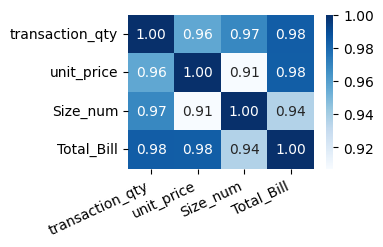

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_geral = agrupados_dia_geral.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_geral, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

#### 3.1.2. Faturamento geral

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_geral = agrupados_dia_geral.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_geral = agrupados_dia_geral.iloc[:, 7]

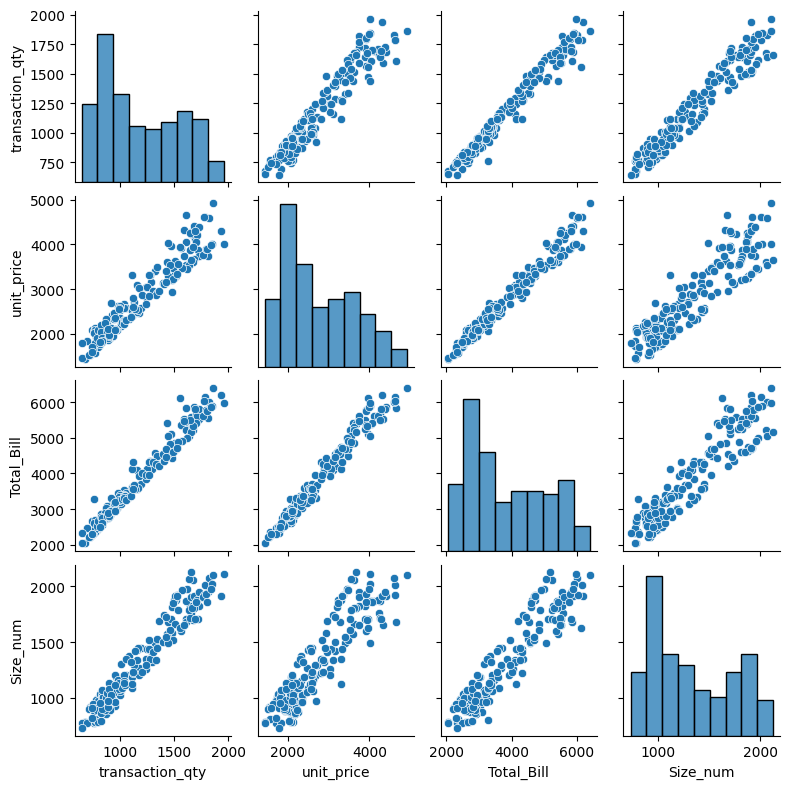

In [ ]:
sns.pairplot(agrupados_dia_geral[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']], height=2)

In [ ]:
# Regressor Sklearn
regressor_faturamento_geral = LinearRegression()

# Constante Statsmodels
X_sm_faturamento_geral = sm.add_constant(X_faturamento_geral)

In [ ]:
# Regressão do modelo no Sklearn
regressor_faturamento_geral.fit(X_faturamento_geral, y_faturamento_geral)

# Regressão do modelo no Statsmodels
resultados_sm_faturamento_geral = sm.OLS(y_faturamento_geral, X_sm_faturamento_geral).fit()

In [ ]:
print(resultados_sm_faturamento_geral.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5990.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.17e-177
Time:                        21:24:35   Log-Likelihood:                -1118.8
No. Observations:                 181   AIC:                             2246.
Df Residuals:                     177   BIC:                             2258.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.6074     30.801     

In [ ]:
# Resultados no Sklearn
print(f'Constante =  {regressor_faturamento_geral.intercept_}')
print(f'Coeficiente X1 (transaction_qty) = {regressor_faturamento_geral.coef_[0]}')
print(f'Coeficiente X2 (unit_price) = {regressor_faturamento_geral.coef_[1]}')
print(f'Coeficiente X3 (Size_num) = {regressor_faturamento_geral.coef_[2]}')
print(f'R2 =  {regressor_faturamento_geral.score(X_faturamento_geral, y_faturamento_geral)}')

Constante =  -11.607407564396453
Coeficiente X1 (transaction_qty) = 2.1669364435069367
Coeficiente X2 (unit_price) = 0.6447039905793103
Coeficiente X3 (Size_num) = -0.3705140900812288
R2 =  0.9902458839534856


In [ ]:
# Equação de regressão linear múltipla - faturamento Geral:
print(f'Equação da regressão linear do faturamento geral da rede: \nX1 = transaction_qty; X2 = unit_price; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'Faturamento  =  {regressor_faturamento_geral.intercept_} + {regressor_faturamento_geral.coef_[0]} * X1  +  {regressor_faturamento_geral.coef_[1]} * X2  {regressor_faturamento_geral.coef_[2]} * X3')

Equação da regressão linear do faturamento geral da rede: 
X1 = transaction_qty; X2 = unit_price; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
Faturamento  =  -11.607407564396453 + 2.1669364435069367 * X1  +  0.6447039905793103 * X2  -0.3705140900812288 * X3


In [ ]:
# Função para predição com a equação da regressão linear
def faturamentoGeral_equacao(quantidade, precoUnitario, tamanhos):
  y  = (regressor_faturamento_geral.intercept_ + regressor_faturamento_geral.coef_[0] * quantidade  +  regressor_faturamento_geral.coef_[1] * precoUnitario +  regressor_faturamento_geral.coef_[2] * tamanhos)
  return print(f'O faturamento previsto com a equação: {y}')

In [ ]:
# Resultado da função
faturamentoGeral_equacao(1300, 3000, 1500)

O faturamento previsto com a equação: 4183.750805610709


In [ ]:
# Função para uso do método predict Sklearn: matriz de ordem 1 / matriz unitária
def faturamentoGeral_sklearn(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[quantidade, precoUnitario, tamanhos]], columns=regressor_faturamento_geral.feature_names_in_)
  y = regressor_faturamento_geral.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Sklearn predict: {y}')

In [ ]:
# Resultado da função
faturamentoGeral_sklearn(1300, 3000, 1500)

O faturamento previsto com o método Sklearn predict: [4183.75080561]


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentoGeral_statsmodels(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario, tamanhos]])
  y = resultados_sm_faturamento_geral.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentoGeral_statsmodels(1300, 3000, 1500)

O faturamento previsto com o método Statsmodels predict: 0    4183.750806
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentoGeral = pd.DataFrame({
    'transaction_qty': [1300, 1400, 1500],
    'unit_price': [3000, 3100, 3200],
    'Size_num': [1500, 1600, 1700]
})
display(print(df_faturamentoGeral))

   transaction_qty  unit_price  Size_num
0             1300        3000      1500
1             1400        3100      1600
2             1500        3200      1700


None

In [ ]:
regressor_faturamento_geral.predict(df_faturamentoGeral)

array([4183.75080561, 4427.86344001, 4671.97607441])

In [ ]:
previsoes_faturamento_geral = regressor_faturamento_geral.predict(X_faturamento_geral)

# Cria um DataFrame com os dados de entrada e as previsões
df_3d = X_faturamento_geral.copy()
df_3d['Total_Bill_real'] = y_faturamento_geral
df_3d['Total_Bill_previsto'] = previsoes_faturamento_geral

# Cria o gráfico 3D com hover mostrando o valor real
grafico_3d = px.scatter_3d(
    df_3d,
    x='transaction_qty',
    y='unit_price',
    z='Size_num',
    color='Total_Bill_previsto',
    hover_data={'Total_Bill_real': True, 'Total_Bill_previsto': True},
    labels={
        'transaction_qty': 'Quantidade',
        'unit_price': 'Preço Unitário',
        'Size_num': 'Tamanho',
        'Total_Bill_previsto': 'Total_Bill (Previsto)'
    },
    title='Predições em 3D'
)

grafico_3d.show()

#### 3.1.3. Quantidade Total

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_geral = agrupados_dia_geral.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_geral = agrupados_dia_geral.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_geral = LinearRegression()

# Constante Statsmodels
X_sm_qtde_geral = sm.add_constant(X_qtde_geral)

In [ ]:
# Regressão do modelo no Sklearn
regressor_qtde_geral.fit(X_qtde_geral, y_qtde_geral)

# Regressão do modelo no Statsmodels
resultados_sm_qtde_geral = sm.OLS(y_qtde_geral, X_sm_qtde_geral).fit()

In [ ]:
print(resultados_sm_qtde_geral.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4666.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          3.62e-168
Time:                        21:24:38   Log-Likelihood:                -924.47
No. Observations:                 181   AIC:                             1857.
Df Residuals:                     177   BIC:                             1870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4910     10.530      0.332      0.7

In [ ]:
# Resultados no Sklearn
print(f'Constante =  {regressor_qtde_geral.intercept_}')
print(f'Coeficiente X1 (unit_price) = {regressor_qtde_geral.coef_[0]}')
print(f'Coeficiente X2 (Total_Bill) = {regressor_qtde_geral.coef_[1]}')
print(f'Coeficiente X3 (Size_num) = {regressor_qtde_geral.coef_[2]}')
print(f'R2 =  {regressor_qtde_geral.score(X_qtde_geral, y_qtde_geral)}')

Constante =  3.4909662752347685
Coeficiente X1 (unit_price) = -0.08108135822963275
Coeficiente X2 (Total_Bill) = 0.2531920374889578
Coeficiente X3 (Size_num) = 0.3239432343638743
R2 =  0.9875140610913283


In [ ]:
# Equação de regressão linear múltipla - Quantidade Geral:
print(f'Equação da regressão linear da quantidade geral da rede: \nX1 = unit_price; X2 = Total_Bill; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'qtde  =  {regressor_qtde_geral.intercept_} {regressor_qtde_geral.coef_[0]} * X1  +  {regressor_qtde_geral.coef_[1]} * X2 +  {regressor_qtde_geral.coef_[2]} * X3')

Equação da regressão linear da quantidade geral da rede: 
X1 = unit_price; X2 = Total_Bill; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
qtde  =  3.4909662752347685 -0.08108135822963275 * X1  +  0.2531920374889578 * X2 +  0.3239432343638743 * X3


In [ ]:
# Função para predição com a equação da regressão linear
def qtdeGeral_equacao(precoUnitario, faturamento, tamanhos):
  y  = (regressor_qtde_geral.intercept_ + regressor_qtde_geral.coef_[0] * precoUnitario  +  regressor_qtde_geral.coef_[1] * faturamento +  regressor_qtde_geral.coef_[2] * tamanhos)
  return print(f'A quantidade prevista com a equação: {y}')

In [ ]:
# Resultado da função
qtdeGeral_equacao(3000, 4000, 1500)

A quantidade prevista com a equação: 1258.929893087979


In [ ]:
# Função para uso do método predict Sklearn: matriz de ordem 1 / matriz unitária
def qtdeGeral_sklearn(precoUnitario, faturamento, tamanhos):
  valores_predicao = pd.DataFrame([[precoUnitario, faturamento, tamanhos]], columns=regressor_qtde_geral.feature_names_in_)
  y = regressor_qtde_geral.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Sklearn predict: {y}')

In [ ]:
# Resultado da função
qtdeGeral_sklearn(3000, 4000, 1500)

A quantidade prevista com o método Sklearn predict: [1258.92989309]


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdeGeral_statsmodels(precoUnitario, faturamento, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento, tamanhos]])
  y = resultados_sm_qtde_geral.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdeGeral_statsmodels(3000, 4000, 1500)

A quantidade prevista com o método Statsmodels predict: 0    1258.929893
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdeGeral = pd.DataFrame({
    'unit_price': [3000, 3100, 3200],
    'Total_Bill': [4000, 4100, 4200],
    'Size_num': [1500, 1600, 1700]
})
display(print(df_qtdeGeral))

   unit_price  Total_Bill  Size_num
0        3000        4000      1500
1        3100        4100      1600
2        3200        4200      1700


None

In [ ]:
regressor_qtde_geral.predict(df_qtdeGeral)

array([1258.92989309, 1308.53528445, 1358.14067581])

### 3.2. Loja Astoria

#### 3.2.1. Estatísticas

In [ ]:
estatisticaDescritivaMulti(agrupados_dia_astoria[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,392.215470,362.00,130.020780,33.150345,6.318291e-07,0.024663,0.000002,1.019331e-05,0.0,-1.0,202.0,688.00,292.00,362.00,492.000
1,unit_price,946.256409,893.75,323.198999,34.155541,2.855607e-06,0.028540,0.002411,5.457852e-16,1.0,-0.0,443.5,1969.03,671.50,893.75,1207.480
2,Total_Bill,1283.115525,1175.08,426.444617,33.235091,3.056860e-06,0.034748,0.001209,1.592620e-11,1.0,-1.0,641.9,2546.43,928.55,1175.08,1634.515
3,Size_num,476.994475,436.00,162.777575,34.125673,8.407887e-06,0.040934,0.000047,1.934940e-06,0.0,-1.0,182.0,862.00,352.50,436.00,596.500


In [ ]:
display(agrupados_dia_astoria[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,277,600.65,868.40,371
2023-01-02,301,661.90,925.50,372
2023-01-03,287,644.80,902.75,397
2023-01-04,262,579.10,808.25,361
2023-01-05,285,630.60,903.05,359


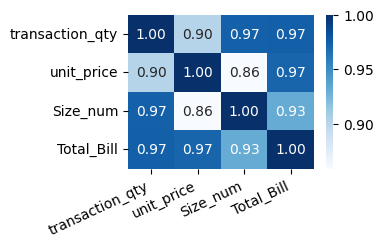

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_astoria= agrupados_dia_astoria.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_astoria, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

#### 3.2.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_astoria = agrupados_dia_astoria.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_astoria = agrupados_dia_astoria.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_astoria = LinearRegression()
regressor_faturamento_astoria.fit(X_faturamento_astoria, y_faturamento_astoria)

# Constante Statsmodels
X_sm_faturamento_astoria = sm.add_constant(X_faturamento_astoria)
resultados_sm_faturamento_astoria = sm.OLS(y_faturamento_astoria, X_sm_faturamento_astoria).fit()

In [ ]:
print(resultados_sm_faturamento_astoria.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.78e-205
Time:                        21:24:38   Log-Likelihood:                -867.84
No. Observations:                 181   AIC:                             1744.
Df Residuals:                     177   BIC:                             1756.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.5789      7.085     

In [ ]:
# Equação de regressão linear múltipla - faturamento da loja Astoria:
print(f'Equação da regressão linear do faturamento da loja Astoria: \nX1 = transaction_qty; X2 = unit_price; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'Faturamento  =  {regressor_faturamento_astoria.intercept_} + {regressor_faturamento_astoria.coef_[0]} * X1  +  {regressor_faturamento_astoria.coef_[1]} * X2 {regressor_faturamento_astoria.coef_[2]} * X3')

Equação da regressão linear do faturamento da loja Astoria: 
X1 = transaction_qty; X2 = unit_price; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
Faturamento  =  -12.578856670350888 + 2.196379106178594 * X1  +  0.6402805606874614 * X2 -0.3598135282441136 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentoAstoria_statsmodels(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario, tamanhos]], columns=X_sm_faturamento_geral.columns)
  y = resultados_sm_faturamento_astoria.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentoAstoria_statsmodels(500, 1100, 500)

O faturamento previsto com o método Statsmodels predict: 0    1610.012549
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentoAstoria = pd.DataFrame({
    'transaction_qty': [500, 600, 700],
    'unit_price': [1100, 1200, 1300],
    'Size_num': [500, 600, 700]
})
display(print(df_faturamentoAstoria))

   transaction_qty  unit_price  Size_num
0              500        1100       500
1              600        1200       600
2              700        1300       700


None

In [ ]:
regressor_faturamento_astoria.predict(df_faturamentoAstoria)

array([1610.01254905, 1857.69716292, 2105.38177678])

#### 3.2.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_astoria = agrupados_dia_astoria.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_astoria = agrupados_dia_astoria.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_astoria = LinearRegression()
regressor_qtde_astoria.fit(X_qtde_astoria, y_qtde_astoria)

# Constante Statsmodels
X_sm_qtde_astoria = sm.add_constant(X_qtde_astoria)
resultados_sm_qtde_astoria = sm.OLS(y_qtde_astoria, X_sm_qtde_astoria).fit()

In [ ]:
print(resultados_sm_qtde_astoria.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7164.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.78e-184
Time:                        21:24:39   Log-Likelihood:                -702.31
No. Observations:                 181   AIC:                             1413.
Df Residuals:                     177   BIC:                             1425.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2331      2.826      2.206      0.0

In [ ]:
# Equação de regressão linear múltipla - Quantidades da loja Astoria:
print(f'Equação da regressão linear das quantidades da loja Astoria: \nX1 = unit_price; X2 = Total_Bill; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'qtde  =  {regressor_qtde_astoria.intercept_} {regressor_qtde_astoria.coef_[0]} * X1  +  {regressor_qtde_astoria.coef_[1]} * X2 +  {regressor_qtde_astoria.coef_[2]} * X3')

Equação da regressão linear das quantidades da loja Astoria: 
X1 = unit_price; X2 = Total_Bill; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
qtde  =  6.233056736527203 -0.2030371984103327 * X1  +  0.3526369545306098 * X2 +  0.26338609492440446 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdeAstoria_statsmodels(precoUnitario, faturamento, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento, tamanhos]])
  y = resultados_sm_qtde_astoria.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdeAstoria_statsmodels(1100, 1400, 500)

A quantidade prevista com o método Statsmodels predict: 0    408.276922
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdeAstoria = pd.DataFrame({
    'unit_price': [1100, 1200, 1300],
    'Total_Bill': [1400, 1500, 1600],
    'Size_num': [500, 600, 700]
})
display(print(df_qtdeAstoria))

   unit_price  Total_Bill  Size_num
0        1100        1400       500
1        1200        1500       600
2        1300        1600       700


None

In [ ]:
regressor_qtde_astoria.predict(df_qtdeAstoria)

array([408.27692229, 449.57550739, 490.8740925 ])

### 3.3. Loja Lower Manhattan

#### 3.3.1. Estatísticas

In [ ]:
estatisticaDescritivaMulti(agrupados_dia_lower[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,396.364641,367.00,132.564490,33.445085,2.794760e-06,0.047506,1.356434e-03,1.175812e-10,1.0,-1.0,196.00,770.00,285.000,367.00,502.000
1,unit_price,888.756630,835.40,285.059360,32.073950,1.406222e-06,0.004740,8.279497e-06,3.489230e-09,0.0,-1.0,426.85,1563.18,649.375,835.40,1118.535
2,Total_Bill,1271.034530,1150.05,425.637615,33.487494,2.634924e-06,0.003597,8.705493e-04,6.361768e-13,1.0,-1.0,604.20,2437.40,933.725,1150.05,1598.575
3,Size_num,405.790055,379.00,127.316404,31.374944,1.494416e-07,0.006298,7.385749e-16,2.243435e-05,0.0,-1.0,187.00,658.00,301.500,379.00,533.500


In [ ]:
display(agrupados_dia_lower[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,255,546.50,788.35,284
2023-01-02,217,483.00,649.05,258
2023-01-03,241,525.35,756.00,281
2023-01-04,208,428.90,630.20,253
2023-01-05,258,566.55,800.90,319


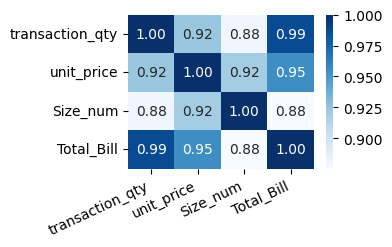

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_lower= agrupados_dia_lower.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_lower, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

#### 3.3.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_lower = agrupados_dia_lower.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_lower = agrupados_dia_lower.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_lower = LinearRegression()
regressor_faturamento_lower.fit(X_faturamento_lower, y_faturamento_lower)

# Constante Statsmodels
X_sm_faturamento_lower = sm.add_constant(X_faturamento_lower)
resultados_sm_faturamento_lower = sm.OLS(y_faturamento_lower, X_sm_faturamento_lower).fit()

In [ ]:
print(resultados_sm_faturamento_lower.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6826.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.24e-182
Time:                        21:24:39   Log-Likelihood:                -921.29
No. Observations:                 181   AIC:                             1851.
Df Residuals:                     177   BIC:                             1863.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6090      9.997     

In [ ]:
# Equação de regressão linear múltipla - faturamento Geral:
print(f'Equação da regressão linear do faturamento da loja Lower Manhattan : \nX1 = transaction_qty; X2 = unit_price; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'Faturamento  =  {regressor_faturamento_lower.intercept_} + {regressor_faturamento_lower.coef_[0]} * X1  +  {regressor_faturamento_lower.coef_[1]} * X2 {regressor_faturamento_lower.coef_[2]} * X3')

Equação da regressão linear do faturamento da loja Lower Manhattan : 
X1 = transaction_qty; X2 = unit_price; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
Faturamento  =  -8.608952778418143 + 2.4123163178330898 * X1  +  0.6192060121549702 * X2 -0.559000531070915 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentolower_statsmodels(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario, tamanhos]], columns=X_sm_faturamento_geral.columns)
  y = resultados_sm_faturamento_lower.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentolower_statsmodels(500, 1000, 500)

O faturamento previsto com o método Statsmodels predict: 0    1537.254953
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentolower = pd.DataFrame({
    'transaction_qty': [500, 600, 700],
    'unit_price': [1000, 1100, 1200],
    'Size_num': [500, 600, 700]
})
display(print(df_faturamentoGeral))

   transaction_qty  unit_price  Size_num
0             1300        3000      1500
1             1400        3100      1600
2             1500        3200      1700


None

In [ ]:
regressor_faturamento_lower.predict(df_faturamentolower)

array([1537.25495276, 1784.50713265, 2031.75931254])

#### 3.3.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_lower = agrupados_dia_lower.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_lower = agrupados_dia_lower.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_lower = LinearRegression()
regressor_qtde_lower.fit(X_qtde_lower, y_qtde_lower)

# Constante Statsmodels
X_sm_qtde_lower = sm.add_constant(X_qtde_lower)
resultados_sm_qtde_lower = sm.OLS(y_qtde_lower, X_sm_qtde_lower).fit()

In [ ]:
print(resultados_sm_qtde_lower.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     4247.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.35e-164
Time:                        21:24:39   Log-Likelihood:                -752.62
No. Observations:                 181   AIC:                             1513.
Df Residuals:                     177   BIC:                             1526.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8246      3.935      0.972      0.3

In [ ]:
# Equação de regressão linear múltipla - Quantidade Loja Lower:
print(f'Equação da regressão linear da Quantidade da loja Lower Manhattan : \X1 = unit_price; X2 = Total_Bill; X3 = Size_num\nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'qtde  =  {regressor_qtde_lower.intercept_} {regressor_qtde_lower.coef_[0]} * X1  +  {regressor_qtde_lower.coef_[1]} * X2 +  {regressor_qtde_lower.coef_[2]} * X3')

Equação da regressão linear da Quantidade da loja Lower Manhattan : \X1 = unit_price; X2 = Total_Bill; X3 = Size_num
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
qtde  =  3.824550841335622 -0.19799946351751865 * X1  +  0.3741343304260567 * X2 +  0.22912284756672474 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdelower_statsmodels(precoUnitario, faturamento, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento, tamanhos]])
  y = resultados_sm_qtde_lower.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdelower_statsmodels(500, 1400, 500)

A quantidade prevista com o método Statsmodels predict: 0    543.174305
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdelower = pd.DataFrame({
    'unit_price': [500, 600, 700],
    'Total_Bill': [1400, 1500, 1600],
    'Size_num': [500, 600, 700]
})
display(print(df_qtdelower))

   unit_price  Total_Bill  Size_num
0         500        1400       500
1         600        1500       600
2         700        1600       700


None

In [ ]:
regressor_qtde_lower.predict(df_qtdelower)

array([543.17430546, 583.70007691, 624.22584836])

### 3.4. Loja Hell's Kitchen

#### 3.4.1. Estatísticas

In [ ]:
estatisticaDescritivaMulti(agrupados_dia_hell[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,396.337017,363.00,129.535462,32.683160,7.216032e-07,0.018246,3.523276e-04,4.616610e-11,1.0,-1.0,195.00,769.00,290.000,363.00,486.500
1,unit_price,951.412541,875.40,328.597670,34.537875,2.088632e-06,0.025605,1.373809e-03,4.961765e-14,1.0,-0.0,424.05,1981.96,684.865,875.40,1165.375
2,Total_Bill,1306.691547,1184.08,441.737839,33.805824,2.295050e-06,0.008848,1.302850e-03,6.307482e-11,1.0,-1.0,612.15,2534.80,926.175,1184.08,1604.900
3,Size_num,444.049724,409.00,141.853965,31.945514,5.108771e-07,0.007684,2.039230e-07,4.334659e-06,0.0,-1.0,192.00,753.00,324.000,409.00,558.000


In [ ]:
display(agrupados_dia_hell[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,270,584.65,851.45,356
2023-01-02,272,599.05,828.80,362
2023-01-03,295,656.45,906.25,372
2023-01-04,256,525.40,781.65,303
2023-01-05,235,518.20,714.90,303


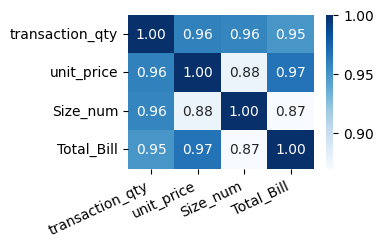

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_hell= agrupados_dia_hell.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_hell, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

#### 3.4.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_hell = agrupados_dia_hell.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_hell = agrupados_dia_hell.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_hell = LinearRegression()
regressor_faturamento_hell.fit(X_faturamento_hell, y_faturamento_hell)

# Constante Statsmodels
X_sm_faturamento_hell = sm.add_constant(X_faturamento_hell)
resultados_sm_faturamento_hell = sm.OLS(y_faturamento_hell, X_sm_faturamento_hell).fit()

In [ ]:
print(resultados_sm_faturamento_hell.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     942.7
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.48e-108
Time:                        21:24:40   Log-Likelihood:                -1102.5
No. Observations:                 181   AIC:                             2213.
Df Residuals:                     177   BIC:                             2226.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              49.3728     26.602     

In [ ]:
# Equação de regressão linear múltipla - faturamento Geral:
print(f'Equação da regressão linear do faturamento da loja Hell"s Kitchen : \nX1 = transaction_qty; X2 = unit_price; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'Faturamento  =  {regressor_faturamento_hell.intercept_} + {regressor_faturamento_hell.coef_[0]} * X1  +  {regressor_faturamento_hell.coef_[1]} * X2 {regressor_faturamento_hell.coef_[2]} * X3')

Equação da regressão linear do faturamento da loja Hell"s Kitchen : 
X1 = transaction_qty; X2 = unit_price; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
Faturamento  =  49.37279578133007 + 1.6987230424136852 * X1  +  0.8400847893053431 * X2 -0.48466481192921357 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentohell_statsmodels(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario, tamanhos]], columns=X_sm_faturamento_geral.columns)
  y = resultados_sm_faturamento_hell.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentohell_statsmodels(500, 1100, 500)

O faturamento previsto com o método Statsmodels predict: 0    1580.495179
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentohell = pd.DataFrame({
    'transaction_qty': [500, 600, 700],
    'unit_price': [1100, 1200, 1300],
    'Size_num': [500, 600, 700]
})
display(print(df_faturamentoGeral))

   transaction_qty  unit_price  Size_num
0             1300        3000      1500
1             1400        3100      1600
2             1500        3200      1700


None

In [ ]:
regressor_faturamento_hell.predict(df_faturamentohell)

array([1580.49517926, 1785.90948124, 1991.32378322])

#### 3.4.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_hell = agrupados_dia_hell.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_hell = agrupados_dia_hell.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_hell = LinearRegression()
regressor_qtde_hell.fit(X_qtde_hell, y_qtde_hell)

# Constante Statsmodels
X_sm_qtde_hell = sm.add_constant(X_qtde_hell)
resultados_sm_qtde_hell = sm.OLS(y_qtde_hell, X_sm_qtde_hell).fit()

In [ ]:
print(resultados_sm_qtde_hell.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2958.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          6.33e-151
Time:                        21:24:40   Log-Likelihood:                -780.63
No. Observations:                 181   AIC:                             1569.
Df Residuals:                     177   BIC:                             1582.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0856      4.528     -0.902      0.3

In [ ]:
# Equação de regressão linear múltipla - Quantidade:
print(f'Equação da regressão linear do Quantidade da loja Hell"s Kitchen : \X1 = unit_price; X2 = Total_Bill; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'qtde  =  {regressor_qtde_hell.intercept_} + {regressor_qtde_hell.coef_[0]} * X1  +  {regressor_qtde_hell.coef_[1]} * X2 +  {regressor_qtde_hell.coef_[2]} * X3')

Equação da regressão linear do Quantidade da loja Hell"s Kitchen : \X1 = unit_price; X2 = Total_Bill; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
qtde  =  -4.085582333691946 + 0.14700147923981693 * X1  +  0.04849706654905517 * X2 +  0.44407828783085823 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdehell_statsmodels(precoUnitario, faturamento, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento, tamanhos]])
  y = resultados_sm_qtde_hell.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdehell_statsmodels(1100, 1400, 500)

A quantidade prevista com o método Statsmodels predict: 0    447.551082
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdehell = pd.DataFrame({
    'unit_price': [1100, 1200, 1300],
    'Total_Bill': [1400, 1500, 1600],
    'Size_num': [500, 600, 700]
})
display(print(df_qtdeGeral))

   unit_price  Total_Bill  Size_num
0        3000        4000      1500
1        3100        4100      1600
2        3200        4200      1700


None

In [ ]:
regressor_qtde_hell.predict(df_qtdehell)

array([447.55108191, 511.50876528, 575.46644864])

### 3.5. Categorias da rede

#### Matriz de dispersão - classes categorias

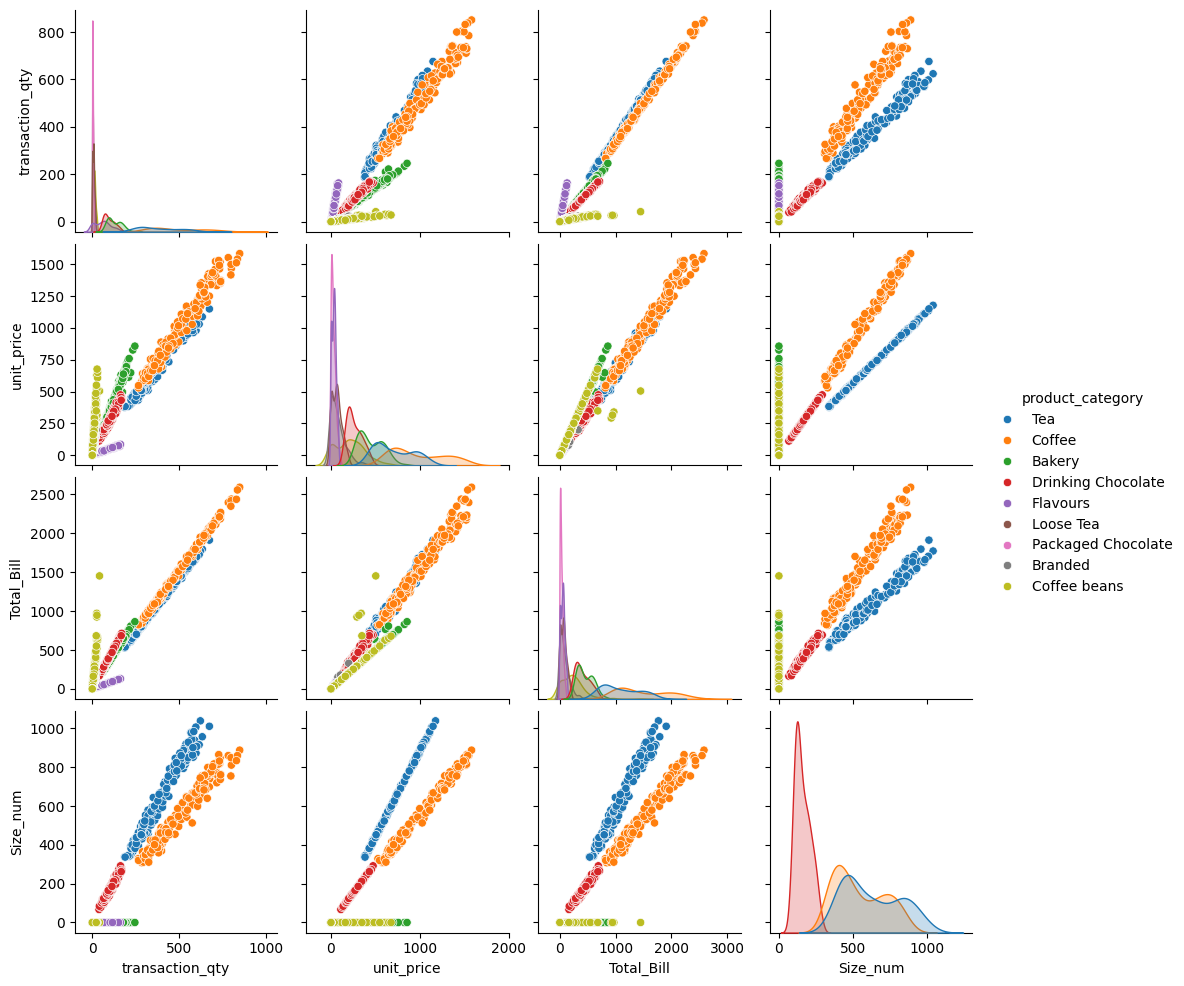

In [ ]:
sns.pairplot(dados_agrupados_categorias[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num', 'product_category']], hue='product_category')
plt.show()

#### 3.5.1. Tea

##### 3.5.1.1. Estatísticas

In [ ]:
estatisticaDescritivaMulti(agrupados_dia_tea[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,385.287293,361.0,119.600935,31.042014,1.027947e-06,0.005245,1.307934e-09,8.572300e-07,0.0,-1.0,187.00,676.0,285.000,361.0,486.50
1,unit_price,707.377624,667.9,215.739344,30.498469,1.469292e-07,0.005029,6.260543e-16,2.438348e-06,0.0,-1.0,376.65,1176.8,516.825,667.9,912.25
2,Total_Bill,1085.115746,1016.9,338.016232,31.150247,1.117856e-06,0.011500,1.783754e-09,1.147450e-06,0.0,-1.0,527.55,1908.4,797.150,1016.9,1376.15
3,Size_num,625.430939,590.0,190.623923,30.478812,1.498656e-07,0.004015,7.742515e-16,1.078745e-05,0.0,-1.0,337.00,1039.0,457.000,590.0,808.50


In [ ]:
display(agrupados_dia_tea[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,286,542.40,811.10,480
2023-01-02,274,529.35,763.85,463
2023-01-03,296,581.80,827.05,514
2023-01-04,266,485.40,751.30,432
2023-01-05,287,533.85,797.95,480


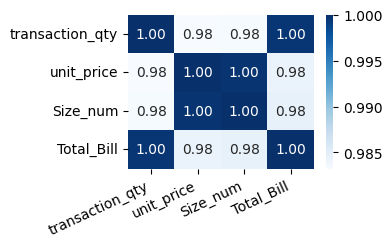

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_tea= agrupados_dia_tea.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_tea, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.1.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_tea = agrupados_dia_tea.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_tea = agrupados_dia_tea.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_tea = LinearRegression()
regressor_faturamento_tea.fit(X_faturamento_tea, y_faturamento_tea)

# Constante Statsmodels
X_sm_faturamento_tea = sm.add_constant(X_faturamento_tea)
resultados_sm_faturamento_tea = sm.OLS(y_faturamento_tea, X_sm_faturamento_tea).fit()

In [ ]:
print(resultados_sm_faturamento_tea.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.315e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          8.93e-283
Time:                        21:24:45   Log-Likelihood:                -643.77
No. Observations:                 181   AIC:                             1296.
Df Residuals:                     177   BIC:                             1308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.1398      2.192     

In [ ]:
# Exclusão dos atributos com p_value maior que 0.05: unit_price e Size_num
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_tea = agrupados_dia_tea.iloc[:, [5]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_tea = agrupados_dia_tea.iloc[:, 7]

In [ ]:
# Novo Regressor Sklearn
regressor_faturamento_tea = LinearRegression()
regressor_faturamento_tea.fit(X_faturamento_tea, y_faturamento_tea)

# Novo Constante Statsmodels
X_sm_faturamento_tea = sm.add_constant(X_faturamento_tea)
resultados_sm_faturamento_tea = sm.OLS(y_faturamento_tea, X_sm_faturamento_tea).fit()
print(resultados_sm_faturamento_tea.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.548e+05
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          3.28e-284
Time:                        21:24:45   Log-Likelihood:                -653.12
No. Observations:                 181   AIC:                             1310.
Df Residuals:                     179   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.4012      2.257     

In [ ]:
# Equação de regressão linear múltipla - faturamento Tea:
print(f'Equação da regressão linear do faturamento Tea: \nX1 = transaction_qty; Y  =  B0 +  B1 * X1')
print(f'Faturamento  =  {regressor_faturamento_tea.intercept_} + {regressor_faturamento_tea.coef_} * X1')

Equação da regressão linear do faturamento Tea: 
X1 = transaction_qty; Y  =  B0 +  B1 * X1
Faturamento  =  -3.401209854835315 + [2.82520855] * X1


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentotea_statsmodels(quantidade):
    valores_predicao = pd.DataFrame([[1.0, quantidade]], columns=['const', 'transaction_qty'])
    y = resultados_sm_faturamento_tea.predict(valores_predicao)
    return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentotea_statsmodels(500)

O faturamento previsto com o método Statsmodels predict: 0    1409.203068
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentotea = pd.DataFrame({
    'transaction_qty': [500, 600, 700]
})
display(print(df_faturamentotea))

   transaction_qty
0              500
1              600
2              700


None

In [ ]:
regressor_faturamento_tea.predict(df_faturamentotea)

array([1409.20306753, 1691.723923  , 1974.24477848])

##### 3.5.1.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_tea = agrupados_dia_tea.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_tea = agrupados_dia_tea.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_tea = LinearRegression()
regressor_qtde_tea.fit(X_qtde_tea, y_qtde_tea)

# Constante Statsmodels
X_sm_qtde_tea = sm.add_constant(X_qtde_tea)
resultados_sm_qtde_tea = sm.OLS(y_qtde_tea, X_sm_qtde_tea).fit()

In [ ]:
print(resultados_sm_qtde_tea.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.687e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          4.28e-280
Time:                        21:24:45   Log-Likelihood:                -462.03
No. Observations:                 181   AIC:                             932.1
Df Residuals:                     177   BIC:                             944.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8515      0.804      2.304      0.0

In [ ]:
# Novo Atributo preditor/ variável independente
# colunas: 7 = Total_Bill -> Exclusão das alteriores por terem p > 0.05
X_qtde_tea = agrupados_dia_tea.iloc[:, [7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_tea = agrupados_dia_tea.iloc[:, 5]

# Regressor Sklearn
regressor_qtde_tea = LinearRegression()
regressor_qtde_tea.fit(X_qtde_tea, y_qtde_tea)

# Constante Statsmodels
X_sm_qtde_tea = sm.add_constant(X_qtde_tea)
resultados_sm_qtde_tea = sm.OLS(y_qtde_tea, X_sm_qtde_tea).fit()
print(resultados_sm_qtde_tea.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.548e+05
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          3.28e-284
Time:                        21:24:45   Log-Likelihood:                -465.07
No. Observations:                 181   AIC:                             934.1
Df Residuals:                     179   BIC:                             940.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4735      0.796      1.851      0.0

In [ ]:
# Equação de regressão linear simples - Quantidade Tea:
print(f'Equação da regressão linear da Quantidade Tea: \nX1 = Total_Bill; Y  =  B0 +  B1 * X1')
print(f'qtde  =  {regressor_qtde_tea.intercept_} + {regressor_qtde_tea.coef_} * X1')

Equação da regressão linear da Quantidade Tea: 
X1 = Total_Bill; Y  =  B0 +  B1 * X1
qtde  =  1.473465272793817 + [0.35370773] * X1


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdetea_statsmodels(faturamento):
  valores_predicao = pd.DataFrame([[1.0, faturamento]])
  y = resultados_sm_qtde_tea.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdetea_statsmodels(1200)

A quantidade prevista com o método Statsmodels predict: 0    425.922742
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdetea = pd.DataFrame({
    'Total_Bill': [1200, 1300, 1400, 1500]
})
display(print(df_qtdetea))

   Total_Bill
0        1200
1        1300
2        1400
3        1500


None

In [ ]:
regressor_qtde_tea.predict(df_qtdetea)

array([425.92274159, 461.29351462, 496.66428765, 532.03506067])

#### 3.5.2. Coffee

##### 3.5.2.1. Estatísticas

In [ ]:
estatisticaDescritivaMulti(agrupados_dia_coffee[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,493.093923,453.00,153.649988,31.160390,7.588424e-08,0.002356,1.353562e-09,1.463755e-07,0.0,-1.0,267.00,851.00,361.00,453.00,631.000
1,unit_price,975.852486,887.75,297.941284,30.531385,1.452163e-08,0.004240,1.096650e-18,2.371679e-04,0.0,-1.0,529.00,1582.50,710.65,887.75,1247.675
2,Total_Bill,1491.450000,1369.00,462.992735,31.043128,7.141006e-08,0.001127,1.819213e-10,2.647096e-07,0.0,-1.0,816.65,2586.85,1092.45,1369.00,1917.475
3,Size_num,541.591160,489.00,166.143174,30.676862,2.256690e-08,0.003037,1.156326e-17,1.241501e-04,0.0,-1.0,308.00,888.00,394.50,489.00,691.000


In [ ]:
display(agrupados_dia_coffee[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,375,743.40,1160.10,409
2023-01-02,376,746.85,1109.25,434
2023-01-03,365,728.55,1105.45,396
2023-01-04,337,654.25,995.80,375
2023-01-05,346,722.25,1063.15,380


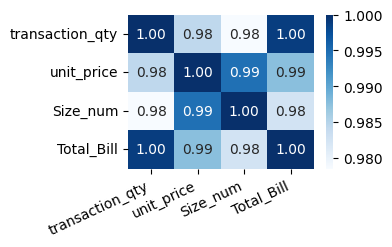

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_coffee= agrupados_dia_coffee.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_coffee, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.2.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_coffee = agrupados_dia_coffee.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_coffee = agrupados_dia_coffee.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_coffee = LinearRegression()
regressor_faturamento_coffee.fit(X_faturamento_coffee, y_faturamento_coffee)

# Constante Statsmodels
X_sm_faturamento_coffee = sm.add_constant(X_faturamento_coffee)
resultados_sm_faturamento_coffee = sm.OLS(y_faturamento_coffee, X_sm_faturamento_coffee).fit()

In [ ]:
print(resultados_sm_faturamento_coffee.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.541e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.22e-245
Time:                        21:24:46   Log-Likelihood:                -788.15
No. Observations:                 181   AIC:                             1584.
Df Residuals:                     177   BIC:                             1597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4066      4.861     

In [ ]:
# Equação de regressão linear múltipla - faturamento Coffee:
print(f'Equação da regressão linear do faturamento Coffee: \nX1 = transaction_qty; X2 = unit_price; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'Faturamento  =  {regressor_faturamento_coffee.intercept_} + {regressor_faturamento_coffee.coef_[0]} * X1  +  {regressor_faturamento_coffee.coef_[1]} * X2 +  {regressor_faturamento_coffee.coef_[2]} * X3')

Equação da regressão linear do faturamento Coffee: 
X1 = transaction_qty; X2 = unit_price; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
Faturamento  =  -0.4065911834416056 + 2.5891968382668193 * X1  +  0.12212124135297034 * X2 +  0.17719463636494778 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentocoffee_statsmodels(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario, tamanhos]], columns=X_sm_faturamento_geral.columns)
  y = resultados_sm_faturamento_coffee.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentocoffee_statsmodels(600, 1100, 700)

O faturamento previsto com o método Statsmodels predict: 0    1811.481123
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentocoffee = pd.DataFrame({
    'transaction_qty': [600, 700, 800, 900],
    'unit_price': [1100, 1200, 1300, 1400],
    'Size_num': [700, 800, 900, 1000]
})
display(print(df_faturamentocoffee))

   transaction_qty  unit_price  Size_num
0              600        1100       700
1              700        1200       800
2              800        1300       900
3              900        1400      1000


None

In [ ]:
regressor_faturamento_coffee.predict(df_faturamentocoffee)

array([1811.48112272, 2100.33239432, 2389.18366592, 2678.03493752])

##### 3.5.2.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_coffee = agrupados_dia_coffee.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_coffee = agrupados_dia_coffee.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_coffee = LinearRegression()
regressor_qtde_coffee.fit(X_qtde_coffee, y_qtde_coffee)

# Constante Statsmodels
X_sm_qtde_coffee = sm.add_constant(X_qtde_coffee)
resultados_sm_qtde_coffee = sm.OLS(y_qtde_coffee, X_sm_qtde_coffee).fit()

In [ ]:
print(resultados_sm_qtde_coffee.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.802e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.15e-236
Time:                        21:24:46   Log-Likelihood:                -609.63
No. Observations:                 181   AIC:                             1227.
Df Residuals:                     177   BIC:                             1240.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      1.813     -0.003      0.9

In [ ]:
# Novos atributos preditores/ variáveis independentes
# colunas: 7 = Total_Bill, 19 = Size_num -> Exclusão da variável unit_price por ser p > 0.05
X_qtde_coffee = agrupados_dia_coffee.iloc[:, [7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_coffee = agrupados_dia_coffee.iloc[:, 5]

# Regressor Sklearn
regressor_qtde_coffee = LinearRegression()
regressor_qtde_coffee.fit(X_qtde_coffee, y_qtde_coffee)

# Constante Statsmodels
X_sm_qtde_coffee = sm.add_constant(X_qtde_coffee)
resultados_sm_qtde_coffee = sm.OLS(y_qtde_coffee, X_sm_qtde_coffee).fit()

print(resultados_sm_qtde_coffee.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.224e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          5.31e-239
Time:                        21:24:46   Log-Likelihood:                -609.71
No. Observations:                 181   AIC:                             1225.
Df Residuals:                     178   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0686      1.801     -0.038      0.9

In [ ]:
# Equação de regressão linear múltipla - Quantidade Coffee:
print(f'Equação da regressão linear da Quantidade Coffee: \nX1 = Total_Bill; X2 = Size_num\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_coffee.intercept_} + {regressor_qtde_coffee.coef_[0]} * X1 {regressor_qtde_coffee.coef_[1]} * X2')

Equação da regressão linear da Quantidade Coffee: 
X1 = Total_Bill; X2 = Size_num
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  -0.06859822218143563 + 0.35865432641662154 * X1 -0.0770922373306796 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdecoffee_statsmodels(faturamento, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, faturamento, tamanhos]])
  y = resultados_sm_qtde_coffee.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdecoffee_statsmodels(1600, 700)

A quantidade prevista com o método Statsmodels predict: 0    519.813758
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdecoffee = pd.DataFrame({
    'Total_Bill': [1600, 1700, 1800],
    'Size_num': [700, 800, 900]
})
display(print(df_qtdecoffee))

   Total_Bill  Size_num
0        1600       700
1        1700       800
2        1800       900


None

In [ ]:
regressor_qtde_coffee.predict(df_qtdecoffee)

array([519.81375791, 547.96996682, 576.12617573])

#### 3.5.3. Bakery

##### 3.5.3.1. Estatísticas

In [ ]:
display(agrupados_dia_bakery[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,68,241.50,241.50,0
2023-01-02,87,309.75,309.75,0
2023-01-03,81,288.75,288.75,0
2023-01-04,61,214.50,214.50,0
2023-01-05,73,259.25,259.25,0


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_bakery[['transaction_qty', 'unit_price', 'Total_Bill']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,128.254144,117.00,40.153200,31.307527,0.000006,0.011190,0.001482,6.012257e-14,0.0,-1.0,61.0,246.00,94.000,117.00,158.500
1,unit_price,447.315691,414.75,139.476521,31.180780,0.000005,0.019363,0.001171,2.156763e-13,0.0,-1.0,214.5,856.45,322.925,414.75,558.885
2,Total_Bill,454.782541,419.25,143.087220,31.462778,0.000006,0.009724,0.001359,2.407078e-12,0.0,-1.0,214.5,861.75,328.300,419.25,562.340


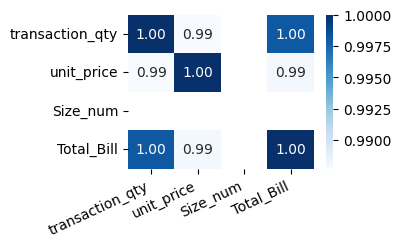

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_bakery= agrupados_dia_bakery.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_bakery, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.3.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price
# o atributo 'Size_num', coluna 19, não foi usado por ser todos tamanho não definido com somatória 0.
X_faturamento_bakery = agrupados_dia_bakery.iloc[:, [5,6]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_bakery = agrupados_dia_bakery.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_bakery = LinearRegression()
regressor_faturamento_bakery.fit(X_faturamento_bakery, y_faturamento_bakery)

# Constante Statsmodels
X_sm_faturamento_bakery = sm.add_constant(X_faturamento_bakery)
resultados_sm_faturamento_bakery = sm.OLS(y_faturamento_bakery, X_sm_faturamento_bakery).fit()

In [ ]:
print(resultados_sm_faturamento_bakery.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.75e-217
Time:                        21:24:46   Log-Likelihood:                -647.66
No. Observations:                 181   AIC:                             1301.
Df Residuals:                     178   BIC:                             1311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0502      2.190     

In [ ]:
# Equação de regressão linear múltipla - faturamento coffee:
print(f'Equação da regressão linear do faturamento coffee: \nX1 = transaction_qty; X2 = unit_price;\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'Faturamento  =  {regressor_faturamento_bakery.intercept_} + {regressor_faturamento_bakery.coef_[0]} * X1  +  {regressor_faturamento_bakery.coef_[1]} * X2')

Equação da regressão linear do faturamento coffee: 
X1 = transaction_qty; X2 = unit_price;
Y  =  B0 +  B1 * X1  +  B2 * X2
Faturamento  =  -2.0502338772369058 + 3.2342364258900522 * X1  +  0.09395724997719003 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentobakery_statsmodels(quantidade, precoUnitario):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario]])
  y = resultados_sm_faturamento_bakery.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentobakery_statsmodels(1400, 600)

O faturamento previsto com o método Statsmodels predict: 0    4582.255112
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentobakery = pd.DataFrame({
    'transaction_qty': [1400, 1500, 1600],
    'unit_price': [600, 700, 800]
})
display(print(df_faturamentobakery))

   transaction_qty  unit_price
0             1400         600
1             1500         700
2             1600         800


None

In [ ]:
regressor_faturamento_bakery.predict(df_faturamentobakery)

array([4582.25511236, 4915.07447994, 5247.89384753])

##### 3.5.3.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_bakery = agrupados_dia_bakery.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_bakery = agrupados_dia_bakery.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_bakery = LinearRegression()
regressor_qtde_bakery.fit(X_qtde_bakery, y_qtde_bakery)

# Constante Statsmodels
X_sm_qtde_bakery = sm.add_constant(X_qtde_bakery)
resultados_sm_qtde_bakery = sm.OLS(y_qtde_bakery, X_sm_qtde_bakery).fit()

In [ ]:
print(resultados_sm_qtde_bakery.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.343e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.76e-216
Time:                        21:24:46   Log-Likelihood:                -420.00
No. Observations:                 181   AIC:                             846.0
Df Residuals:                     178   BIC:                             855.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7004      0.622      1.126      0.2

In [ ]:
# Equação de regressão linear múltipla da quantidade bakery:
print(f'Equação da regressão linear do qtde coffee: \nX1 = unit_price; X2 = Total_Bill \nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_bakery.intercept_} + {regressor_qtde_bakery.coef_[0]} * X1  +  {regressor_qtde_bakery.coef_[1]} * X2')

Equação da regressão linear do qtde coffee: 
X1 = unit_price; X2 = Total_Bill 
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  0.7004271319774915 + 0.019416094831791693 * X1  +  0.2613745731539913 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdebakery_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]])
  y = resultados_sm_qtde_bakery.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdebakery_statsmodels(600, 600)

A quantidade prevista com o método Statsmodels predict: 0    169.174828
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdebakery = pd.DataFrame({
    'unit_price': [600, 700, 800, 900],
    'Total_Bill': [600, 700, 800, 900]
})
display(print(df_qtdebakery))

   unit_price  Total_Bill
0         600         600
1         700         700
2         800         800
3         900         900


None

In [ ]:
regressor_qtde_bakery.predict(df_qtdebakery)

array([169.17482792, 197.25389472, 225.33296152, 253.41202832])

#### 3.5.4. Drinking Chocolate

##### 3.5.4.1. Estatísticas

In [ ]:
display(agrupados_dia_drinkingChocolate[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-01,73,204.50,295.50,122
2023-01-02,53,158.00,220.50,95
2023-01-03,81,227.50,343.75,140
2023-01-04,62,179.25,258.50,110
2023-01-05,72,200.00,298.50,121


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_drinkingChocolate[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,96.447514,90.00,31.574141,32.737123,0.000010,0.042951,0.000347,3.252709e-06,1.0,-1.0,39.0,170.00,71.500,90.00,121.000
1,unit_price,262.866022,242.75,84.199554,32.031357,0.000009,0.022312,0.000608,7.160668e-08,1.0,-1.0,111.5,474.00,196.625,242.75,327.750
2,Total_Bill,400.088398,373.75,131.530506,32.875361,0.000013,0.060752,0.000477,1.447959e-06,1.0,-1.0,163.5,712.25,294.000,373.75,503.875
3,Size_num,159.812155,149.00,51.365337,32.141070,0.000012,0.033347,0.000846,1.329066e-08,1.0,-1.0,67.0,292.00,119.500,149.00,198.500


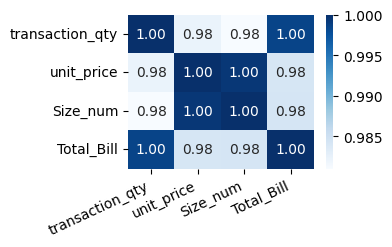

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_drinkingChocolate= agrupados_dia_drinkingChocolate.iloc[:, [5,6,19,7]].corr()
sns.heatmap(corr_faturamento_drinkingChocolate, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.4.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
X_faturamento_drinkingChocolate = agrupados_dia_drinkingChocolate.iloc[:, [5,6,19]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_drinkingChocolate = agrupados_dia_drinkingChocolate.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_drinkingChocolate = LinearRegression()
regressor_faturamento_drinkingChocolate.fit(X_faturamento_drinkingChocolate, y_faturamento_drinkingChocolate)

# Constante Statsmodels
X_sm_faturamento_drinkingChocolate = sm.add_constant(X_faturamento_drinkingChocolate)
resultados_sm_faturamento_drinkingChocolate = sm.OLS(y_faturamento_drinkingChocolate, X_sm_faturamento_drinkingChocolate).fit()

In [ ]:
print(resultados_sm_faturamento_drinkingChocolate.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.090e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.87e-266
Time:                        21:24:47   Log-Likelihood:                -511.36
No. Observations:                 181   AIC:                             1031.
Df Residuals:                     177   BIC:                             1044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1989      1.012     

In [ ]:
# Equação de regressão linear múltipla - faturamento Drinking Chocolate:
print(f'Equação da regressão linear do faturamento Drinking Chocolate: \nX1 = transaction_qty; X2 = unit_price; X3 = Size_num \nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'Faturamento  =  {regressor_faturamento_drinkingChocolate.intercept_} + {regressor_faturamento_drinkingChocolate.coef_[0]} * X1 {regressor_faturamento_drinkingChocolate.coef_[1]} * X2 +  {regressor_faturamento_drinkingChocolate.coef_[2]} * X3')

Equação da regressão linear do faturamento Drinking Chocolate: 
X1 = transaction_qty; X2 = unit_price; X3 = Size_num 
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
Faturamento  =  -1.1988555097432254 + 3.8685497354562037 * X1 -1.744927475860393 * X2 +  3.046435326609183 * X3


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentodrinkingChocolate_statsmodels(quantidade, precoUnitario, tamanhos):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario, tamanhos]], columns=X_sm_faturamento_geral.columns)
  y = resultados_sm_faturamento_drinkingChocolate.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentodrinkingChocolate_statsmodels(200, 300, 300)

O faturamento previsto com o método Statsmodels predict: 0    1162.963447
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentodrinkingChocolate = pd.DataFrame({
    'transaction_qty': [200, 300, 400],
    'unit_price': [300, 400, 500],
    'Size_num': [300, 400, 500]
})
display(print(df_faturamentodrinkingChocolate))

   transaction_qty  unit_price  Size_num
0              200         300       300
1              300         400       400
2              400         500       500


None

In [ ]:
regressor_faturamento_drinkingChocolate.predict(df_faturamentodrinkingChocolate)

array([1162.96344681, 1679.96920543, 2196.97496405])

##### 3.5.4.3. Quantidade -> Regressões com resultados negativos e colinearidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill, 19 = Size_num
X_qtde_drinkingChocolate = agrupados_dia_drinkingChocolate.iloc[:, [6,7,19]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_drinkingChocolate = agrupados_dia_drinkingChocolate.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_drinkingChocolate = LinearRegression()
regressor_qtde_drinkingChocolate.fit(X_qtde_drinkingChocolate, y_qtde_drinkingChocolate)

# Constante Statsmodels
X_sm_qtde_drinkingChocolate = sm.add_constant(X_qtde_drinkingChocolate)
resultados_sm_qtde_drinkingChocolate = sm.OLS(y_qtde_drinkingChocolate, X_sm_qtde_drinkingChocolate).fit()

In [ ]:
print(resultados_sm_qtde_drinkingChocolate.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.421e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          5.49e-262
Time:                        21:24:47   Log-Likelihood:                -263.61
No. Observations:                 181   AIC:                             535.2
Df Residuals:                     177   BIC:                             548.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2831      0.258      1.099      0.2

In [ ]:
# Equação de regressão linear múltipla - quantidade Drinking Chocolate:
print(f'Equação da regressão linear da quantidade Drinking Chocolate:: \nX1 = unit_price; X2 = Total_Bill; X3 = Size_num\nY  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3')
print(f'qtde  =  {regressor_qtde_drinkingChocolate.intercept_} + {regressor_qtde_drinkingChocolate.coef_[0]} * X1  +  {regressor_qtde_drinkingChocolate.coef_[1]} * X2 {regressor_qtde_drinkingChocolate.coef_[2]} * X3')

Equação da regressão linear da quantidade Drinking Chocolate:: 
X1 = unit_price; X2 = Total_Bill; X3 = Size_num
Y  =  B0 +  B1 * X1  +  B2 * X2  + B3 * X3
qtde  =  0.28312413676664505 + 0.45549661518700446 * X1  +  0.2504037508226875 * X2 -0.774370568628887 * X3


In [ ]:
# Existência de colinearidade extrema na regressão
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_verificacao = agrupados_dia_drinkingChocolate.iloc[:, [6,7,19]]
X_verificacao.columns = ['unit_price', 'Total_Bill', 'Size_num']
vif = pd.DataFrame()
vif['variável'] = X_verificacao.columns
vif['VIF'] = [variance_inflation_factor(X_verificacao.values, i) for i in range(X_verificacao.shape[1])]
print(vif)

     variável          VIF
0  unit_price  9384.875941
1  Total_Bill   332.596423
2    Size_num  9494.738419


In [ ]:
# Novos atributos preditores/ variáveis independentes -> Exclusão da variável Size_num
# colunas: 6 = unit_price, 7 = Total_Bill
X_qtde_drinkingChocolate = agrupados_dia_drinkingChocolate.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_drinkingChocolate = agrupados_dia_drinkingChocolate.iloc[:, 5]

# Regressor Sklearn
regressor_qtde_drinkingChocolate = LinearRegression()
regressor_qtde_drinkingChocolate.fit(X_qtde_drinkingChocolate, y_qtde_drinkingChocolate)

# Constante Statsmodels
X_sm_qtde_drinkingChocolate = sm.add_constant(X_qtde_drinkingChocolate)
resultados_sm_qtde_drinkingChocolate = sm.OLS(y_qtde_drinkingChocolate, X_sm_qtde_drinkingChocolate).fit()
print(resultados_sm_qtde_drinkingChocolate.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.091e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          5.90e-227
Time:                        21:24:47   Log-Likelihood:                -351.51
No. Observations:                 181   AIC:                             709.0
Df Residuals:                     178   BIC:                             718.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6080      0.416      1.461      0.1

In [ ]:
# Equação de regressão linear múltipla - quantidade Drinking Chocolate:
print(f'Equação da regressão linear da quantidade Drinking Chocolate: \nX1 = unit_price; X2 = Total_Bill \nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_drinkingChocolate.intercept_} {regressor_qtde_drinkingChocolate.coef_[0]} * X1  +  {regressor_qtde_drinkingChocolate.coef_[1]} * X2')

Equação da regressão linear da quantidade Drinking Chocolate: 
X1 = unit_price; X2 = Total_Bill 
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  0.6079629483109841 -0.0059304609508946315 * X1  +  0.24344236943939307 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdedrinkingChocolate_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]], columns=['const', 'unit_price', 'Total_Bill'])
  y = resultados_sm_qtde_drinkingChocolate.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdedrinkingChocolate_statsmodels(200, 500)

A quantidade prevista com o método Statsmodels predict: 0    121.143055
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdedrinkingChocolate = pd.DataFrame({
    'unit_price': [200, 300, 400],
    'Total_Bill': [500, 600, 700]
    })
display(print(df_qtdedrinkingChocolate))

   unit_price  Total_Bill
0         200         500
1         300         600
2         400         700


None

In [ ]:
regressor_qtde_drinkingChocolate.predict(df_qtdedrinkingChocolate)

array([121.14305548, 144.89424633, 168.64543718])

#### 3.5.5. Flavours

##### 3.5.5.1. Estatísticas

In [ ]:
display(agrupados_dia_flavours[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-07,39,20.8,31.2,0
2023-01-08,56,23.2,44.8,0
2023-01-09,19,10.4,15.2,0
2023-01-10,75,38.4,60.0,0
2023-01-11,70,33.6,56.0,0


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_flavours[['transaction_qty', 'unit_price', 'Total_Bill']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,60.062857,60.0,45.866392,76.363986,6.043592e-07,0.002043,0.000669,1.725965e-14,0.0,-1.0,0.0,163.0,22.0,60.0,89.0
1,unit_price,31.040000,31.2,23.555110,75.886309,5.880455e-07,0.001780,0.000294,3.267173e-15,0.0,-1.0,0.0,85.6,13.6,31.2,48.0
2,Total_Bill,48.050286,48.0,36.693114,76.363986,6.043592e-07,0.002043,0.000669,1.725965e-14,0.0,-1.0,0.0,130.4,17.6,48.0,71.2


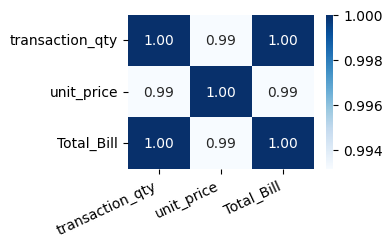

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_flavours= agrupados_dia_flavours.iloc[:, [5,6,7]].corr()
sns.heatmap(corr_faturamento_flavours, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.5.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
# Exlusão do atributo Size_num, por ser igual a 0
X_faturamento_flavours = agrupados_dia_flavours.iloc[:, [5,6]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_flavours = agrupados_dia_flavours.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_flavours = LinearRegression()
regressor_faturamento_flavours.fit(X_faturamento_flavours, y_faturamento_flavours)

# Constante Statsmodels
X_sm_faturamento_flavours = sm.add_constant(X_faturamento_flavours)
resultados_sm_faturamento_flavours = sm.OLS(y_faturamento_flavours, X_sm_faturamento_flavours).fit()

In [ ]:
print(resultados_sm_faturamento_flavours.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.060e+32
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:24:47   Log-Likelihood:                 5336.9
No. Observations:                 175   AIC:                        -1.067e+04
Df Residuals:                     172   BIC:                        -1.066e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.937e-14   1.74e-15    -

In [ ]:
# Excluir da variável X, o atributo unit_price por causa do p_value ser maior que 0,05
# Regressão Linear Simples
# Atributo preditor/ variável independente # colunas: 5 = transaction_qty
X_faturamento_flavours = agrupados_dia_flavours.iloc[:, [5]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_flavours = agrupados_dia_flavours.iloc[:, 7]

In [ ]:
# Novo Regressor Sklearn
regressor_faturamento_flavours = LinearRegression()
regressor_faturamento_flavours.fit(X_faturamento_flavours, y_faturamento_flavours)

# Nova Constante Statsmodels
X_sm_faturamento_flavours = sm.add_constant(X_faturamento_flavours)
resultados_sm_faturamento_flavours = sm.OLS(y_faturamento_flavours, X_sm_faturamento_flavours).fit()
print(resultados_sm_faturamento_flavours.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.286e+32
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:24:47   Log-Likelihood:                 5222.2
No. Observations:                 175   AIC:                        -1.044e+04
Df Residuals:                     173   BIC:                        -1.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.548e-15   3.33e-15     

In [ ]:
# Equação de regressão linear simples - faturamento Flavours:
print(f'Equação da regressão linear simples do faturamento Flavours: \nX1 = transaction_qty \nY  =  B0 +  B1 * X1')
print(f'Faturamento  =  {regressor_faturamento_flavours.intercept_} + {regressor_faturamento_flavours.coef_[0]} * X1')

Equação da regressão linear simples do faturamento Flavours: 
X1 = transaction_qty 
Y  =  B0 +  B1 * X1
Faturamento  =  1.4210854715202004e-14 + 0.7999999999999999 * X1


In [ ]:
Faturamento_x  =  1.4210854715202004e-14 + 0.7999999999999999 * 60

Faturamento_x

48.00000000000001

In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentoflavours_statsmodels(quantidade):
  valores_predicao = pd.DataFrame([[1.0, quantidade]])
  y = resultados_sm_faturamento_flavours.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentoflavours_statsmodels(60)

O faturamento previsto com o método Statsmodels predict: 0    48.0
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentoflavours = pd.DataFrame({
    'transaction_qty': [60, 70, 80, 90]
})
display(print(df_faturamentoflavours))

   transaction_qty
0               60
1               70
2               80
3               90


None

In [ ]:
regressor_faturamento_flavours.predict(df_faturamentoflavours)

array([48., 56., 64., 72.])

##### 3.5.5.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill
X_qtde_flavours = agrupados_dia_flavours.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_flavours = agrupados_dia_flavours.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_flavours = LinearRegression()
regressor_qtde_flavours.fit(X_qtde_flavours, y_qtde_flavours)

# Constante Statsmodels
X_sm_qtde_flavours = sm.add_constant(X_qtde_flavours)
resultados_sm_qtde_flavours = sm.OLS(y_qtde_flavours, X_sm_qtde_flavours).fit()

print(resultados_sm_qtde_flavours.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.519e+32
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:24:47   Log-Likelihood:                 5337.3
No. Observations:                 175   AIC:                        -1.067e+04
Df Residuals:                     172   BIC:                        -1.066e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.886e-15   1.74e-15      2.237      0.0

In [ ]:
# Equação de regressão linear simples - qtde Flavours:
print(f'Equação da regressão linear simples do qtde Flavours: \nX1 = unit_price; X2 = Total_Bill \nY  =  B0 +  B1 * X1 +  B2 * X2')
print(f'qtde  =  {regressor_qtde_flavours.intercept_} {regressor_qtde_flavours.coef_[0]} * X1 + {regressor_qtde_flavours.coef_[1]} * X2')

Equação da regressão linear simples do qtde Flavours: 
X1 = unit_price; X2 = Total_Bill 
Y  =  B0 +  B1 * X1 +  B2 * X2
qtde  =  2.1316282072803006e-14 -1.2454930264846941e-15 * X1 + 1.2500000000000004 * X2


In [ ]:
qtde_1  =  2.1316282072803006e-14 -1.2454930264846941e-15 * 50 + 1.2500000000000004 * 60

qtde_1

74.99999999999999

In [ ]:
# Função para uso do método predict Statsmodels:
def qtdeflavours_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]])
  y = resultados_sm_qtde_flavours.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdeflavours_statsmodels(50, 60)

A quantidade prevista com o método Statsmodels predict: 0    75.0
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdeflavours = pd.DataFrame({
    'unit_price': [50, 60, 70],
    'Total_Bill': [60, 70, 80],
})
display(print(df_qtdeflavours))

   unit_price  Total_Bill
0          50          60
1          60          70
2          70          80


None

In [ ]:
regressor_qtde_flavours.predict(df_qtdeflavours)

array([ 75. ,  87.5, 100. ])

#### 3.5.6. Loose Tea

##### 3.5.6.1. Estatísticas

In [ ]:
display(agrupados_dia_looseTea[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-07,2,18.45,18.45,0
2023-01-08,9,83.70,83.70,0
2023-01-09,9,81.10,81.10,0
2023-01-10,7,65.50,65.50,0
2023-01-11,6,55.35,55.35,0


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_looseTea[['transaction_qty', 'unit_price', 'Total_Bill']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,6.914286,6.0,5.743419,83.065980,8.282367e-08,0.007214,0.004609,5.145591e-18,1.0,-1.0,0.0,22.00,2.0,6.0,11.0
1,unit_price,64.077714,58.8,53.195948,83.017861,1.097177e-07,0.007127,0.004685,4.494075e-18,1.0,-1.0,0.0,203.15,17.9,58.8,99.9
2,Total_Bill,64.077714,58.8,53.195948,83.017861,1.097177e-07,0.007127,0.004685,4.494075e-18,1.0,-1.0,0.0,203.15,17.9,58.8,99.9


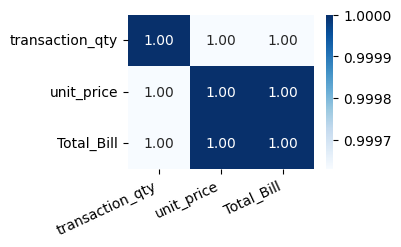

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_looseTea= agrupados_dia_looseTea.iloc[:, [5,6,7]].corr()
sns.heatmap(corr_faturamento_looseTea, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.6.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price, 19 = Size_num
# Exlusão do atributo 'Size_num' por ser igual a 0
X_faturamento_looseTea = agrupados_dia_looseTea.iloc[:, [5,6]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_looseTea = agrupados_dia_looseTea.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_looseTea = LinearRegression()
regressor_faturamento_looseTea.fit(X_faturamento_looseTea, y_faturamento_looseTea)

# Constante Statsmodels
X_sm_faturamento_looseTea = sm.add_constant(X_faturamento_looseTea)
resultados_sm_faturamento_looseTea = sm.OLS(y_faturamento_looseTea, X_sm_faturamento_looseTea).fit()

In [ ]:
print(resultados_sm_faturamento_looseTea.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.190e+32
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:24:47   Log-Likelihood:                 5215.7
No. Observations:                 175   AIC:                        -1.043e+04
Df Residuals:                     172   BIC:                        -1.042e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.465e-14   3.29e-15     

In [ ]:
# Equação de regressão linear múltipla - faturamento Loose Tea:
print(f'Equação da regressão linear do faturamento Loose Tea: \nX1 = transaction_qty; X2 = unit_price;\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'Faturamento  =  {regressor_faturamento_looseTea.intercept_} {regressor_faturamento_looseTea.coef_[0]} * X1  +  {regressor_faturamento_looseTea.coef_[1]} * X2')

Equação da regressão linear do faturamento Loose Tea: 
X1 = transaction_qty; X2 = unit_price;
Y  =  B0 +  B1 * X1  +  B2 * X2
Faturamento  =  0.0 -4.998145629965464e-15 * X1  +  1.0000000000000004 * X2


In [ ]:
Faturamento_l  =  0.0 -4.998145629965464e-15 * 8  +  1.0000000000000004 * 80
Faturamento_l

79.99999999999999

In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentolooseTea_statsmodels(quantidade, precoUnitario):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario]])
  y = resultados_sm_faturamento_looseTea.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentolooseTea_statsmodels(8, 80)

O faturamento previsto com o método Statsmodels predict: 0    80.0
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentolooseTea = pd.DataFrame({
    'transaction_qty': [8, 10, 12, 14],
    'unit_price': [80, 90, 100, 110]
})
display(print(df_faturamentolooseTea))

   transaction_qty  unit_price
0                8          80
1               10          90
2               12         100
3               14         110


None

In [ ]:
regressor_faturamento_looseTea.predict(df_faturamentolooseTea)

array([ 80.,  90., 100., 110.])

##### 3.5.6.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill
X_qtde_looseTea = agrupados_dia_looseTea.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_looseTea = agrupados_dia_looseTea.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_looseTea = LinearRegression()
regressor_qtde_looseTea.fit(X_qtde_looseTea, y_qtde_looseTea)

# Constante Statsmodels
X_sm_qtde_looseTea = sm.add_constant(X_qtde_looseTea)
resultados_sm_qtde_looseTea = sm.OLS(y_qtde_looseTea, X_sm_qtde_looseTea).fit()
print(resultados_sm_qtde_looseTea.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.337e+05
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          9.10e-273
Time:                        21:24:47   Log-Likelihood:                 77.080
No. Observations:                 175   AIC:                            -150.2
Df Residuals:                     173   BIC:                            -143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.019     -0.078      0.9

In [ ]:
# Equação de regressão linear múltipla - qtde Loose Tea:
print(f'Equação da regressão linear do qtde Loose Tea: \nX1 = unit_price; X2 = Total_Bill; X3 = Size_num;\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_looseTea.intercept_} + {regressor_qtde_looseTea.coef_[0]} * X1  +  {regressor_qtde_looseTea.coef_[1]} * X2')

Equação da regressão linear do qtde Loose Tea: 
X1 = unit_price; X2 = Total_Bill; X3 = Size_num;
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  -0.0014481949606031108 + 0.05396364388412753 * X1  +  0.053963643884127555 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdelooseTea_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]])
  y = resultados_sm_qtde_looseTea.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdelooseTea_statsmodels(80, 90)

A quantidade prevista com o método Statsmodels predict: 0    9.172371
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdelooseTea = pd.DataFrame({
    'unit_price': [80, 90, 110],
    'Total_Bill': [90, 110, 130]
})
display(print(df_qtdelooseTea))

   unit_price  Total_Bill
0          80          90
1          90         110
2         110         130


None

In [ ]:
regressor_qtde_looseTea.predict(df_qtdelooseTea)

array([ 9.17237127, 10.79128058, 12.94982634])

#### 3.5.7. Packaged Chocolate

##### 3.5.7.1. Estatísticas

In [ ]:
display(agrupados_dia_packagedChocolate[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-07,2,12.80,12.80,0
2023-01-08,2,20.93,20.93,0
2023-01-09,7,74.92,74.92,0
2023-01-10,2,15.20,15.20,0
2023-01-11,5,36.80,36.80,0


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_geral[['transaction_qty', 'unit_price', 'Total_Bill']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,1184.917127,1099.00,358.869597,30.286472,1.747659e-08,0.002193,3.019450e-20,1.147450e-06,0.0,-1.0,645.0,1962.00,878.000,1099.00,1513.500
1,unit_price,2786.425580,2574.16,867.464052,31.131786,5.057612e-07,0.011615,5.305792e-07,1.411965e-08,0.0,-1.0,1437.8,4918.06,2059.275,2574.16,3509.145
2,Total_Bill,3860.841602,3523.26,1187.822030,30.765884,4.195000e-08,0.002222,1.191976e-15,6.468226e-06,0.0,-1.0,2037.1,6403.91,2849.850,3523.26,4866.580


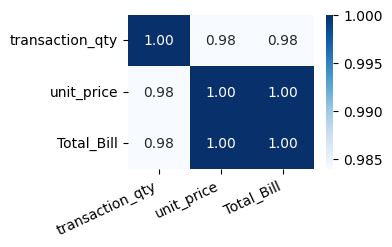

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_packagedChocolate= agrupados_dia_packagedChocolate.iloc[:, [5,6,7]].corr()
sns.heatmap(corr_faturamento_packagedChocolate, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.7.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price
X_faturamento_packagedChocolate = agrupados_dia_packagedChocolate.iloc[:, [5,6]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_packagedChocolate = agrupados_dia_packagedChocolate.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_packagedChocolate = LinearRegression()
regressor_faturamento_packagedChocolate.fit(X_faturamento_packagedChocolate, y_faturamento_packagedChocolate)

# Constante Statsmodels
X_sm_faturamento_packagedChocolate = sm.add_constant(X_faturamento_packagedChocolate)
resultados_sm_faturamento_packagedChocolate = sm.OLS(y_faturamento_packagedChocolate, X_sm_faturamento_packagedChocolate).fit()

In [ ]:
print(resultados_sm_faturamento_packagedChocolate.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.894e+32
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:24:48   Log-Likelihood:                 5338.0
No. Observations:                 175   AIC:                        -1.067e+04
Df Residuals:                     172   BIC:                        -1.066e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.882e-15   1.56e-15     

In [ ]:
# Equação de regressão linear múltipla - faturamento Packaged Chocolate:
print(f'Equação da regressão linear do faturamento Packaged Chocolate com Sklearn: \nX1 = transaction_qty; X2 = unit_price \nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'Faturamento  =  {regressor_faturamento_packagedChocolate.intercept_} + {regressor_faturamento_packagedChocolate.coef_[0]} * X1  +  {regressor_faturamento_packagedChocolate.coef_[1]} * X2')

Equação da regressão linear do faturamento Packaged Chocolate com Sklearn: 
X1 = transaction_qty; X2 = unit_price 
Y  =  B0 +  B1 * X1  +  B2 * X2
Faturamento  =  3.552713678800501e-15 + 3.566896326324146e-15 * X1  +  0.9999999999999994 * X2


In [ ]:
Faturamento_sk  =  3.552713678800501e-15 + 3.566896326324146e-15 * 1300  +  0.9999999999999994 * 2900
Faturamento_sk

2900.0000000000027

In [ ]:
print('Equação da regressão linear com o método Statsmodels \n \nX1 = transaction_qty; X2 = unit_price \nY  =  B0 +  B1 * X1  +  B2 * X2 \nY = ',
      resultados_sm_faturamento_packagedChocolate.params['const'], '+',
      resultados_sm_faturamento_packagedChocolate.params['transaction_qty'], '* X1 +',
      resultados_sm_faturamento_packagedChocolate.params['unit_price'], '* X2')

Equação da regressão linear com o método Statsmodels 
 
X1 = transaction_qty; X2 = unit_price 
Y  =  B0 +  B1 * X1  +  B2 * X2 
Y =  -8.881784197001252e-15 + 1.2351231148954867e-14 * X1 + 0.9999999999999992 * X2


In [ ]:
Y_st =  -8.881784197001252e-15 + 1.2351231148954867e-14 * 1300 + 0.9999999999999992 * 2900
Y_st

2900.0000000000136

In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentopackagedChocolate_statsmodels(quantidade, precoUnitario):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario]])
  y = resultados_sm_faturamento_packagedChocolate.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentopackagedChocolate_statsmodels(1300, 2900)

O faturamento previsto com o método Statsmodels predict: 0    2900.0
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentopackagedChocolate = pd.DataFrame({
    'transaction_qty': [1300, 1500, 1600],
    'unit_price': [2900, 3100, 3300]
})
display(print(df_faturamentopackagedChocolate))

   transaction_qty  unit_price
0             1300        2900
1             1500        3100
2             1600        3300


None

In [ ]:
regressor_faturamento_packagedChocolate.predict(df_faturamentopackagedChocolate)

array([2900., 3100., 3300.])

##### 3.5.7.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill
X_qtde_packagedChocolate = agrupados_dia_packagedChocolate.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_packagedChocolate = agrupados_dia_packagedChocolate.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_packagedChocolate = LinearRegression()
regressor_qtde_packagedChocolate.fit(X_qtde_packagedChocolate, y_qtde_packagedChocolate)

# Constante Statsmodels
X_sm_qtde_packagedChocolate = sm.add_constant(X_qtde_packagedChocolate)
resultados_sm_qtde_packagedChocolate = sm.OLS(y_qtde_packagedChocolate, X_sm_qtde_packagedChocolate).fit()
print(resultados_sm_qtde_packagedChocolate.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     5280.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.46e-131
Time:                        21:24:48   Log-Likelihood:                -113.81
No. Observations:                 175   AIC:                             231.6
Df Residuals:                     173   BIC:                             237.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2152      0.050      4.311      0.0

In [ ]:
# Equação de regressão linear múltipla - qtde Packaged Chocolate:
print(f'Equação da regressão linear do qtde Packaged Chocolate: \nX1 = unit_price; X2 = Total_Bill \nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_packagedChocolate.intercept_} + {regressor_qtde_packagedChocolate.coef_[0]} * X1  +  {regressor_qtde_packagedChocolate.coef_[1]} * X2')

Equação da regressão linear do qtde Packaged Chocolate: 
X1 = unit_price; X2 = Total_Bill 
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  0.2151662675972812 + 0.05097352587444478 * X1  +  0.050973525874444814 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdepackagedChocolate_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]])
  y = resultados_sm_qtde_packagedChocolate.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdepackagedChocolate_statsmodels(2900, 4000)

A quantidade prevista com o método Statsmodels predict: 0    351.932495
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdepackagedChocolate = pd.DataFrame({
    'unit_price': [2900, 3100, 3300],
    'Total_Bill': [4000, 4200, 4400]
})
display(print(df_qtdepackagedChocolate))

   unit_price  Total_Bill
0        2900        4000
1        3100        4200
2        3300        4400


None

In [ ]:
regressor_qtde_packagedChocolate.predict(df_qtdepackagedChocolate)

array([351.9324948 , 372.32190515, 392.7113155 ])

#### 3.5.8. Branded

##### 3.5.8.1. Estatísticas

In [ ]:
display(agrupados_dia_branded[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-08,2,28.0,28.0,0
2023-01-09,6,84.0,98.0,0
2023-01-10,3,36.0,36.0,0
2023-01-11,7,106.0,106.0,0
2023-01-12,1,12.0,12.0,0


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_branded[['transaction_qty', 'unit_price', 'Total_Bill']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,4.459770,3.0,4.839158,108.506887,3.710874e-12,0.000026,2.737869e-09,2.958035e-50,1.0,1.0,0.0,23.0,0.0,3.0,7.0
1,unit_price,76.074713,56.0,85.317429,112.149526,7.464475e-13,0.000009,2.389656e-12,2.015640e-62,1.0,2.0,0.0,426.0,0.0,56.0,112.5
2,Total_Bill,78.201149,56.0,87.628484,112.055238,9.102368e-13,0.000010,1.274011e-11,7.626236e-60,1.0,2.0,0.0,426.0,0.0,56.0,120.5


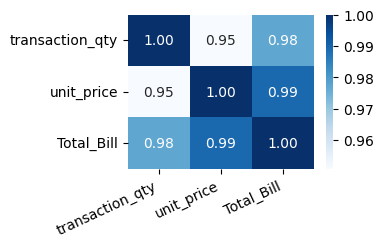

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_branded= agrupados_dia_branded.iloc[:, [5,6,7]].corr()
sns.heatmap(corr_faturamento_branded, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.8.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price
X_faturamento_branded = agrupados_dia_branded.iloc[:, [5,6]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_branded = agrupados_dia_branded.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_branded = LinearRegression()
regressor_faturamento_branded.fit(X_faturamento_branded, y_faturamento_branded)

# Constante Statsmodels
X_sm_faturamento_branded = sm.add_constant(X_faturamento_branded)
resultados_sm_faturamento_branded = sm.OLS(y_faturamento_branded, X_sm_faturamento_branded).fit()

In [ ]:
print(resultados_sm_faturamento_branded.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.145e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          7.76e-183
Time:                        21:24:48   Log-Likelihood:                -598.03
No. Observations:                 174   AIC:                             1202.
Df Residuals:                     171   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5627      0.784     

In [ ]:
# Equação de regressão linear múltipla - faturamento Branded:
print(f'Equação da regressão linear do faturamento Branded: \nX1 = transaction_qty; X2 = unit_price\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'Faturamento  =  {regressor_faturamento_branded.intercept_} + {regressor_faturamento_branded.coef_[0]} * X1  +  {regressor_faturamento_branded.coef_[1]} * X2')

Equação da regressão linear do faturamento Branded: 
X1 = transaction_qty; X2 = unit_price
Y  =  B0 +  B1 * X1  +  B2 * X2
Faturamento  =  -1.562668006931176 + 6.910339246910836 * X1  +  0.6433845265243798 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentobranded_statsmodels(quantidade, precoUnitario):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario]])
  y = resultados_sm_faturamento_branded.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentobranded_statsmodels(6, 90)

O faturamento previsto com o método Statsmodels predict: 0    97.803975
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentobranded = pd.DataFrame({
    'transaction_qty': [6, 8, 12],
    'unit_price': [90, 110, 130]
})
display(print(df_faturamentobranded))

   transaction_qty  unit_price
0                6          90
1                8         110
2               12         130


None

In [ ]:
regressor_faturamento_branded.predict(df_faturamentobranded)

array([ 97.80397486, 124.49234389, 165.0013914 ])

##### 3.5.8.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill
X_qtde_branded = agrupados_dia_branded.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_branded = agrupados_dia_branded.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_branded = LinearRegression()
regressor_qtde_branded.fit(X_qtde_branded, y_qtde_branded)

# Constante Statsmodels
X_sm_qtde_branded = sm.add_constant(X_qtde_branded)
resultados_sm_qtde_branded = sm.OLS(y_qtde_branded, X_sm_qtde_branded).fit()

print(resultados_sm_qtde_branded.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2484.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          4.36e-127
Time:                        21:24:48   Log-Likelihood:                -224.69
No. Observations:                 174   AIC:                             455.4
Df Residuals:                     171   BIC:                             464.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2716      0.090      3.003      0.0

In [ ]:
# Equação de regressão linear múltipla - quantidade Branded:
print(f'Equação da regressão linear da quantidade Branded: \nX1 = unit_price; X2 = Total_Bill;\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_branded.intercept_} {regressor_qtde_branded.coef_[0]} * X1  +  {regressor_qtde_branded.coef_[1]} * X2')

Equação da regressão linear da quantidade Branded: 
X1 = unit_price; X2 = Total_Bill;
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  0.27157335794194815 -0.042166825631591257 * X1  +  0.09457694617501834 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdebranded_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]])
  y = resultados_sm_qtde_branded.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdebranded_statsmodels(90, 90)

A quantidade prevista com o método Statsmodels predict: 0    4.988484
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdebranded = pd.DataFrame({
    'unit_price': [90, 110, 130],
    'Total_Bill': [90, 110, 130]
})
display(print(df_qtdebranded))

   unit_price  Total_Bill
0          90          90
1         110         110
2         130         130


None

In [ ]:
regressor_qtde_branded.predict(df_qtdebranded)

array([4.98848421, 6.03668662, 7.08488903])

#### 3.5.9. Coffee beans

##### 3.5.9.1. Estatísticas

In [ ]:
display(agrupados_dia_coffeeBeans[['transaction_qty', 'unit_price', 'Total_Bill', 'Size_num']].head())

,transaction_qty,unit_price,Total_Bill,Size_num
transaction_date,,,,
2023-01-07,12,238.65,238.65,0
2023-01-08,12,193.45,211.45,0
2023-01-09,12,217.65,217.65,0
2023-01-10,6,146.70,146.70,0
2023-01-11,4,128.45,128.45,0


In [ ]:
estatisticaDescritivaMulti(agrupados_dia_coffeeBeans[['transaction_qty', 'unit_price', 'Total_Bill']])

,VARIÁVEL,MEDIA,MEDIANA,DP,CV%,SHAPIRO_p,Kolmogorov_p,D'Agostino-Pearson_p,QUI²_p,CAF,CCF,Min,Max,Q1,Q2,Q3
0,transaction_qty,10.445714,10.0,8.337436,79.816812,3.222640e-07,0.005266,6.022638e-03,1.399060e-31,1.0,0.0,0.0,42.00,3.0,10.0,15.00
1,unit_price,210.544286,199.5,163.241802,77.533238,7.992605e-07,0.002842,5.430421e-02,1.217471e-22,0.0,-0.0,0.0,676.05,58.2,199.5,320.75
2,Total_Bill,229.058571,200.7,212.347804,92.704587,3.305246e-12,0.001803,1.977097e-19,3.445151e-62,2.0,7.0,0.0,1449.20,58.2,200.7,326.90


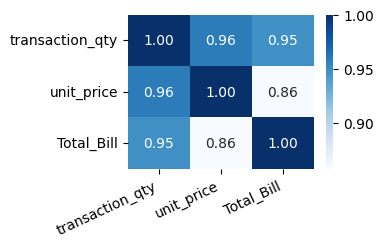

In [ ]:
# Matriz de correlação
plt.figure(figsize=(3,2))
corr_faturamento_coffeeBeans= agrupados_dia_coffeeBeans.iloc[:, [5,6,7]].corr()
sns.heatmap(corr_faturamento_coffeeBeans, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=25, ha='right')
plt.show()

##### 3.5.9.2. Faturamento

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 5 = transaction_qty, 6 = unit_price
X_faturamento_coffeeBeans = agrupados_dia_coffeeBeans.iloc[:, [5,6]]

# Atributo alvo/ variável dependente
# coluna: 7 = Total_Bill
y_faturamento_coffeeBeans = agrupados_dia_coffeeBeans.iloc[:, 7]

In [ ]:
# Regressor Sklearn
regressor_faturamento_coffeeBeans = LinearRegression()
regressor_faturamento_coffeeBeans.fit(X_faturamento_coffeeBeans, y_faturamento_coffeeBeans)

# Constante Statsmodels
X_sm_faturamento_coffeeBeans = sm.add_constant(X_faturamento_coffeeBeans)
resultados_sm_faturamento_coffeeBeans = sm.OLS(y_faturamento_coffeeBeans, X_sm_faturamento_coffeeBeans).fit()

In [ ]:
print(resultados_sm_faturamento_coffeeBeans.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1114.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           3.67e-99
Time:                        21:24:49   Log-Likelihood:                -954.89
No. Observations:                 175   AIC:                             1916.
Df Residuals:                     172   BIC:                             1925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.3531      7.072     

In [ ]:
# Equação de regressão linear múltipla - faturamento Coffee Beans:
print(f'Equação da regressão linear do faturamento Coffee Beans: \nX1 = transaction_qty; X2 = unit_price \nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'Faturamento  =  {regressor_faturamento_coffeeBeans.intercept_} + {regressor_faturamento_coffeeBeans.coef_[0]} * X1 {regressor_faturamento_coffeeBeans.coef_[1]} * X2')

Equação da regressão linear do faturamento Coffee Beans: 
X1 = transaction_qty; X2 = unit_price 
Y  =  B0 +  B1 * X1  +  B2 * X2
Faturamento  =  -11.353086598522083 + 39.12646289823276 * X1 -0.7993196958421538 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def faturamentocoffeeBeans_statsmodels(quantidade, precoUnitario):
  valores_predicao = pd.DataFrame([[1.0, quantidade, precoUnitario]])
  y = resultados_sm_faturamento_coffeeBeans.predict(valores_predicao)
  return print(f'O faturamento previsto com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
faturamentocoffeeBeans_statsmodels(12, 230)

O faturamento previsto com o método Statsmodels predict: 0    274.320938
dtype: float64


In [ ]:
# Predição de vários dias
df_faturamentocoffeeBeans = pd.DataFrame({
    'transaction_qty': [12, 14, 16],
    'unit_price': [230, 250, 270]
})
display(print(df_faturamentocoffeeBeans))

   transaction_qty  unit_price
0               12         230
1               14         250
2               16         270


None

In [ ]:
regressor_faturamento_coffeeBeans.predict(df_faturamentocoffeeBeans)

array([274.32093814, 336.58747002, 398.8540019 ])

##### 3.5.9.3. Quantidade

In [ ]:
# Atributos preditores/ variáveis independentes
# colunas: 6 = unit_price, 7 = Total_Bill
X_qtde_coffeeBeans = agrupados_dia_coffeeBeans.iloc[:, [6,7]]

# Atributo alvo/ variável dependente
# coluna: 5 = transaction_qty
y_qtde_coffeeBeans = agrupados_dia_coffeeBeans.iloc[:, 5]

In [ ]:
# Regressor Sklearn
regressor_qtde_coffeeBeans = LinearRegression()
regressor_qtde_coffeeBeans.fit(X_qtde_coffeeBeans, y_qtde_coffeeBeans)

# Constante Statsmodels
X_sm_qtde_coffeeBeans = sm.add_constant(X_qtde_coffeeBeans)
resultados_sm_qtde_coffeeBeans = sm.OLS(y_qtde_coffeeBeans, X_sm_qtde_coffeeBeans).fit()

print(resultados_sm_qtde_coffeeBeans.summary())

                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     3799.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          4.78e-143
Time:                        21:24:49   Log-Likelihood:                -285.52
No. Observations:                 175   AIC:                             577.0
Df Residuals:                     172   BIC:                             586.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2496      0.154      1.618      0.1

In [ ]:
# Equação de regressão linear múltipla - quantidade Coffee Beans:
print(f'Equação da regressão linear da quantidade Coffee Beans: \nX1 = unit_price; X2 = Total_Bill; X3 = Size_num\nY  =  B0 +  B1 * X1  +  B2 * X2')
print(f'qtde  =  {regressor_qtde_coffeeBeans.intercept_} + {regressor_qtde_coffeeBeans.coef_[0]} * X1  +  {regressor_qtde_coffeeBeans.coef_[1]} * X2')

Equação da regressão linear da quantidade Coffee Beans: 
X1 = unit_price; X2 = Total_Bill; X3 = Size_num
Y  =  B0 +  B1 * X1  +  B2 * X2
qtde  =  0.24959266360104593 + 0.02816251644038246 * X1  +  0.018626959417611565 * X2


In [ ]:
# Função para uso do método predict Statsmodels:
def qtdecoffeeBeans_statsmodels(precoUnitario, faturamento):
  valores_predicao = pd.DataFrame([[1.0, precoUnitario, faturamento]])
  y = resultados_sm_qtde_coffeeBeans.predict(valores_predicao)
  return print(f'A quantidade prevista com o método Statsmodels predict: {y}')

In [ ]:
# Resultado da função
qtdecoffeeBeans_statsmodels(12, 240)

A quantidade prevista com o método Statsmodels predict: 0    5.058013
dtype: float64


In [ ]:
# Predição de vários dias
df_qtdecoffeeBeans = pd.DataFrame({
    'unit_price': [12, 15, 18],
    'Total_Bill': [240, 260, 280],
})
display(print(df_qtdecoffeeBeans))

   unit_price  Total_Bill
0          12         240
1          15         260
2          18         280


None

In [ ]:
regressor_qtde_coffeeBeans.predict(df_qtdecoffeeBeans)

array([5.05801312, 5.51503986, 5.9720666 ])

## 4. Análise probabilística preliminar do faturamento: distribuição normal e uniforme*

### 4.1. Funções para cálculo das distribuições normal e uniforme

In [ ]:
# Função para calcular a distribuição normal - acima
def normalZ_acima(x, media, dp):
  z = 1 - norm.cdf(x, loc=media, scale=dp)
  return z

# Função para calcular a distribuição normal - abaixo
def normalZ_abaixo(x, media, dp):
  z = norm.cdf(x, loc=media, scale=dp)
  return z

# Função que calcula a probabilidade entre dois valores em uma distribuição normal
def normalZ_2(media, dp, inferior, superior):
    z_inferior = (inferior - media) / dp
    z_superior = (superior - media) / dp
    probabilidade = norm.cdf(z_superior) - norm.cdf(z_inferior)
    return probabilidade

# Função para calcular a distribuição uniforme
def distribuicaoUniforme(minimo, maximo, distancia):
  probabilidadeUniforme = (1 / (maximo - minimo)) * distancia
  return probabilidadeUniforme

### 4.2. Rede

In [ ]:
estatisticaDescritiva(agrupados_dia_geral['Total_Bill'])

Media: 3860.841602209945
Moda: [2508.2, 2403.35, 2565.0, 2220.1, 2418.85, 2273.85, 2619.65, 2638.53, 2676.61, 2685.65, 2555.75, 2327.7, 3033.6, 2682.51, 3167.71, 2829.16, 3285.8, 2735.96, 2913.68, 2603.73, 3082.85, 2367.33, 2853.15, 2868.95, 2846.55, 2863.03, 2742.1, 2037.1, 2060.75, 2476.41, 2334.13, 2466.3, 2506.9, 2591.45, 2551.7, 2304.7, 2203.4, 2434.55, 2762.43, 2610.63, 2901.6, 2526.74, 2894.0, 2845.48, 2673.93, 2928.05, 3023.33, 2300.75, 2865.48, 3219.6, 2883.63, 2783.53, 2928.7, 2746.21, 2940.7, 2823.55, 2956.75, 3160.0, 2311.1, 3040.25, 2996.05, 3155.15, 2781.9, 2945.3, 2618.05, 2803.5, 3523.26, 3459.97, 3441.58, 3211.65, 3088.33, 3627.65, 3312.66, 3338.03, 3386.11, 3181.75, 3408.36, 3340.03, 3262.28, 3209.8, 3284.11, 3361.13, 3586.2, 3380.95, 3310.83, 3674.35, 2792.55, 2492.0, 2932.82, 2888.08, 3699.9, 3575.85, 3604.95, 3327.3, 3552.7, 3250.2, 3682.8, 4573.06, 4088.88, 4220.3, 3852.86, 4040.18, 4114.53, 4131.25, 4121.79, 4500.39, 4332.1, 4354.07, 4318.31, 3924.78, 4005.38, 39

A) Distribuição Normal

Considerando que a média do faturamento da rede é de 3860.84 e o desvio padrão conhecido é de 1187.82, qual é a probabilidade do faturamento estar entre 3000.00 e 4850, assumindo uma distribuição normal?

In [ ]:
media, dp, inferior, superior = 3860.84, 1187.82, 3000, 4850

print(f'Resultado: {normalZ_2(media, dp, inferior, superior) * 100} %')

Resultado: 56.31967044574113 %


B) Distribuição Uniforme

Em uma condição que o faturamento da rede segue uma distribuição uniforme entre o valor mínimo de 2037.1 e o valor máximo de 6403.91, qual é a probabilidade de um faturamento estar abaixo do terceiro quartil 4866.58?

In [ ]:
minimo, maximo = 2037.1, 6403.91
distancia = 4866.58 - 2037.1

print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 2829.48

Resultado: 64.79512504551379% 


### 4.3. Loja 'Astoria'

In [ ]:
estatisticaDescritiva(agrupados_dia_astoria['Total_Bill'])

Media: 1283.1155248618784
Moda: [868.4, 925.5, 902.75, 808.25, 903.05, 716.05, 807.3, 793.15, 774.01, 947.0, 740.15, 660.7, 705.8, 763.7, 1348.93, 1027.33, 1075.4, 1064.03, 1079.38, 871.43, 992.35, 742.8, 928.3, 922.05, 942.0, 939.25, 838.55, 733.25, 820.7, 870.6, 801.5, 833.7, 944.8, 940.2, 825.95, 871.25, 655.35, 804.3, 928.8, 866.8, 868.0, 670.05, 680.6, 641.9, 747.05, 1254.95, 1191.3, 967.6, 1069.53, 1164.4, 760.23, 870.48, 1037.5, 904.5, 986.9, 813.55, 1030.9, 931.85, 842.9, 1021.1, 1088.4, 1160.35, 1008.75, 1097.15, 732.75, 921.3, 1209.08, 908.83, 1081.2, 995.25, 664.13, 846.1, 966.55, 1417.45, 1149.13, 1440.45, 1207.58, 1488.5, 1113.08, 835.85, 1124.55, 1060.55, 1123.2, 1025.75, 1208.65, 1124.0, 954.75, 978.8, 967.05, 915.15, 1316.5, 1351.35, 1333.4, 1150.75, 1242.15, 1002.95, 1138.6, 1631.93, 1192.18, 1355.45, 1295.0, 958.63, 1069.7, 1195.83, 1622.66, 1482.08, 1543.6, 1608.79, 1738.93, 1163.95, 1101.88, 1291.95, 1384.05, 1539.8, 1306.1, 1447.5, 1439.55, 1172.7, 1124.05, 1275.6,

A) Distribuição Normal

A média de faturamento da loja Astoria é de 1283.12 e o desvio padrão conhecido é de 426.44, qual é a probabilidade de o faturamento estar acima de 1600.00, assumindo uma distribuição normal?

In [ ]:
x, media, dp = 1600, 1283.12, 426.44

print(f'Resultado: {normalZ_acima(x, media, dp) * 100} %')

Resultado: 22.871593888663845 %


B) Distribuição Uniforme

Supondo que o faturamento da loja Astoria tenha uma distribuição uniforme entre o valor mínimo de 641.9 e o valor máximo de 2546.43, qual é a probabilidade do faturamento da loja Astoria ser no mínimo 1305?

In [ ]:
minimo, maximo = 641.9, 2546.43
distancia = 2546.43 - 1305

print(f'A distância = {distancia}')
distribuicaoUniforme(minimo, maximo, distancia)

print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100} % ')

A distância = 1241.4299999999998

Resultado: 65.1830110315931 % 


### 4.4. Loja Lower Manhattan

In [ ]:
estatisticaDescritiva(agrupados_dia_lower['Total_Bill'])

Media: 1271.0345303867402
Moda: [788.35, 649.05, 756.0, 630.2, 800.9, 790.6, 788.25, 972.55, 1008.2, 930.55, 841.05, 915.1, 965.2, 775.0, 856.35, 850.68, 788.9, 825.83, 788.05, 791.55, 1015.0, 1003.08, 898.75, 1105.8, 1063.85, 1067.35, 1143.5, 604.2, 627.9, 737.41, 764.23, 783.2, 678.15, 755.25, 881.1, 724.1, 751.9, 737.0, 883.7, 884.58, 961.3, 825.48, 1087.6, 1018.43, 763.23, 822.85, 923.8, 695.55, 746.45, 891.0, 1056.75, 954.4, 1060.5, 952.73, 1138.7, 1156.65, 997.4, 1469.25, 719.0, 978.7, 886.9, 957.25, 904.75, 944.15, 950.35, 746.15, 1130.1, 1282.44, 1108.2, 1075.6, 1146.15, 1340.65, 966.28, 915.3, 1094.55, 952.85, 1037.53, 766.35, 1035.1, 1057.25, 1235.66, 1158.25, 1447.1, 1348.9, 1130.55, 1489.75, 945.25, 840.3, 966.79, 1049.53, 1168.05, 1002.2, 1127.55, 1092.0, 1202.25, 1080.25, 1014.75, 1513.35, 1465.3, 1453.8, 1195.83, 1512.55, 1247.43, 1116.96, 1270.05, 1462.88, 1150.05, 1164.68, 1130.2, 1443.43, 1381.65, 1634.18, 1522.76, 1558.9, 1664.35, 1684.45, 1686.1, 1111.15, 936.9, 116

A) Distribuição Normal

A loja Lower Manhattan tem a média de faturamento de 1271.03 e o desvio padrão de 425.64, qual é a probabilidade do faturamento da loja estar entre 900 e 1500, em uma distribuição normal?

In [ ]:
media, dp, inferior, superior = 1271.03, 425.64, 900, 1500

print(f'Resultado: {normalZ_2(media, dp, inferior, superior) * 100} %')

Resultado: 51.30054732692426 %


B) Distribuição Uniforme

Supondo que o faturamento na loja Lower siga uma distribuição uniforme, sendo o valor mínimo de 604.2 e o valor máximo de 2437.4, qual é a probabilidade de um faturamento estar abaixo de 1000?

In [ ]:
minimo, maximo = 604.2, 2437.4
distancia = 1000 - 604.2

print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 395.79999999999995

Resultado: 21.590661138991923% 


### 4.5. Loja "Hell's Kitchen"

In [ ]:
estatisticaDescritiva(agrupados_dia_hell['Total_Bill'])

Media: 1306.6915469613261
Moda: [868.4, 892.55]
Mediana: 1184.08
Desvio Padrão: 441.73783935199776
Coeficiente de Variação: 33.80582359924548%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9458844312454595), pvalue=np.float64(2.295049825257387e-06))
Teste Kolmogorov-Smirnov: p-valor: 0.008848396229293242
Teste D'Agostino e Pearson: p-valor: 0.0013028501629909971
Teste Qui-quadrado Uniformidade (bins=13): χ² = 73.75690607734806 ; p-valor: 6.307482232219497e-11
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 612.15 ; Máximo: 2534.8
Quartil 1: 926.175 ; Quartil 2: 1184.08 ; Quartil 3: 1604.9


A) Distribuição Normal

Considerando que o faturamento da loja Hell's Kitchen tem com média de 1306.69 e o desvio padrão de 441.74, qual é a probabilidade do faturamento estar abaixo de 1320, em uma distribuição normal?

In [ ]:
x, media, dp = 1320, 1306.69, 441.74

print(f'Resultado: {normalZ_abaixo(x, media, dp) * 100} %')

Resultado: 51.20186499078646 %


B) Distribuição Uniforme

Supondo que o faturamento da loja Hell's Kitchen siga uma distribuição uniforme, com o valor mínimo de 612.15 e o valor máximo de 2534.8, qual é a probabilidade de o faturamento ser entre 1300 e 1450?

In [ ]:
minimo, maximo = 612.15, 2534.8
distancia = 1450 - 1300
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 150

Resultado: 7.801731984500558% 


### 4.6. Categorias

#### 4.6.1. Tea

In [ ]:
estatisticaDescritiva(agrupados_dia_tea['Total_Bill'])

Media: 1085.1157458563537
Moda: [811.1, 763.85, 827.05, 751.3, 797.95, 681.05, 740.35, 686.4, 711.3, 771.95, 689.4, 646.25, 868.75, 527.55, 865.55, 693.1, 654.3, 765.3, 678.55, 630.05, 730.1, 742.7, 774.85, 860.8, 881.7, 801.1, 895.85, 605.95, 568.45, 605.4, 593.95, 794.95, 888.45, 897.2, 793.4, 820.8, 711.25, 741.95, 774.95, 660.1, 811.2, 701.35, 695.95, 747.65, 537.55, 791.4, 829.7, 625.0, 676.5, 793.6, 648.85, 701.7, 909.3, 816.2, 904.9, 877.3, 846.8, 1016.9, 718.5, 1027.4, 985.15, 1082.15, 945.25, 966.1, 809.9, 799.5, 914.7, 875.05, 1047.9, 846.75, 695.45, 963.15, 758.15, 825.25, 989.55, 808.2, 856.95, 911.3, 816.35, 799.7, 964.85, 973.0, 1023.8, 952.0, 1055.45, 1130.85, 796.3, 700.65, 793.5, 796.35, 1163.95, 1178.15, 1153.15, 1153.35, 1189.75, 1122.2, 1055.35, 1196.4, 995.55, 1205.8, 1115.65, 963.85, 1140.25, 847.1, 1051.5, 1168.7, 964.5, 1126.25, 1107.2, 1010.9, 1098.7, 1126.4, 1160.2, 1193.9, 1241.4, 1198.5, 1480.25, 1011.55, 865.15, 1071.35, 1520.55, 1614.9, 1534.55, 1521.0, 15

A) Distribuição Normal

O faturamento da categoria Tea na rede tem média de 1085.12 e desvio padrão de 338.02, qual é a probabilidade de um valor ser inferior a 1200, em uma distribuição normal?

In [ ]:
x, media, dp = 1200, 1085.12, 338.02

print(f'Resultado: {normalZ_abaixo(x, media, dp) * 100} %')

Resultado: 63.301960197918895 %


B) Distribuição Uniforme

Em uma distribuição uniforme, o faturamento da categoria Tea da rede tem o valor mínimo de 527.55 e valor máximo de 1908.4. Qual é a probabilidade de o valor estar entre 800 e 1300?

In [ ]:
minimo, maximo = 527.55, 1908.4
distancia = 1300 - 800
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 500

Resultado: 36.20958105514718% 


#### 4.6.2. Coffee

In [ ]:
estatisticaDescritiva(agrupados_dia_coffee['Total_Bill'])

Media: 1491.45
Moda: [1160.1, 1109.25, 1105.45, 995.8000000000001, 1063.15, 1050.8, 1029.2, 956.75, 893.4, 984.8, 883.5, 856.95, 1146.45, 946.15, 1051.7, 1078.7, 857.95, 915.6, 1113.5, 841.9, 1007.15, 964.5, 1227.85, 1059.75, 1165.85, 1217.1, 1065.2, 973.25, 894.95, 816.65, 823.5, 1063.1, 1019.2, 1078.0, 1157.8, 949.9, 978.65, 948.1, 1041.6, 969.55, 1098.3, 916.85, 967.8, 1153.2, 1004.95, 984.55, 980.65, 908.05, 948.35, 1168.4, 980.8, 968.15, 1172.9, 1035.35, 1165.95, 1121.85, 1236.0, 1158.55, 1092.4, 1352.85, 1296.15, 1334.0, 1183.15, 1238.95, 1075.9, 1240.45, 1236.15, 1233.9, 1183.4, 1196.4, 1165.2, 1391.3, 1092.5, 1167.1, 1219.75, 1175.05, 1161.85, 1162.4, 1100.1, 1067.75, 1258.9, 1336.05, 1468.25, 1415.9, 1331.4, 1449.35, 1354.35, 1111.45, 1213.85, 1089.8, 1728.2, 1574.2, 1525.8, 1429.45, 1444.2, 1369.0, 1455.8, 1600.95, 1519.75, 1472.6, 1440.4, 1432.55, 1554.0, 1292.3, 1513.3, 1655.95, 1380.7, 1509.05, 1569.75, 1277.3, 1394.3, 1648.85, 1799.0, 1766.7, 1698.9, 1909.9, 1788.0, 1607.

A) Distribuição Normal

A categoria Coffee, em uma distribuição normal, tem média de faturamento de 1491.45 e o desvio padrão de 462.99. Nesse cenário, qual é a probabilidade de o valor estar acima de 1850?

In [ ]:
x, media, dp = 1850, 1491.45, 462.99

print(f'Resultado: {normalZ_acima(x, media, dp) * 100} %')

Resultado: 21.934041023231423 %


B) Distribuição Uniforme

Em uma distribuição uniforme, o faturamento da categoria Coffee da rede está entre 816.65 e 2586.85, qual é a probabilidade de o valor estar entre 950 e 1250?

In [ ]:
minimo, maximo = 816.65, 2586.85
distancia = 1250 - 950
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 300

Resultado: 16.94723760027116% 


#### 4.6.3. Bakery

In [ ]:
estatisticaDescritiva(agrupados_dia_bakery['Total_Bill'])

Media: 454.7825414364641
Moda: [309.75, 351.0, 479.0, 527.0]
Mediana: 419.25
Desvio Padrão: 143.08722021959852
Coeficiente de Variação: 31.462777741565674%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9502642816287593), pvalue=np.float64(5.680706665861439e-06))
Teste Kolmogorov-Smirnov: p-valor: 0.009723880771397051
Teste D'Agostino e Pearson: p-valor: 0.0013590644423599008
Teste Qui-quadrado Uniformidade (bins=13): χ² = 81.22651933701657 ; p-valor: 2.407077515409526e-12
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 214.5 ; Máximo: 861.75
Quartil 1: 328.29999999999995 ; Quartil 2: 419.25 ; Quartil 3: 562.3399999999999


A) Distribuição Normal

Qual a probabilidade da categoria Bakery faturar entre 400 e 600, em uma distribuição normal, com a média de 454.78 e o desvio padrão de 143.09?

In [ ]:
media, dp, inferior, superior = 454.78, 143.09, 400, 600

print(f'Resultado: {normalZ_2(media, dp, inferior, superior) * 100} %')

Resultado: 49.399915892814825 %


B) Distribuição Uniforme

Qual a probabilidade do faturamento da categoria Bakery estar entre 655 e 815, em uma distribuição uniforme com intervalo entre 214.5 e 861.75 ?

In [ ]:
minimo, maximo = 214.5, 861.75
distancia = 815 - 655

print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 160

Resultado: 24.719969100038625% 


#### 4.6.4. Drinking Chocolate

In [ ]:
estatisticaDescritiva(agrupados_dia_drinkingChocolate['Total_Bill'])

Media: 400.08839779005524
Moda: [295.25]
Mediana: 373.75
Desvio Padrão: 131.53050629744837
Coeficiente de Variação: 32.87536130114637%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9540281694226683), pvalue=np.float64(1.2805448451351283e-05))
Teste Kolmogorov-Smirnov: p-valor: 0.06075171163294002
Teste D'Agostino e Pearson: p-valor: 0.00047749504170982703
Teste Qui-quadrado Uniformidade (bins=13): χ² = 49.91160220994475 ; p-valor: 1.4479593936619665e-06
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 163.5 ; Máximo: 712.25
Quartil 1: 294.0 ; Quartil 2: 373.75 ; Quartil 3: 503.875


A) Distribuição Normal

O faturamento da rede na categoria Drinking Chocolate, em uma distribuição normal, tem a média de 400,09 e o desvio padrão de 131,53, qual é a probabilidade do faturamento ser no máximo 550 em um dia?

In [ ]:
x, media, dp = 550, 400.09, 131.53

print(f'Resultado: {normalZ_abaixo(x, media, dp) * 100} %')

Resultado: 87.28026778998559 %


B) Distribuição Uniforme

O faturamento da rede na categoria Drinking Chocolate tem o intervalo observado entre 163.5 e 712.25, qual a probalidade do faturamento ser no máximo 389, em uma distribuição uniforme?

In [ ]:
minimo, maximo = 163.5, 712.25
distancia = 389 - 163.5
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 225.5

Resultado: 41.09339407744875% 


#### 4.6.5. Flavours

In [ ]:
estatisticaDescritiva(agrupados_dia_flavours['Total_Bill'])

Media: 48.05028571428572
Moda: [0.0]
Mediana: 48.0
Desvio Padrão: 36.6931135671427
Coeficiente de Variação: 76.36398623168552%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9370360576250177), pvalue=np.float64(6.043591998266811e-07))
Teste Kolmogorov-Smirnov: p-valor: 0.0020426311537279237
Teste D'Agostino e Pearson: p-valor: 0.0006692185435918734
Teste Qui-quadrado Uniformidade (bins=13): χ² = 92.35428571428571 ; p-valor: 1.7259645329618024e-14
Coeficiente de Assimetria de Fisher: 0.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 0.0 ; Máximo: 130.4
Quartil 1: 17.6 ; Quartil 2: 48.0 ; Quartil 3: 71.2


A) Distribuição Normal

Considerando que na categoria Flavours em uma distribuição normal, o faturamento tem média diária de 48.05 e o desvio padrão de 36.69, qual é probabilidade do faturamento de ser no mínimo 50?

In [ ]:
x, media, dp = 50, 48.05, 36.69

print(f'Resultado: {normalZ_acima(x, media, dp) * 100} %')

Resultado: 47.88069948027793 %


B) Distribuição Uniforme

Em uma distribuição uniforme, o faturamento da categoria Flavours, está no intervalo entre 0 e 130.4, qual é a probabilidade de uma conta estar entre 70 e 105?

In [ ]:
minimo, maximo = 0, 130.4
distancia = 105 - 70
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 35

Resultado: 26.840490797546014% 


#### 4.6.6. Loose Tea

In [ ]:
estatisticaDescritiva(agrupados_dia_looseTea['Total_Bill'])

Media: 64.07771428571428
Moda: [0.0]
Mediana: 58.8
Desvio Padrão: 53.19594785609806
Coeficiente de Variação: 83.01786112236178%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9273223437924669), pvalue=np.float64(1.0971770557977884e-07))
Teste Kolmogorov-Smirnov: p-valor: 0.007127443378347539
Teste D'Agostino e Pearson: p-valor: 0.004684541687255157
Teste Qui-quadrado Uniformidade (bins=13): χ² = 110.62857142857145 ; p-valor: 4.494075320861543e-18
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: -1.0
Mínimo: 0.0 ; Máximo: 203.14999999999998
Quartil 1: 17.9 ; Quartil 2: 58.8 ; Quartil 3: 99.89999999999999


A) Distribuição Normal

Na categoria Loose Tea da rede, a média de faturamento diário é de 64.07 e o desvio padrão é de 53.19, qual é a probabilidade do faturamento ser maior que 70, assumindo uma distribuição normal?

In [ ]:
x, media, dp = 70, 64.07, 53.19

print(f'Resultado: {normalZ_acima(x, media, dp) * 100} %')

Resultado: 45.56150386888048 %


B) Distribuição Uniforme

Em uma distribuição uniforme, o faturamento diário na categoria Loose Tea está entre 0 e 203.15, qual a probabilidade de ser entre 60 e 120?

In [ ]:
minimo, maximo = 0, 203.15
distancia = 120 - 60
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 60

Resultado: 29.534826482894417% 


#### 4.6.7. Packaged Chocolate

In [ ]:
estatisticaDescritiva(agrupados_dia_packagedChocolate['Total_Bill'])

Media: 25.18651428571429
Moda: [0.0]
Mediana: 19.73
Desvio Padrão: 25.19682122508576
Coeficiente de Variação: 100.04092245260519%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8787129342341684), pvalue=np.float64(1.0598718338925342e-10))
Teste Kolmogorov-Smirnov: p-valor: 0.00025526804892236747
Teste D'Agostino e Pearson: p-valor: 3.272533925290852e-06
Teste Qui-quadrado Uniformidade (bins=13): χ² = 216.41142857142853 ; p-valor: 1.3160480892999376e-39
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: 0.0
Mínimo: 0.0 ; Máximo: 104.65
Quartil 1: 0.0 ; Quartil 2: 19.73 ; Quartil 3: 41.86


A) Distribuição Normal

A categoria Packaged Chocolate da rede, tem uma média de faturamento diário de 25.18 e o desvio padrão de 25.19. Em uma distribuição normal, qual a probabilidade do faturamento ser maior que 40?

In [ ]:
x, media, dp = 40, 25.18, 25.19

print(f'Resultado: {normalZ_acima(x, media, dp) * 100} %')

Resultado: 27.81558419954937 %


B) Distribuição Uniforme

Em uma distribuição uniforme, a categoria Packaged Chocolate da rede tem um intervalo entre 0 e 104.65, qual a probabilidade do faturamento ser entre 77 e 92?

In [ ]:
minimo, maximo = 0, 104.65
distancia = 92 - 77
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 15

Resultado: 14.333492594362157% 


#### 4.6.8. Branded

In [ ]:
estatisticaDescritiva(agrupados_dia_branded['Total_Bill'])

Media: 78.20114942528735
Moda: [0.0]
Mediana: 56.0
Desvio Padrão: 87.62848402513887
Coeficiente de Variação: 112.05523789501113%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8346231940942057), pvalue=np.float64(9.102368205256552e-13))
Teste Kolmogorov-Smirnov: p-valor: 9.527344775468163e-06
Teste D'Agostino e Pearson: p-valor: 1.2740106621997498e-11
Teste Qui-quadrado Uniformidade (bins=13): χ² = 313.2758620689655 ; p-valor: 7.626236363828026e-60
Coeficiente de Assimetria de Fisher: 1.0
Coeficiente de Curtose de Fisher: 2.0
Mínimo: 0.0 ; Máximo: 426.0
Quartil 1: 0.0 ; Quartil 2: 56.0 ; Quartil 3: 120.5


A) Distribuição Normal

A categoria Branded da rede possui uma média de faturamento diário de 78.20 e um desvio padrão de 87.63. Qual a probabilidade de o faturamento diário ser superior a 150, assumindo uma distribuição normal?

In [ ]:
x, media, dp = 150, 78.20, 87.63

print(f'Resultado: {normalZ_acima(x, media, dp) * 100} %')

Resultado: 20.629220661384608 %


B) Distribuição Uniforme

Assumindo que o faturamento diário da categoria Branded segue uma distribuição uniforme no intervalo entre 0 e 426, qual a probabilidade de o faturamento estar entre 100 e 200?

In [ ]:
minimo, maximo = 0, 426
distancia = 200 - 100
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 100

Resultado: 23.474178403755868% 


#### 4.6.9. Coffee Beans

In [ ]:
estatisticaDescritiva(agrupados_dia_coffeeBeans['Total_Bill'])

Media: 229.05857142857144
Moda: [0.0]
Mediana: 200.7
Desvio Padrão: 212.34780353817573
Coeficiente de Variação: 92.70458739606401%
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.84815951087683), pvalue=np.float64(3.3052457934840413e-12))
Teste Kolmogorov-Smirnov: p-valor: 0.0018033565842960285
Teste D'Agostino e Pearson: p-valor: 1.9770973829567366e-19
Teste Qui-quadrado Uniformidade (bins=13): χ² = 324.42285714285714 ; p-valor: 3.4451511808859997e-62
Coeficiente de Assimetria de Fisher: 2.0
Coeficiente de Curtose de Fisher: 7.0
Mínimo: 0.0 ; Máximo: 1449.2
Quartil 1: 58.2 ; Quartil 2: 200.7 ; Quartil 3: 326.9


A) Distribuição Normal

Com a média de 229.05 e o desvio padrão de 212.34, qual é a probabilidade do faturamento diário da categoria Coffee Beans ser inferior a 150, em uma distribuição normal?


In [ ]:
x, media, dp = 150, 229.05, 212.34

print(f'Resultado: {normalZ_abaixo(x, media, dp) * 100} %')

Resultado: 35.48420803525299 %


B) Distribuição Uniforme

Com o mínimo de 0 e o máximo 1449.2, em uma distribuição uniforme, qual é a probabilidade do faturamento da categoria Coffee Beans estar entre 950 e 1250?

In [ ]:
minimo, maximo = 0, 1449.2
distancia =  1250 - 950
print(f'A distância = {distancia}')
print(f'\nResultado: {distribuicaoUniforme(minimo, maximo, distancia) * 100}% ')

A distância = 300

Resultado: 20.701076455975713% 


## 5. Relatório geral - Análise exploratória dos dados (perguntas de negócios)

#####1. Quais são os resultados das vendas na rede Coffee Shop?

In [ ]:
print('O resultado total obtido no período: $', round(dataset['Total_Bill'].sum(), 2))

O resultado total obtido no período: $ 698812.33


#####2. Quais são os resultados das vendas por loja e o coeficiente de variação entre as lojas?

In [ ]:
print('Os resultados totais das lojas:', '\n','Loja Astoria: $', round(resultados_totais_lojas_total_bill.iloc[0], 2), '\n',
    'Loja Lower Manhattan: $', round(resultados_totais_lojas_total_bill.iloc[1], 2), '\n',
    "Loja Hell's Kitchen: $", round(resultados_totais_lojas_total_bill.iloc[2], 2), '\n',
    #'\nO desvio padrão entre o faturamento total das três lojas foi de', round(coeficienteVariacao(resultados_totais_lojas_total_bill), 3),
    '%, considerado baixo, portanto não ocorreu uma variação considerada relevante entre os faturamentos.')

Os resultados totais das lojas: 
 Loja Astoria: $ 232243.91 
 Loja Lower Manhattan: $ 236511.17 
 Loja Hell's Kitchen: $ 230057.25 
 %, considerado baixo, portanto não ocorreu uma variação considerada relevante entre os faturamentos.


#####3. Quais são os resultados das vendas mensais na rede Coffee Shop e o coeficiente de variação? Quais são as porcentagens ? E qual foi o melhor mês e o pior?

In [ ]:
pergunta3 = resultados_meses_total_bill.to_frame('Faturamento')
pergunta3['Frequência Relativa'] = ((resultados_meses_total_bill / resultados_totais_total_bill) * 100)
print(pergunta3)
print('\n', 'O coeficiencia de variação entre os meses de faturamento foi de', round(coeficienteVariacao_n(resultados_meses_total_bill), 2),
      '%, um valor elevado, devido ao aumento expressivo que ocorreu entre os meses de Abril a Junho.',
      'O melhor mês foi Junho com 23.82% do faturamento do semestre e o pior mês Fevereiro, com 10.89% do faturamento semestral.')

            Faturamento  Frequência Relativa
Month Name                                  
January        81677.74            11.688079
February       76145.19            10.896372
March          98834.68            14.143236
April         118941.08            17.020461
May           156727.76            22.427732
June          166485.88            23.824119

 O coeficiencia de variação entre os meses de faturamento foi de 29.9 %, um valor elevado, devido ao aumento expressivo que ocorreu entre os meses de Abril a Junho. O melhor mês foi Junho com 23.82% do faturamento do semestre e o pior mês Fevereiro, com 10.89% do faturamento semestral.


#####4. Quais são os resultados das vendas mensais por loja, a porcentagem relativa e o coeficiente de variação em cada loja? Existe um padrão de faturamento entre as lojas?

In [ ]:
# Loja Astoria
pergunta4_astoria = astoria_meses_total_bill.to_frame('Faturamento')
pergunta4_astoria['Frequência Relativa'] = ((astoria_meses_total_bill / resultados_totais_lojas_total_bill.iloc[0]) * 100)
print(pergunta4_astoria)

                           Faturamento  Frequência Relativa
store_location Month Name                                  
Astoria        January        27313.66            11.760765
               February       25105.34            10.809902
               March          32835.43            14.138338
               April          39477.61            16.998340
               May            52428.76            22.574870
               June           55083.11            23.717784


In [ ]:
# Loja Hell
pergunta4_hell = hell_meses_total_bill.to_frame('Faturamento')
pergunta4_hell['Frequência Relativa'] = ((hell_meses_total_bill / resultados_totais_lojas_total_bill.iloc[1]) * 100)
print(pergunta4_hell)

                           Faturamento  Frequência Relativa
store_location Month Name                                  
Hell's Kitchen January        27820.65            11.762933
               February       25719.80            10.874666
               March          33110.57            13.999580
               April          40304.14            17.041115
               May            52598.93            22.239512
               June           56957.08            24.082195


In [ ]:
# Loja Lower
pergunta4_lower = lower_meses_total_bill.to_frame('Faturamento')
pergunta4_lower['Frequência Relativa'] = ((lower_meses_total_bill / resultados_totais_lojas_total_bill.iloc[2]) * 100)
print(pergunta4_lower)

                            Faturamento  Frequência Relativa
store_location  Month Name                                  
Lower Manhattan January        26543.43            11.537750
                February       25320.05            11.005978
                March          32888.68            14.295868
                April          39159.33            17.021559
                May            51700.07            22.472698
                June           54445.69            23.666148


In [ ]:
print('Na Loja Astoria ocorreu um coeficiente de variação de',
      round(coeficienteVariacao_n(astoria_meses_total_bill), 2), '%. \n',
      "Na loja Hell's Kitchen, o coeficiente ficou", round(coeficienteVariacao_n(hell_meses_total_bill), 2), '% afastado da média.\n',
      'Por último, o coeficiente da loja Lower Manhattan está em', round(coeficienteVariacao_n(lower_meses_total_bill), 2), '%. \n',
      'Portanto, é possível afirmar que o aumento das vendas após Abril, ocorreu de forma similar entre as lojas, o que afetou a variação do faturamento.')

Na Loja Astoria ocorreu um coeficiente de variação de 29.95 %. 
 Na loja Hell's Kitchen, o coeficiente ficou 30.09 % afastado da média.
 Por último, o coeficiente da loja Lower Manhattan está em 29.68 %. 
 Portanto, é possível afirmar que o aumento das vendas após Abril, ocorreu de forma similar entre as lojas, o que afetou a variação do faturamento.


##### 5. Quais são os valores vendidos por categoria de produtos na rede Coffee Shop? Qual foi a melhor categoria de produtos, quanto ela representou em relação as outras e o coeficiente de variação entre as categorias?

In [ ]:
pergunta5 = resultados_totais_categoria_total_bill.to_frame('Faturamento')
pergunta5['Frequência Relativa'] = ((resultados_totais_categoria_total_bill / resultados_totais_total_bill) * 100)
pergunta5 = pergunta5.sort_values('Frequência Relativa', ascending=False)
print(pergunta5)
print('\nA melhor categoria em faturamento foi a de Café e representou 38.63% das vendas. Entretando o coeficiente de variação ficou',
      round(coeficienteVariacao_n(resultados_totais_categoria_total_bill), 2), '% afastado da média,'
      '\ndessa forma é possível afirmar que os produtos das quatro primeiras categorias em frequência (Café, chá, padaria e bebidas de chocolate)',
      '\nrepresentam mais de 88% do faturamento da rede. As outras categorias são minoritárias no desempenho das vendas.')

                    Faturamento  Frequência Relativa
product_category                                    
Coffee                269952.45            38.630178
Tea                   196405.95            28.105679
Bakery                 82315.64            11.779363
Drinking Chocolate     72416.00            10.362725
Coffee beans           40085.25             5.736197
Branded                13607.00             1.947161
Loose Tea              11213.60             1.604665
Flavours                8408.80             1.203299
Packaged Chocolate      4407.64             0.630733

A melhor categoria em faturamento foi a de Café e representou 38.63% das vendas. Entretando o coeficiente de variação ficou 114.57 % afastado da média,
dessa forma é possível afirmar que os produtos das quatro primeiras categorias em frequência (Café, chá, padaria e bebidas de chocolate) 
representam mais de 88% do faturamento da rede. As outras categorias são minoritárias no desempenho das vendas.


#####6. Quais são os valores vendidos por categoria de produtos nas lojas? Existe uma discrepância entre os valores vendidos por categoria nas lojas?

In [ ]:
# Astoria
pergunta6_astoria = astoria_categorias_total_bill.to_frame('Faturamento')
pergunta6_astoria['Frequência Relativa'] = ((astoria_categorias_total_bill / astoria_categorias_total_bill.sum()) * 100)
pergunta6_astoria = pergunta6_astoria.sort_values('Frequência Relativa', ascending=False)
print(pergunta6_astoria)


                    Faturamento  Frequência Relativa
product_category                                    
Coffee                 89744.30            38.642262
Tea                    67839.90            29.210626
Bakery                 26599.75            11.453368
Drinking Chocolate     26335.25            11.339479
Coffee beans           10219.20             4.400201
Branded                 5457.00             2.349685
Loose Tea               3194.00             1.375278
Flavours                1764.80             0.759891
Packaged Chocolate      1089.71             0.469209


In [ ]:
coeficienteVariacao(pergunta6_astoria)

Coeficiente de Variação: Faturamento            124.166946
Frequência Relativa    124.166946
dtype: float64%


In [ ]:
# Hell
pergunta6_hell = hell_categorias_total_bill.to_frame('Faturamento')
pergunta6_hell['Frequência Relativa'] = ((hell_categorias_total_bill / hell_categorias_total_bill.sum()) * 100)
pergunta6_hell = pergunta6_hell.sort_values('Frequência Relativa', ascending=False)
print(pergunta6_hell)

                    Faturamento  Frequência Relativa
product_category                                    
Coffee                 91222.65            38.570123
Tea                    64701.30            27.356551
Bakery                 27386.95            11.579559
Drinking Chocolate     23586.25             9.972573
Coffee beans           18635.10             7.879163
Loose Tea               4461.35             1.886317
Flavours                2876.80             1.216348
Branded                 1942.00             0.821103
Packaged Chocolate      1698.77             0.718262


In [ ]:
print(coeficienteVariacao(hell_categorias_total_bill), coeficienteVariacao(lower_categorias_total_bill), coeficienteVariacao(astoria_categorias_total_bill))

Coeficiente de Variação: 120.19177473372254%
Coeficiente de Variação: 120.72951328255832%
Coeficiente de Variação: 124.16694559126877%
None None None


In [ ]:
#dataset[dataset['store_location'] = 'Astoria']['Total_Bill']
coeficienteVariacao(dataset[dataset['store_location'] == 'Astoria']['Total_Bill'])

Coeficiente de Variação: 62.69426371840322%


In [ ]:
coeficienteVariacao(dataset[dataset['store_location'] == '']['Total_Bill'])

Coeficiente de Variação: nan%


In [ ]:
# Lower
pergunta6_lower = lower_categorias_total_bill.to_frame('Faturamento')
pergunta6_lower['Frequência Relativa'] = ((lower_categorias_total_bill / lower_categorias_total_bill.sum()) * 100)
pergunta6_lower = pergunta6_lower.sort_values('Frequência Relativa', ascending=False)
print(pergunta6_lower)

print('\nPor meio da análise dos dataset de cada uma das lojas da rede,',
'\nfoi possível verificar que as lojas também seguiram uma tendência na distribuição dos dataset,',
'\nsemelhante ao padrão encontrado no faturamento por categorias na rede.')

                    Faturamento  Frequência Relativa
product_category                                    
Coffee                 88985.50            38.679720
Tea                    63864.75            27.760373
Bakery                 28328.94            12.313865
Drinking Chocolate     22494.50             9.777784
Coffee beans           11230.95             4.881807
Branded                 6208.00             2.698459
Flavours                3767.20             1.637505
Loose Tea               3558.25             1.546680
Packaged Chocolate      1619.16             0.703807

Por meio da análise dos dataset de cada uma das lojas da rede, 
foi possível verificar que as lojas também seguiram uma tendência na distribuição dos dataset, 
semelhante ao padrão encontrado no faturamento por categorias na rede.


#####7. Quais são os 5 produtos mais vendidos em faturamento na rede?

In [ ]:
pergunta7 = dataset.groupby('product_type')['Total_Bill'].sum().sort_values(ascending=False)

In [ ]:
print(pergunta7.iloc[0:5])

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Name: Total_Bill, dtype: float64


#####8. Quais são os 5 produtos mais vendidos em cada loja?

In [ ]:
pergunta8 = dataset.groupby(['store_location', 'product_type'])['Total_Bill'].sum().sort_values(ascending=False)

In [ ]:
pergunta8_astoria = pergunta8.loc[('Astoria')].iloc[0:5]
print(pergunta8_astoria)

product_type
Barista Espresso         27935.00
Brewed Chai tea          27427.90
Hot chocolate            26335.25
Gourmet brewed coffee    23823.30
Brewed herbal tea        16282.00
Name: Total_Bill, dtype: float64


In [ ]:
pergunta8_lower = pergunta8.loc[('Lower Manhattan')].iloc[0:5]
print(pergunta8_lower)

product_type
Barista Espresso         31051.00
Brewed Chai tea          24008.75
Gourmet brewed coffee    23201.20
Hot chocolate            22494.50
Brewed Black tea         16215.50
Name: Total_Bill, dtype: float64


In [ ]:
pergunta8_hell = pergunta8.loc[("Hell's Kitchen")].iloc[0:5]
print(pergunta8_hell)

product_type
Barista Espresso         32420.20
Brewed Chai tea          25645.30
Hot chocolate            23586.25
Gourmet brewed coffee    23010.10
Brewed Black tea         15575.50
Name: Total_Bill, dtype: float64


#####9. Qual é o dia da semana com maior valor de vendas?

In [ ]:
pergunta9 = dataset.groupby('Day Name')['Total_Bill'].sum().sort_values(ascending=False)

In [ ]:
print(pergunta9)

Day Name
Monday       101677.28
Friday       101373.00
Thursday     100767.78
Wednesday    100313.54
Tuesday       99455.94
Sunday        98330.31
Saturday      96894.48
Name: Total_Bill, dtype: float64


#####10. Quais são os horários mais frequentados ('Golden Hour') ?

In [ ]:
pergunta10 = dataset.groupby('Hour')['Total_Bill'].sum().sort_values(ascending=False)

In [ ]:
print(pergunta10.iloc[:5])

Hour
10    88673.39
9     85169.53
8     82699.87
7     63526.47
11    46319.14
Name: Total_Bill, dtype: float64


#####11. Quais são as categorias de produtos mais compradas na 'Golden Hour'?

In [ ]:
pergunta11 = dataset.groupby(['Hour', 'product_category'])['Total_Bill'].sum().sort_values(ascending=False)

In [ ]:
print(pergunta11.loc[([7,8,9,10,11]), :])

Hour  product_category  
7     Coffee                23579.90
      Tea                   17239.85
      Bakery                 7948.44
      Drinking Chocolate     6507.25
      Coffee beans           3602.20
      Branded                1754.00
      Loose Tea              1229.05
      Flavours                985.60
      Packaged Chocolate      680.18
8     Coffee                30579.85
      Tea                   22759.00
      Bakery                10417.84
      Drinking Chocolate     8166.00
      Coffee beans           5444.75
      Branded                2098.00
      Loose Tea              1403.85
      Flavours               1224.80
      Packaged Chocolate      605.78
9     Coffee                31014.85
      Tea                   22823.05
      Bakery                10523.91
      Drinking Chocolate     7787.50
      Coffee beans           7353.25
      Loose Tea              2072.15
      Branded                2035.00
      Flavours               1176.00
      Package

#####12. Existem produtos com faturamentos outliers no dataset?

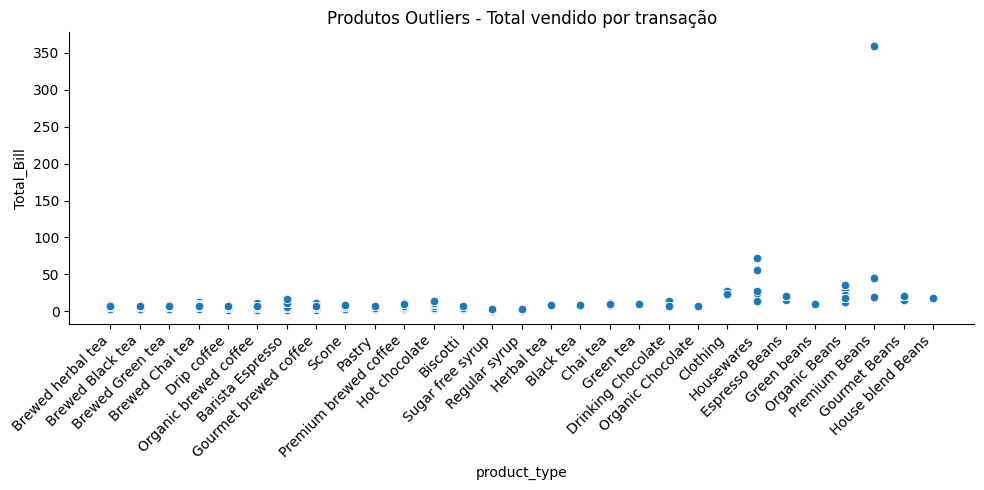

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Produtos Outliers - Total vendido por transação')
sns.scatterplot(data=dataset, x=dataset['product_type'], y=dataset['Total_Bill'])
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

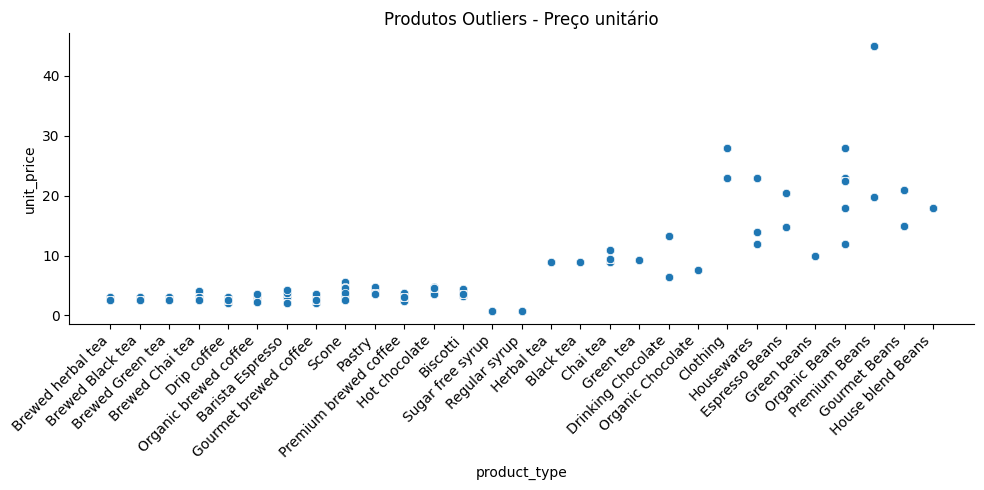

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Produtos Outliers - Preço unitário')
sns.scatterplot(data=dataset, x=dataset['product_type'], y=dataset['unit_price'])
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

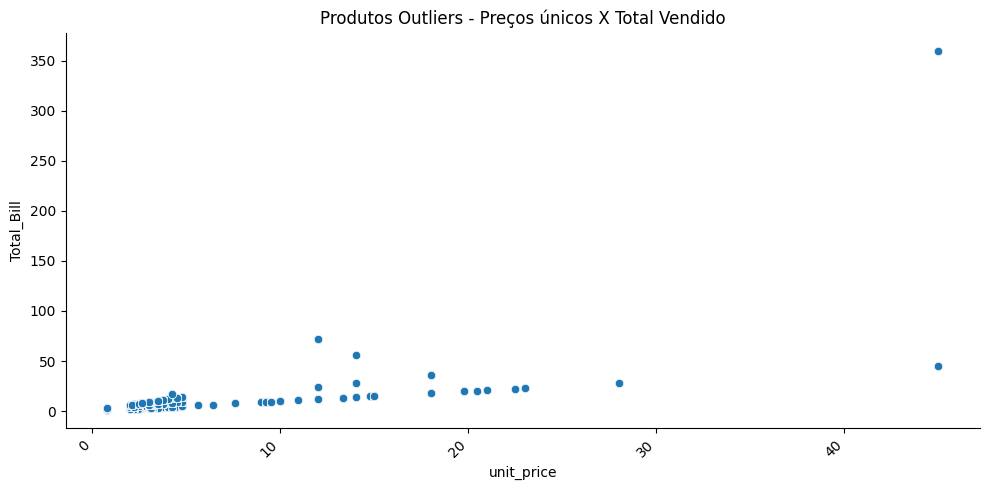

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Produtos Outliers - Preços únicos X Total Vendido')
sns.scatterplot(data=dataset, x=dataset['unit_price'], y=dataset['Total_Bill'])
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()